# **Import des Librairies**

In [184]:
# Chargement des bibliothèques
import pandas as pd
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import missingno as msno
from scipy.stats import ttest_ind
import numpy as np
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot  as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# **Lecture du fichier**

In [14]:
# Chargement des données
dataset = pd.read_excel("https://raw.githubusercontent.com/PikaChou82/AudreySaussaye/refs/heads/main/projets/covid_19/dataset.xlsx")

# Affichage des premières lignes
dataset.head(3)

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   

   Red blood cell distribution width (RDW)  Serum Glucose  \
0                                      NaN            NaN   
1                                -0.625073      -0.140648   
2                                      NaN            NaN   

  Respiratory Syncytial Virus   Influenza A   Influenza B Parainfluenza 1  \
0                         NaN           NaN           NaN             NaN   
1                not_detected  not_detected  not_detected    not_detected   
2                         NaN           NaN           NaN             NaN   

  CoronavirusNL63 Rhinovirus/Enterovirus  Mycoplasma pneumoniae  \
0             NaN                    NaN                    NaN   
1    not_detected               detected                    NaN   
2             NaN                    NaN                    NaN   

  Coronavirus HKU1 Parainfluenza 3 Chlamydophila pneumoniae    Adenovirus  \
0              NaN             NaN                      NaN           NaN   
1     not_detected    not_detected             not_detected  not_detected   
2              NaN             NaN                      NaN           NaN   

  Parainfluenza 4 Coronavirus229E CoronavirusOC43 Inf A H1N1 2009  \
0             NaN             NaN             NaN             NaN   
1    not_detected    not_detected    not_detected    not_detected   
2             NaN             NaN             NaN             NaN   

  Bordetella pertussis Metapneumovirus Parainfluenza 2  Neutrophils      Urea  \
0                  NaN             NaN             NaN          NaN       NaN   
1         not_detected    not_detected    not_detected    -0.619086  1.198059   
2                  NaN             NaN             NaN          NaN       NaN   

   Proteina C reativa mg/dL  Creatinine  Potassium    Sodium  \
0                       NaN         NaN        NaN       NaN   
1                 -0.147895    2.089928  -0.305787  0.862512   
2                       NaN   

# **EDA**

## **Analyse de la Forme**

In [18]:
# Taille du dataset
dataset.shape

(5644, 111)

Le nombre de lignes est ok, en revanche beaucoup de colonnes qu'il va falloir analyser et interpréter.

In [32]:
# Préférences de lecture
pd.set_option("display.max_row",111)
pd.set_option("display.max_columns",111)

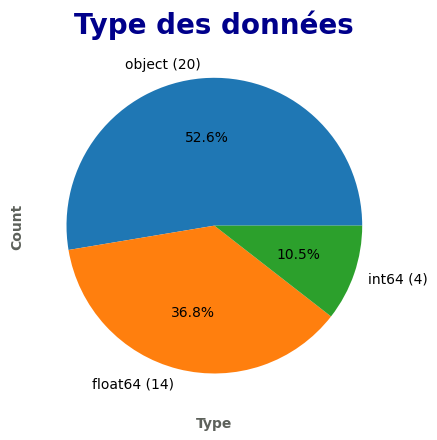

In [ ]:
# Types des variables
plt.title("Type des données", size = 20, fontweight = 'bold',color='darkblue')
dataset.dtypes.value_counts().plot.pie(autopct='%1.1f%%', labels = [f'{label} ({count})' for label, count in dataset.dtypes.value_counts().items()])
plt.ylabel("Count", size = 10, c = '#5D615B', fontweight = 'bold') 
plt.show()

Beaucoup de variables numériques, normal nous sommes sur des résultats d'examen. A voir maintenant la qualité et l'exhaustivité des données.

In [25]:
dataset.describe()

Patient age quantile  Patient addmited to regular ward (1=yes, 0=no)  \
count           5644.000000                                     5644.000000   
mean               9.318391                                        0.013997   
std                5.777903                                        0.117489   
min                0.000000                                        0.000000   
25%                4.000000                                        0.000000   
50%                9.000000                                        0.000000   
75%               14.000000                                        0.000000   
max               19.000000                                        1.000000   

       Patient addmited to semi-intensive unit (1=yes, 0=no)  \
count                                        5644.000000       
mean                                            0.008859       
std                                             0.093713       
min                                             0.000000       
25%                                             0.000000       
50%                                             0.000000       
75%                                             0.000000       
max                                             1.000000       

       Patient addmited to intensive care unit (1=yes, 0=no)    Hematocrit  \
count                                        5644.000000      6.030000e+02   
mean                                            0.007264     -2.186214e-09   
std                                             0.084929      1.000830e+00   
min                                             0.000000     -4.501420e+00   
25%                                             0.000000     -5.188074e-01   
50%                                             0.000000      5.340703e-02   
75%                                             0.000000      7.171751e-01   
max                                             1.000000      2.662704e+00   

         Hemoglobin     Platelets  Mean platelet volume   Red blood Cells  \
count  6.030000e+02  6.020000e+02           5.990000e+02     6.020000e+02   
mean  -1.601319e-08 -3.535004e-10           7.438142e-09     8.424447e-09   
std    1.000830e+00  1.000832e+00           1.000836e+00     1.000832e+00   
min   -4.345603e+00 -2.552426e+00          -2.457575e+00    -3.970608e+00   
25%   -5.862439e-01 -6.053457e-01          -6.624832e-01    -5.679496e-01   
50%    4.031596e-02 -1.217160e-01          -1.015171e-01     1.385207e-02   
75%    7.295320e-01  5.314981e-01           6.838353e-01     6.661759e-01   
max    2.671868e+00  9.532034e+00           3.713052e+00     3.645706e+00   

        Lymphocytes  Mean corpuscular hemoglobin concentration (MCHC)  \
count  6.020000e+02                                      6.020000e+02   
mean  -7.866736e-09                                      1.014863e-09   
std    1.000832e+00                                      1.000832e+00   
min   -1.865070e+00                                     -5.431808e+00   
25%   -7.307069e-01                                     -5.524761e-01   
50%   -1.426696e-02                                     -5.458523e-02   
75%    5.976919e-01                                      6.424628e-01   
max    3.764100e+00                                      3.331071e+00   

         Leukocytes     Basophils  Mean corpuscular hemoglobin (MCH)  \
count  6.020000e+02  6.020000e+02                       6.020000e+02   
mean   6.215833e-09 -6.633739e-09                      -3.453010e-09   
std    1.000832e+00  1.000832e+00                       1.000832e+00   
min   -2.020303e+00 -1.140144e+00                      -5.937604e+00   
25%   -6.372547e-01 -5.292256e-01                      -5.013556e-01   
50%   -2.128790e-01 -2.237665e-01                       1.259032e-01   
75%    4.542955e-01  3.871516e-01                       5.963475e-01   
max    4.522042e+00  1.107822e+01                       4.098546e+00   

        Eosino

<Axes: >

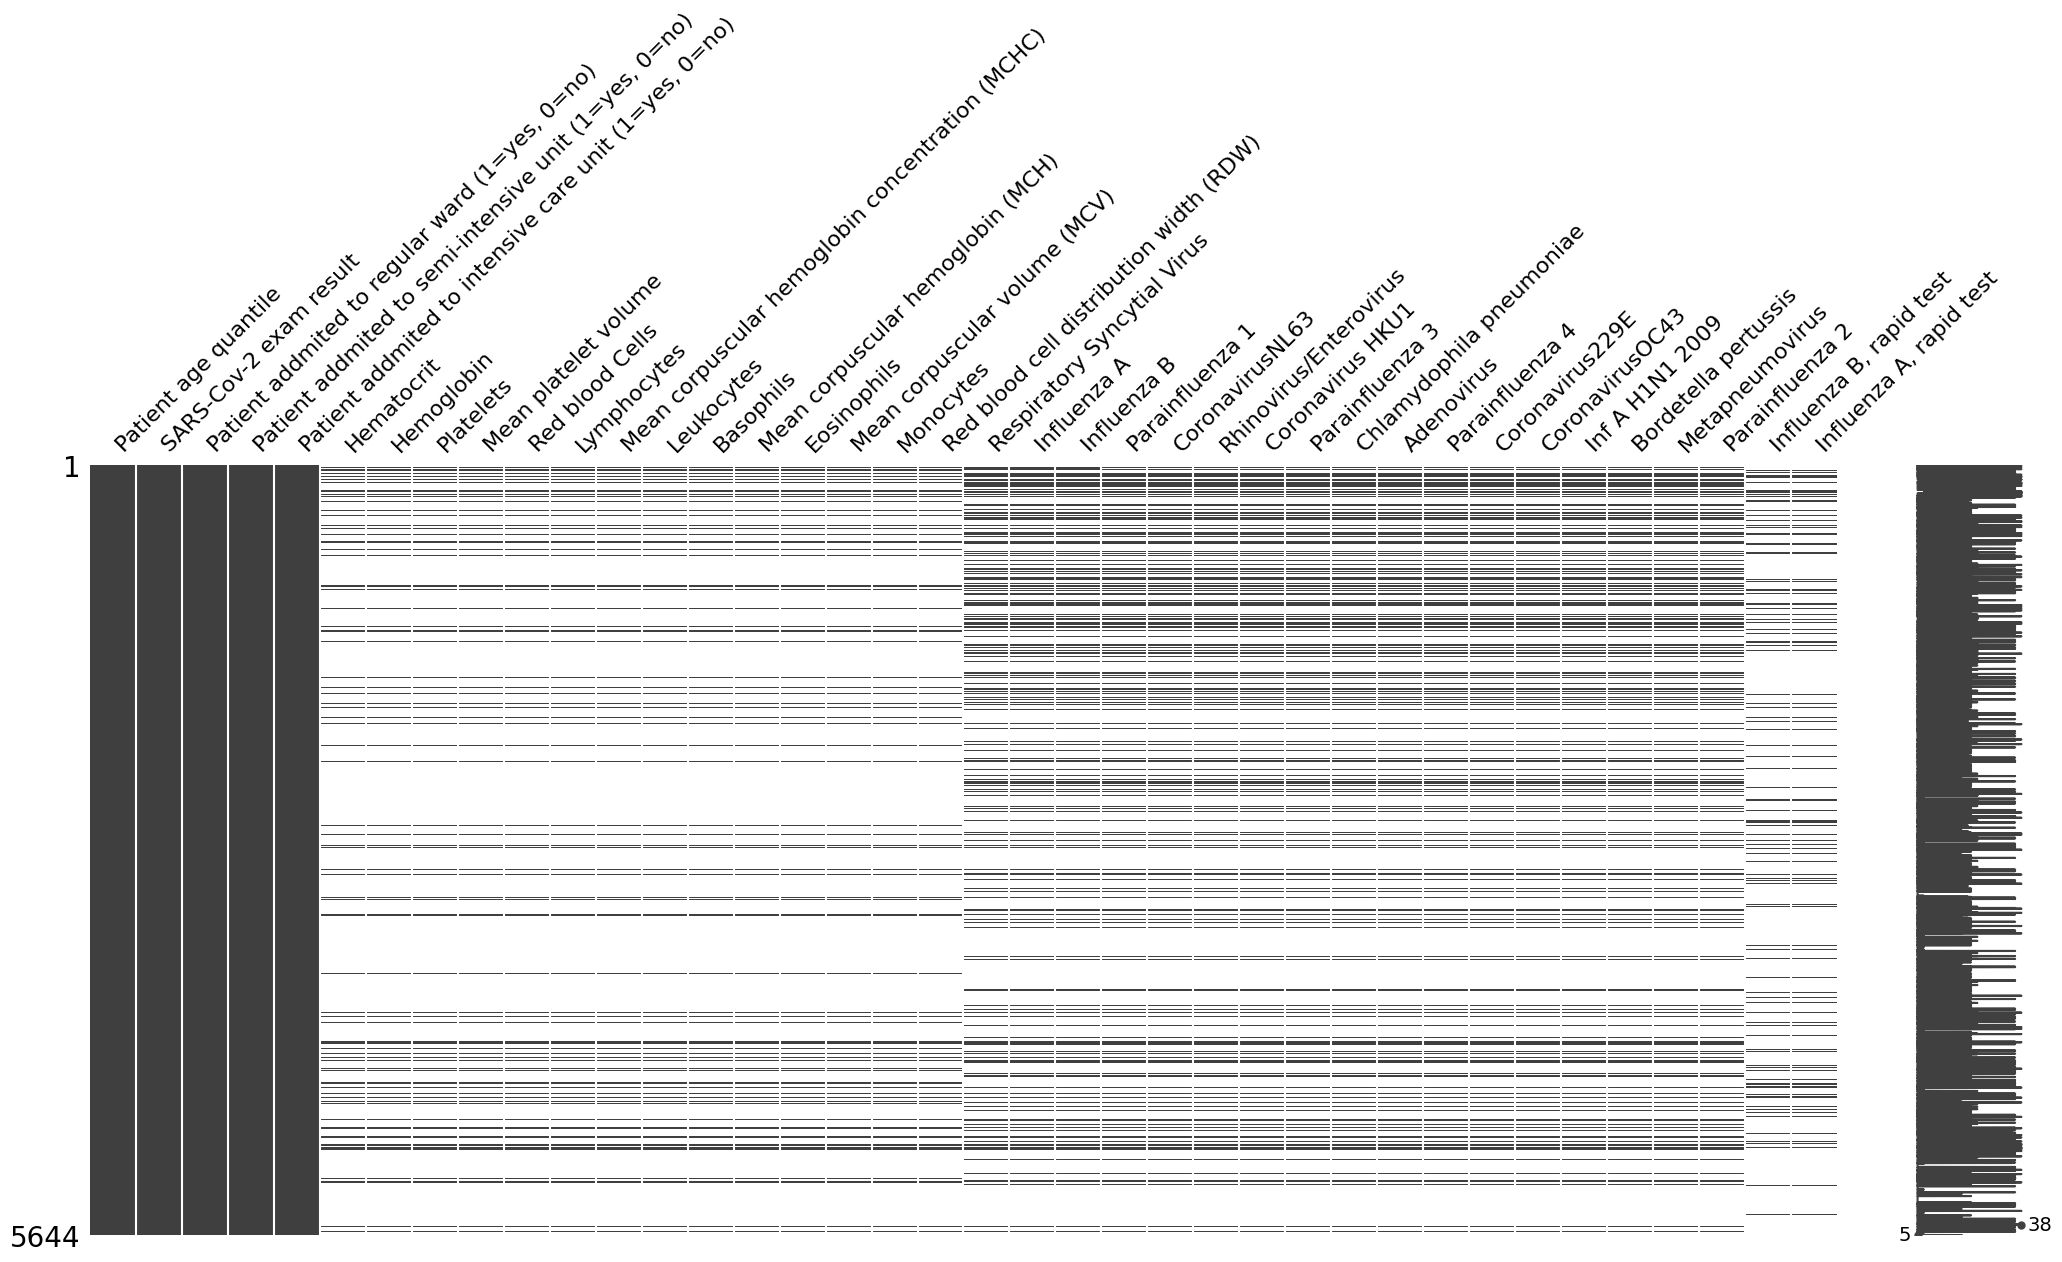

In [55]:
# Identification des valeurs manquantes
msno.matrix(dataset)

Pas facile en lecture, mais on peut tenter la Heatmap pour mieux visualiser.

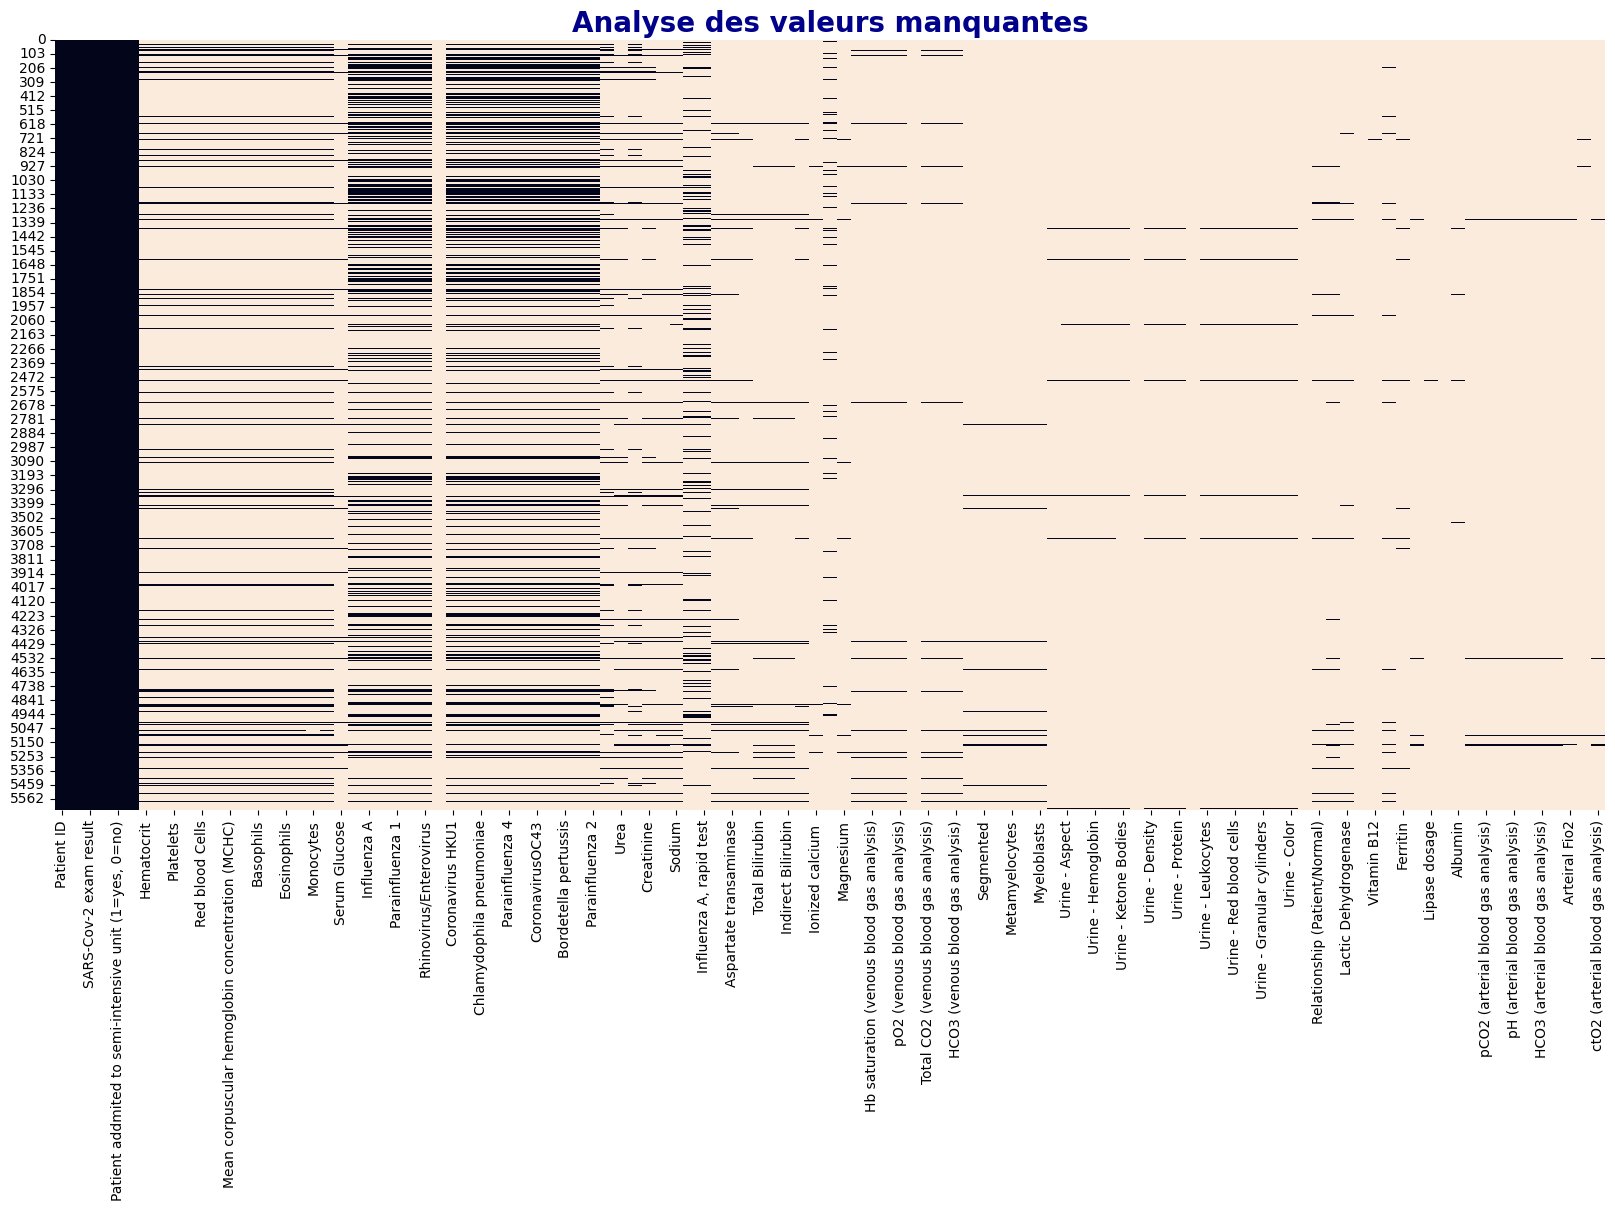

In [30]:
# Heatmap des valeurs manquantes
plt.figure(figsize=(20,10))
plt.title("Analyse des valeurs manquantes", size = 20, fontweight = 'bold',color='darkblue')
sns.heatmap(dataset.isna(), cbar = False)
plt.show()

Beaucoup de colonnes très peu fournies, qui laissent penser que nous avons des analyses "ciblées" suivant les observations.
Validons le ratio des valeurs manquantes.

In [33]:
# Ratio de valeurs manquanets
(dataset.isna().sum()/dataset.shape[0]).sort_values(ascending = False)

Mycoplasma pneumoniae                                    1.000000
Prothrombin time (PT), Activity                          1.000000
D-Dimer                                                  1.000000
Urine - Sugar                                            1.000000
Partial thromboplastin time (PTT)                        1.000000
Urine - Nitrite                                          0.999823
Fio2 (venous blood gas analysis)                         0.999823
Vitamin B12                                              0.999468
Lipase dosage                                            0.998583
Albumin                                                  0.997697
Phosphor                                                 0.996456
Arteiral Fio2                                            0.996456
Ferritin                                                 0.995925
Arterial Lactic Acid                                     0.995216
Hb saturation (arterial blood gases)                     0.995216
pH (arteri

Deux types de données se profilent :
*    76% de valeurs manquantes (tests bactériologiques),
*    89% de valeurs manquantes (tests sanguins).

Sur les autres colonnes, avec plus de 95% de valeurs manquantes, seront non exploitables.

**Synthèse :**

*    Forme : 5 664 lignes, 111 colonnes.
*    Types des variables : 70 Float, 37 Object, 4 Int.
*    Valeurs manquantes : Fort taux de valeurs manquantes, avec deux groupes qui se profilent, les tests bactérios & les tests sanguins.
*    La target identifiée est "SARS-Cov-2 exam result".

## **Analyse de Fond**

In [35]:
# Eliminationdes colonnes inexploitables (+ 90% de valeurs manquantes)
dataset = dataset[dataset.columns[dataset.isna().sum()/dataset.shape[0] < 0.9]]

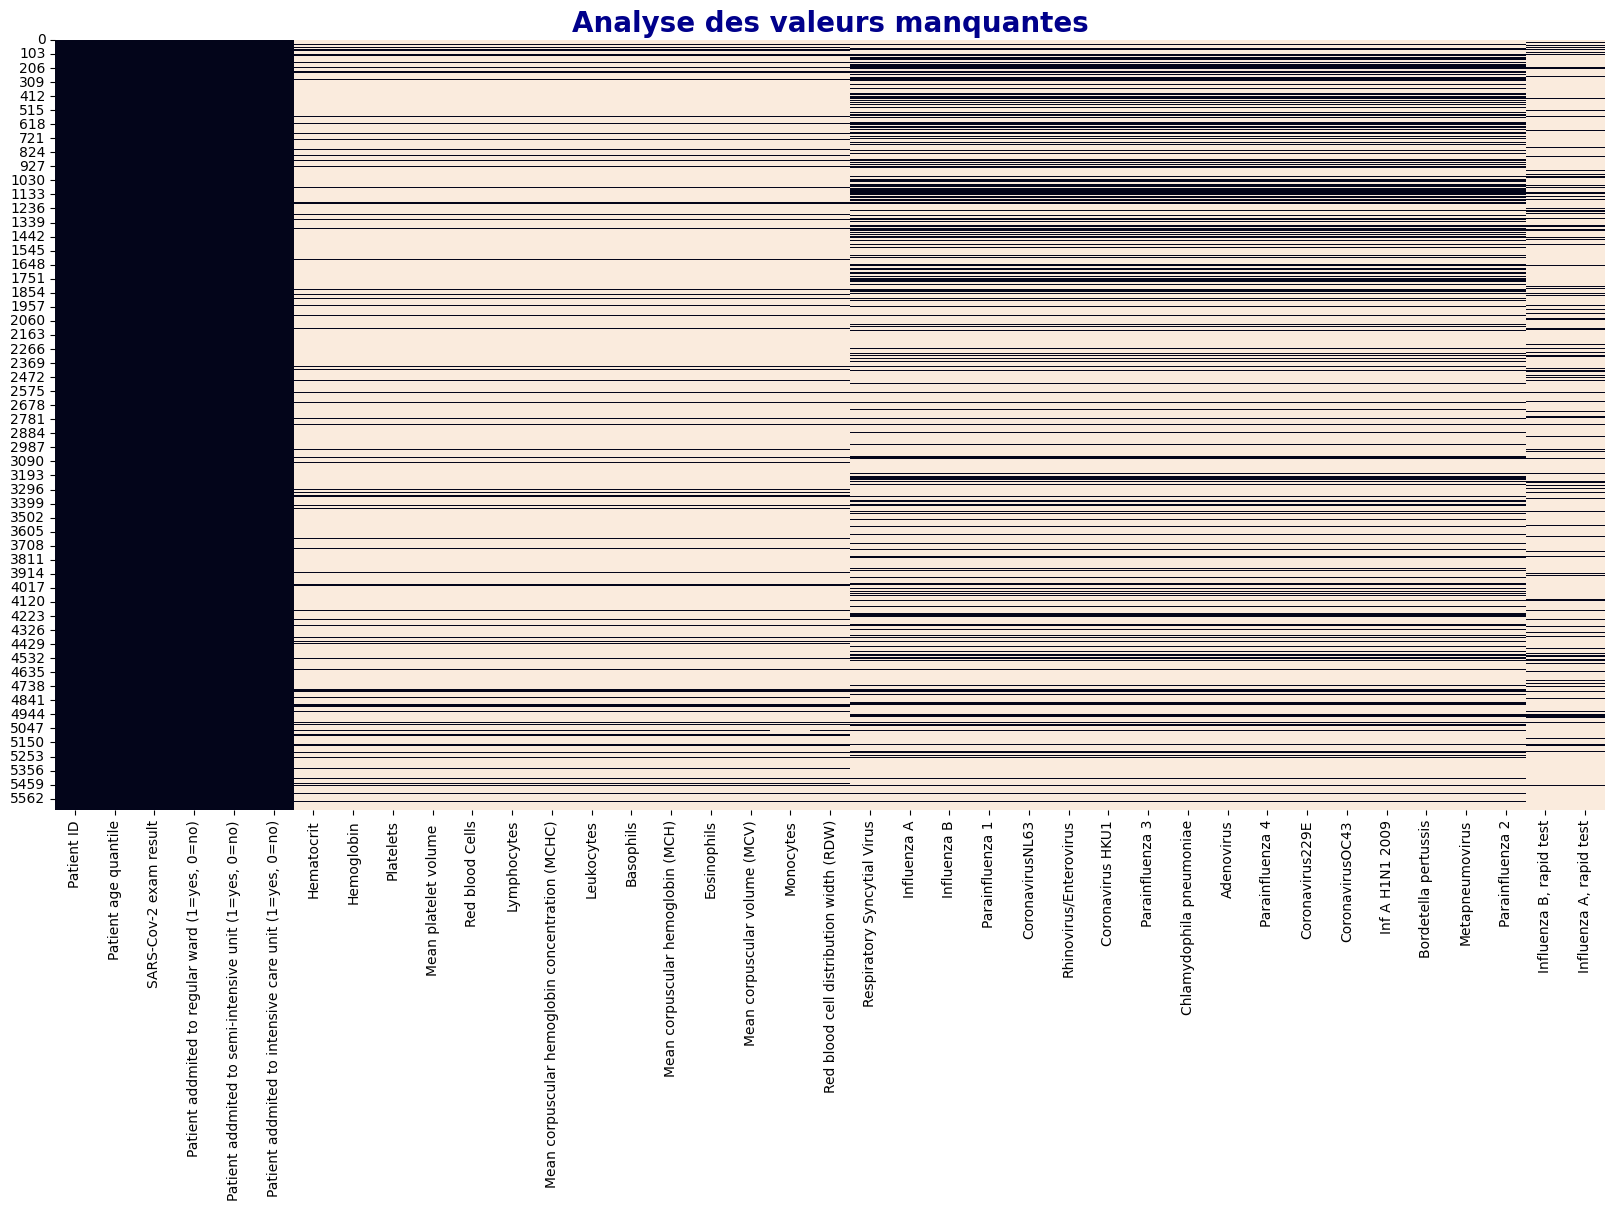

In [36]:
# Heatmap des valeurs manquantes
plt.figure(figsize=(20,10))
plt.title("Analyse des valeurs manquantes", size = 20, fontweight = 'bold',color='darkblue')
sns.heatmap(dataset.isna(), cbar = False)
plt.show()

Beaucoup moins de colonnes, nous allons pouvoir travailler. Il reste une colonne qui ne sera pas exploitable.

In [37]:
# Elimination du "Patient ID"
dataset = dataset.drop('Patient ID', axis = 1)

La target, "SARS-Cov-2 exam result", est remplie à 100%. Observons les proportions : 

In [38]:
dataset['SARS-Cov-2 exam result'].value_counts(normalize = True)*100

SARS-Cov-2 exam result
negative    90.113395
positive     9.886605
Name: proportion, dtype: float64

10% de cas positifs sur le Dataset.

Visualisons maintenant les variables continues :

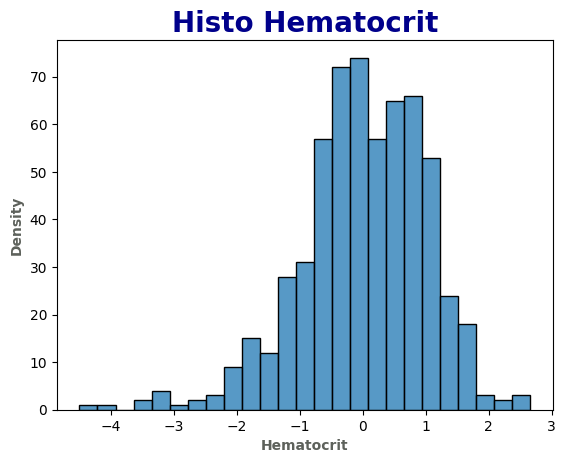

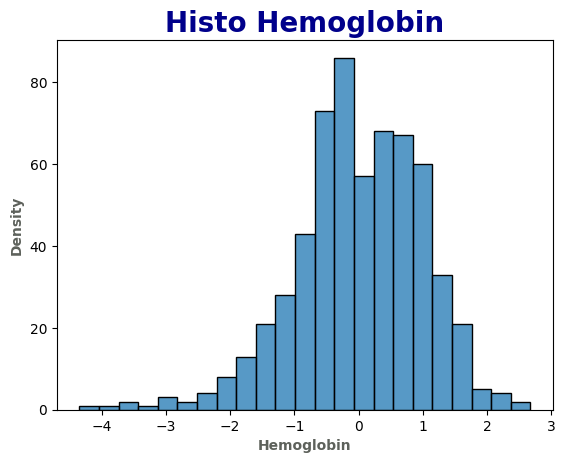

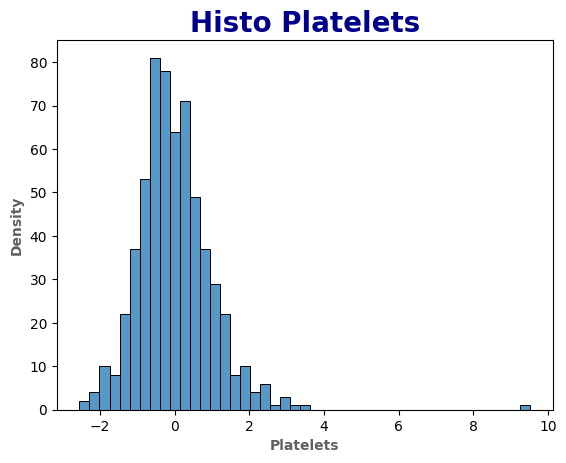

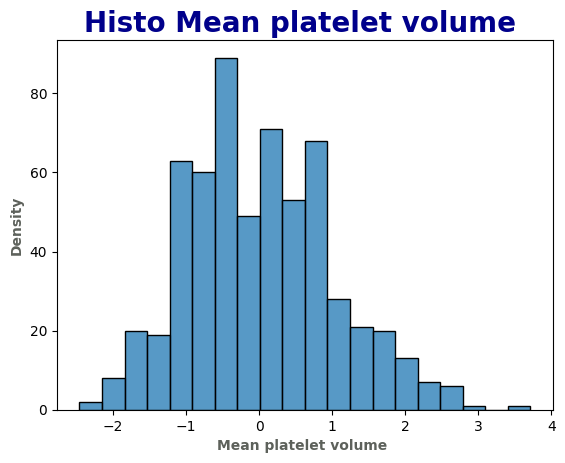

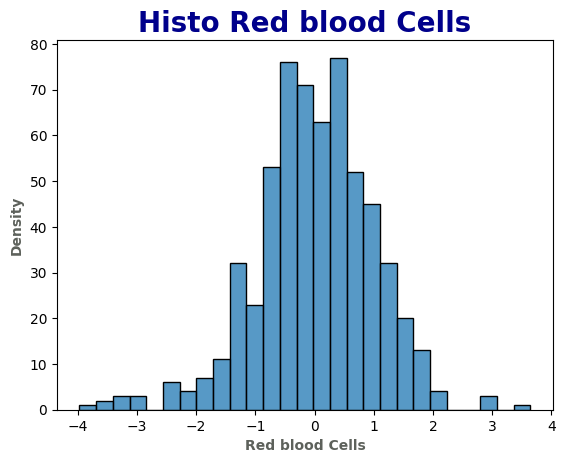

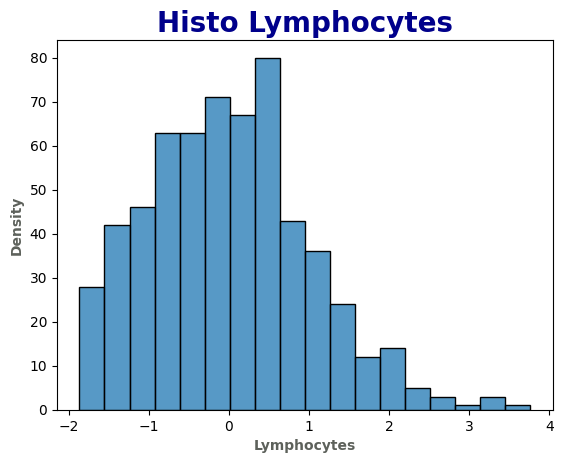

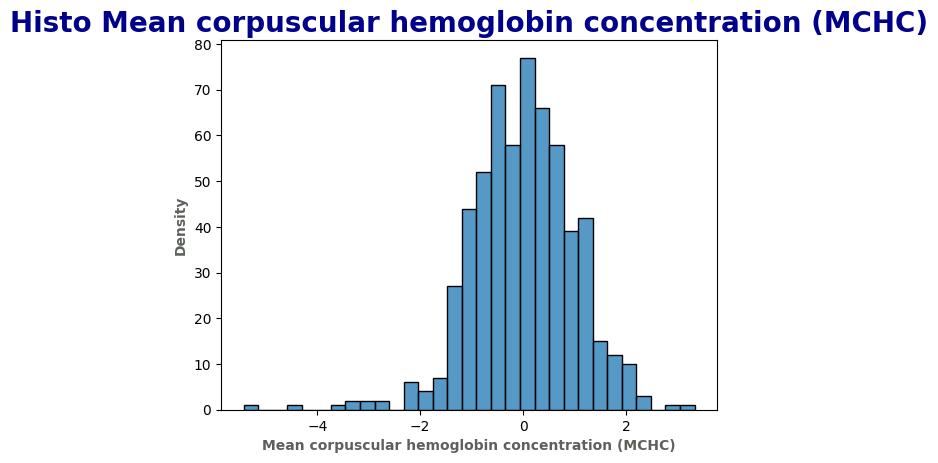

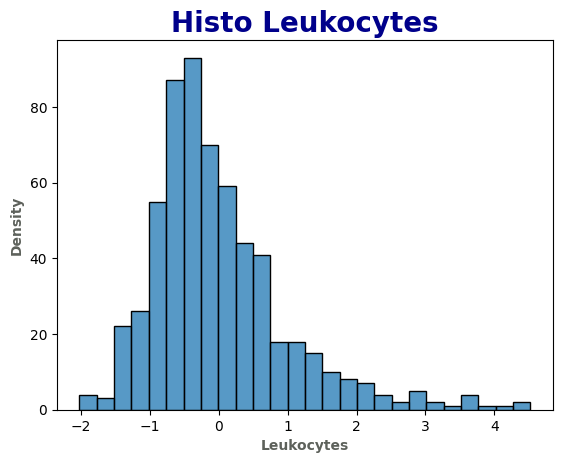

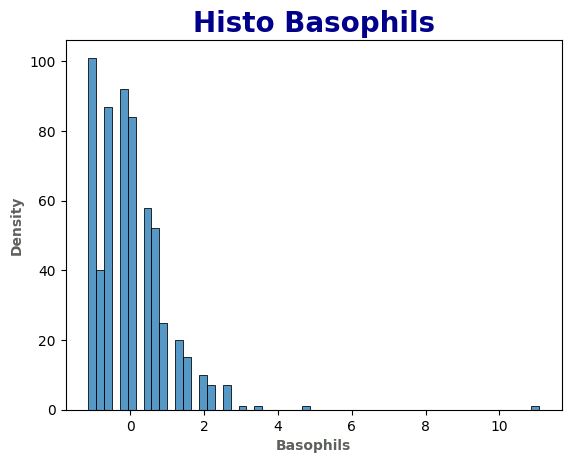

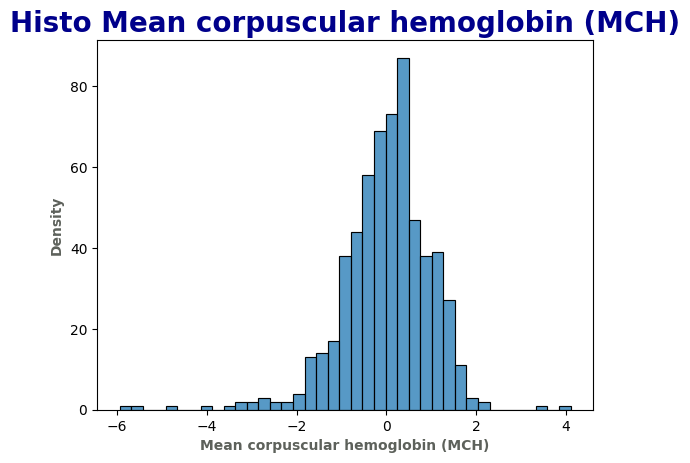

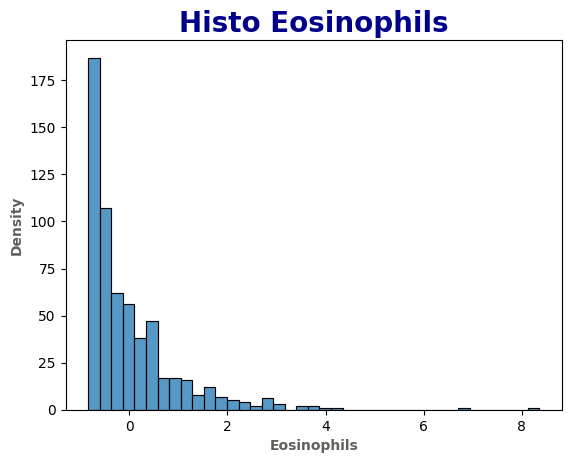

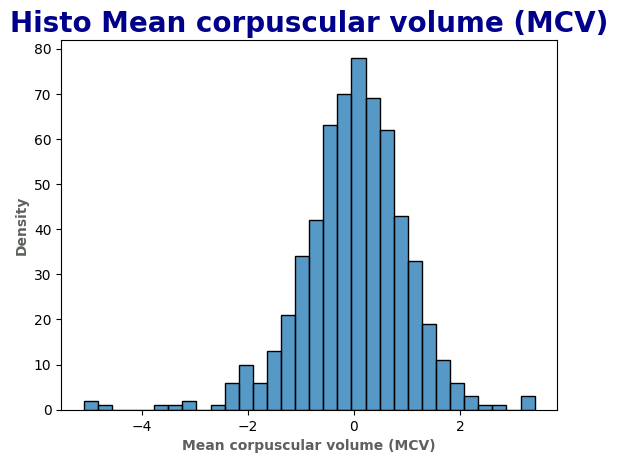

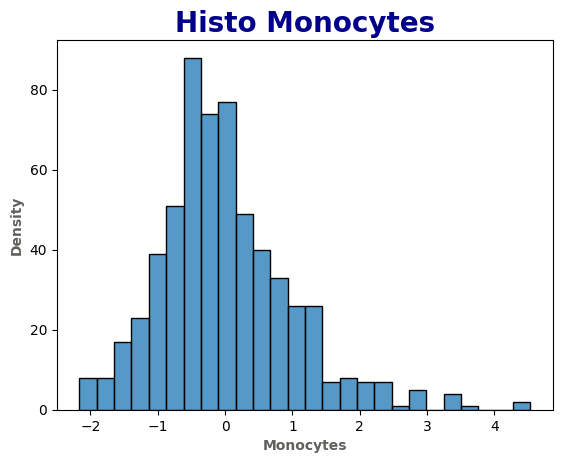

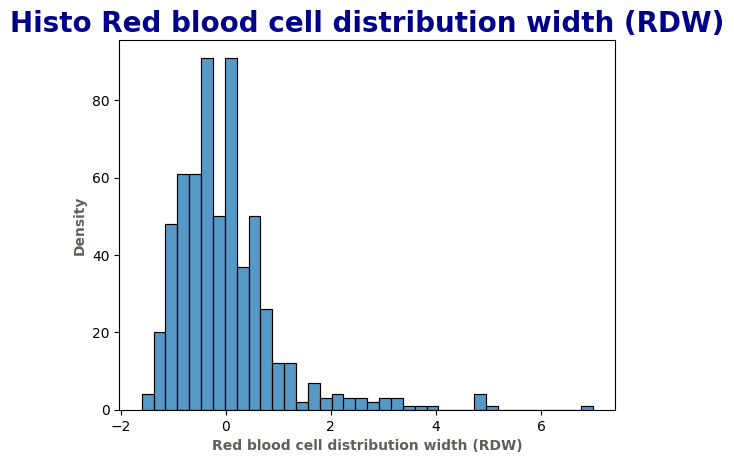

In [41]:
#  Histogramme sur les variables Float
for col in dataset.select_dtypes('float'):
  plt.title(f"Histo {col}", size = 20, fontweight = 'bold',color='darkblue')
  plt.ylabel("Density", size = 10, c = '#5D615B', fontweight = 'bold') 
  plt.xlabel(col, size = 10, c = '#5D615B', fontweight = 'bold') 
  sns.histplot(dataset[col])
  plt.show()

In [43]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 38 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Patient age quantile                                   5644 non-null   int64  
 1   SARS-Cov-2 exam result                                 5644 non-null   object 
 2   Patient addmited to regular ward (1=yes, 0=no)         5644 non-null   int64  
 3   Patient addmited to semi-intensive unit (1=yes, 0=no)  5644 non-null   int64  
 4   Patient addmited to intensive care unit (1=yes, 0=no)  5644 non-null   int64  
 5   Hematocrit                                             603 non-null    float64
 6   Hemoglobin                                             603 non-null    float64
 7   Platelets                                              602 non-null    float64
 8   Mean platelet volume                            

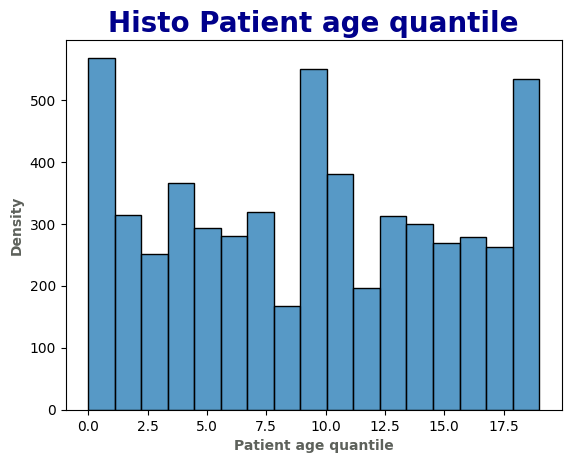

In [44]:
#  Histogramme sur les variables Int (Seulement Patient Age Quantile, les deux autres étant "Yes" ou "No")
plt.title(f"Histo Patient age quantile", size = 20, fontweight = 'bold',color='darkblue')
plt.ylabel("Density", size = 10, c = '#5D615B', fontweight = 'bold') 
plt.xlabel("Patient age quantile", size = 10, c = '#5D615B', fontweight = 'bold') 
sns.histplot(dataset["Patient age quantile"])
plt.show()

In [45]:
dataset["Patient age quantile"].value_counts()

Patient age quantile
11    380
4     366
9     359
0     334
7     319
2     315
13    313
14    299
5     294
6     281
16    279
19    275
15    269
17    263
18    259
3     251
1     234
12    197
10    190
8     167
Name: count, dtype: int64

Les données sont un peu difficiles à interpréter, car nous récupérons une colonne où il n'y a pas d'indications sur l'interprétation.

Passons maintenant aux variables "Objet".

In [46]:
# Analyse des valeurs disponibles sur les colonnes de type object
for col in dataset.select_dtypes('object'):
  print(f"{col :<40}{dataset[col].unique()}")

SARS-Cov-2 exam result                  ['negative' 'positive']
Respiratory Syncytial Virus             [nan 'not_detected' 'detected']
Influenza A                             [nan 'not_detected' 'detected']
Influenza B                             [nan 'not_detected' 'detected']
Parainfluenza 1                         [nan 'not_detected' 'detected']
CoronavirusNL63                         [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus                  [nan 'detected' 'not_detected']
Coronavirus HKU1                        [nan 'not_detected' 'detected']
Parainfluenza 3                         [nan 'not_detected' 'detected']
Chlamydophila pneumoniae                [nan 'not_detected' 'detected']
Adenovirus                              [nan 'not_detected' 'detected']
Parainfluenza 4                         [nan 'not_detected' 'detected']
Coronavirus229E                         [nan 'not_detected' 'detected']
CoronavirusOC43                         [nan 'not_detected' 'detected']


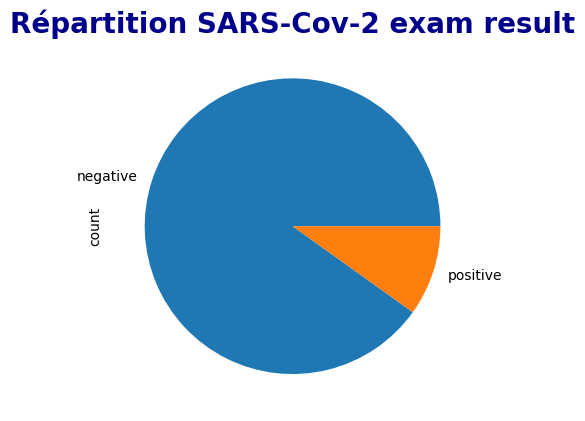

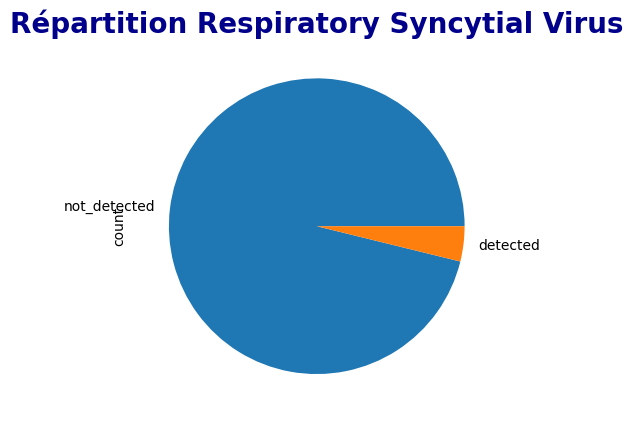

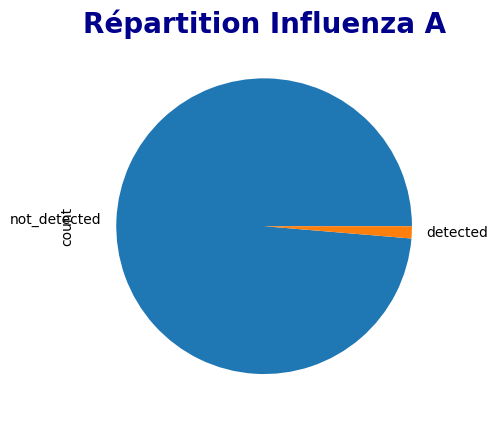

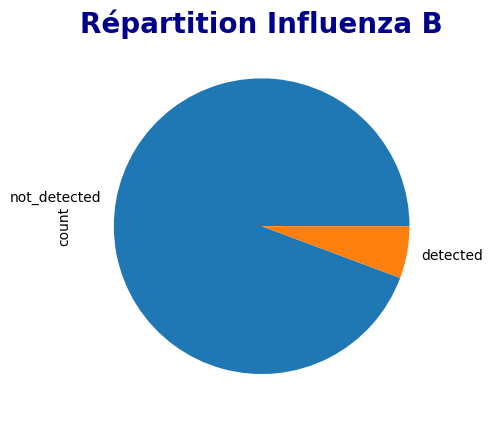

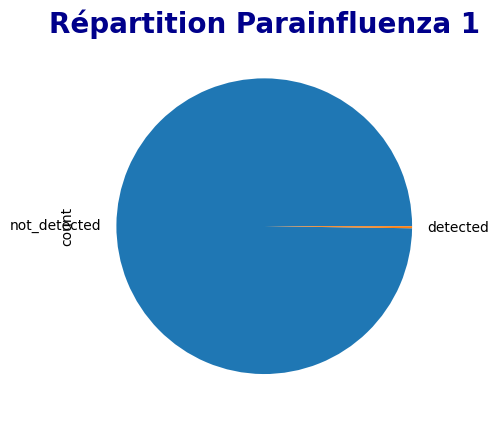

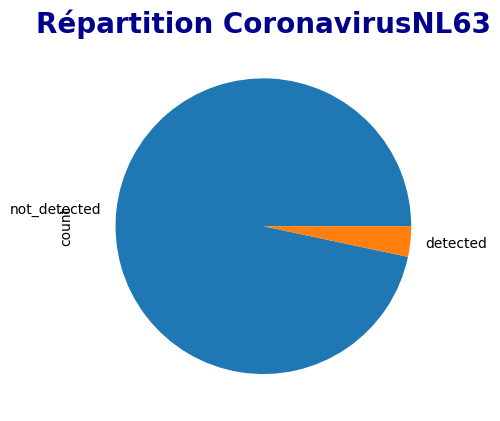

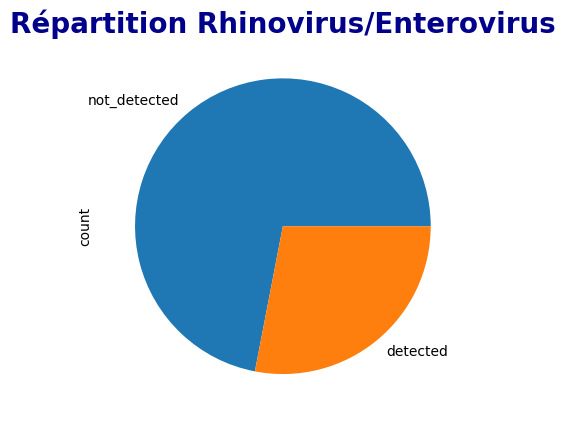

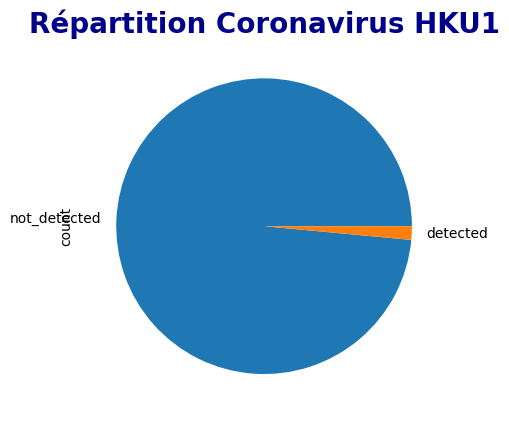

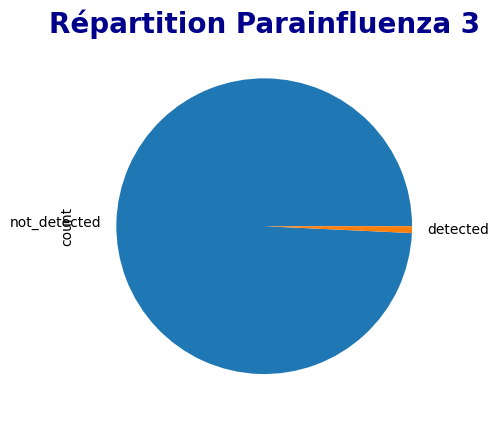

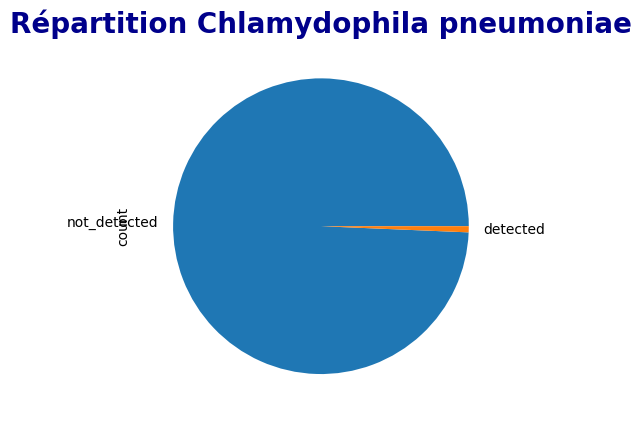

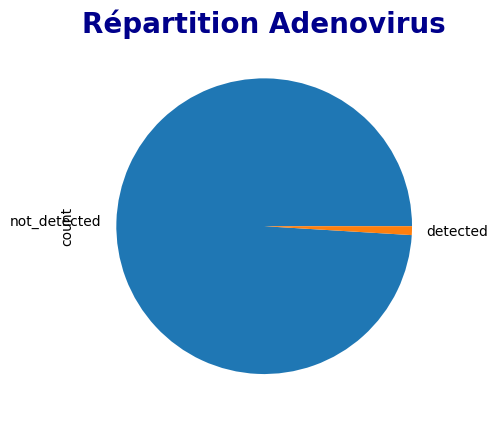

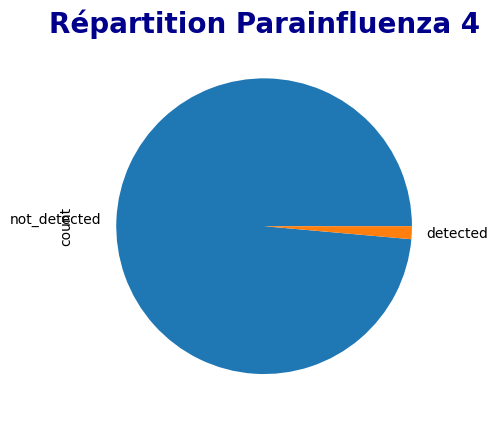

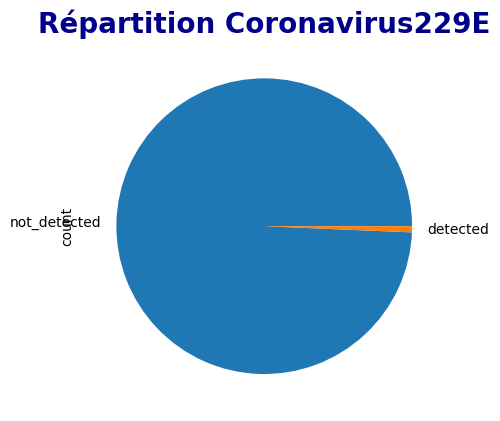

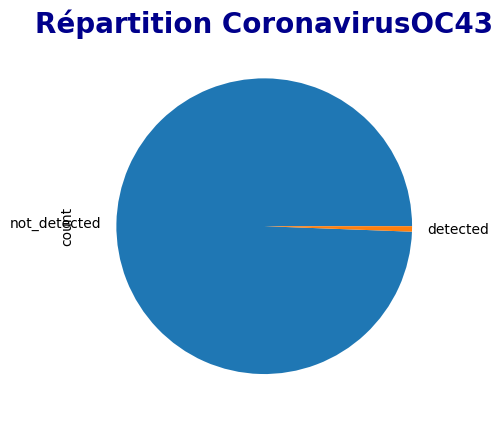

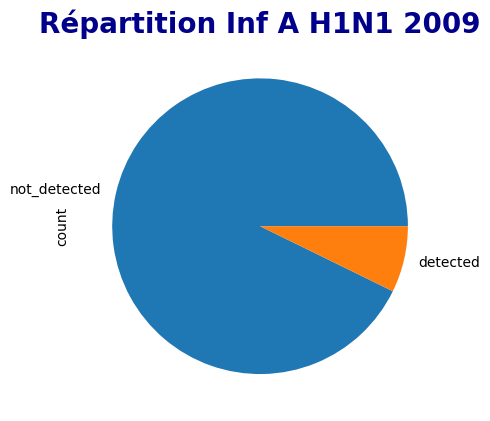

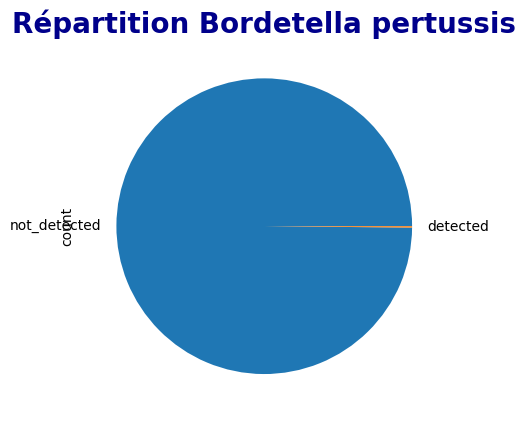

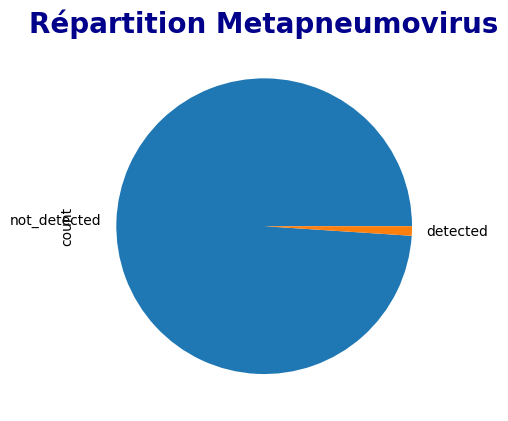

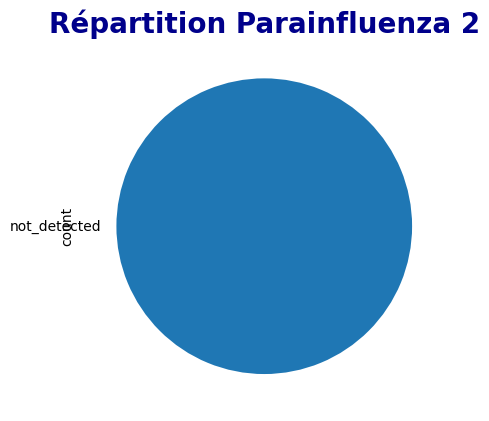

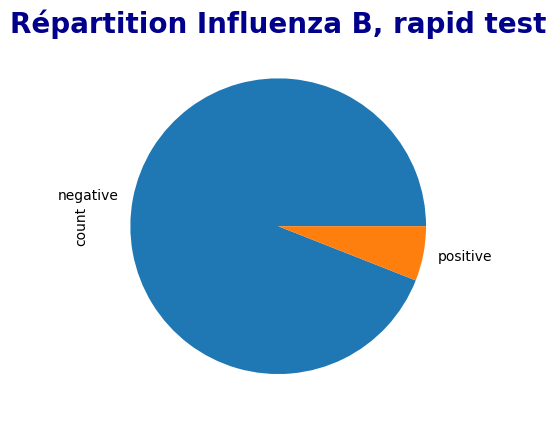

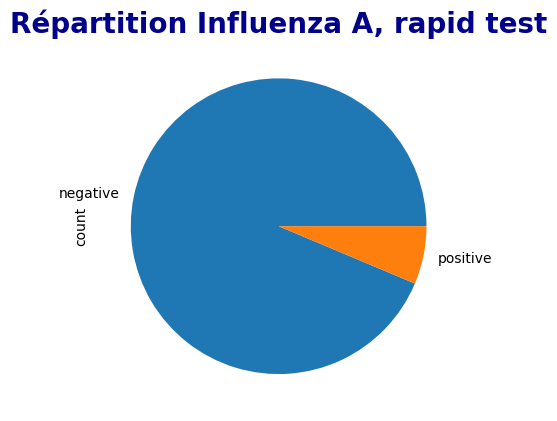

In [48]:
#  Histogramme sur les variables Object
for col in dataset.select_dtypes('object'):
  plt.title(f"Répartition {col}", size = 20, fontweight = 'bold',color='darkblue')
  dataset[col].value_counts().plot.pie()
  plt.show()

Côté Virus, on a une belle représentativité du Rhinovirus.

## **Relation Target & Variables**

Regardons si nous pouvons trouver certaines corrélations suivant les résultats.<br>
Pour cela, on va créer un dataset "positive" et un autre "negative".

In [49]:
# Création des deux Datasets
dataset_positive = dataset[dataset['SARS-Cov-2 exam result'] == 'positive']
dataset_negative = dataset[dataset['SARS-Cov-2 exam result'] == 'negative']

On va également séparer le jeu de données en fonction des colonnes de type "bactério" (ou virus) et celles de type "sanguin".

In [50]:
missing_rate = dataset.isna().sum()/dataset.shape[0]
blood_columns = dataset.columns[(missing_rate <0.9) & (missing_rate >0.88)]
viral_columns = dataset.columns[(missing_rate <0.88) & (missing_rate >0.75)]

### *Colonnes de type "Sanguin"*

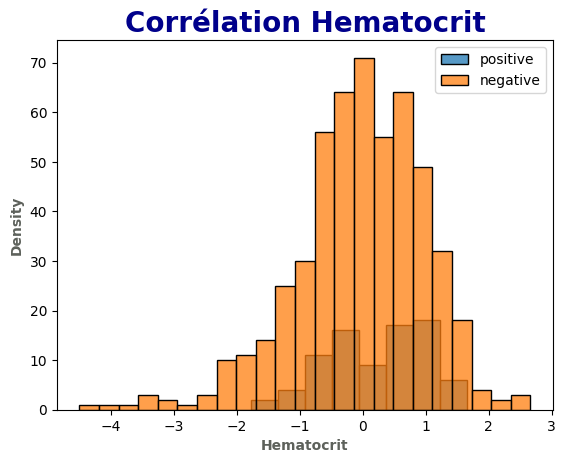

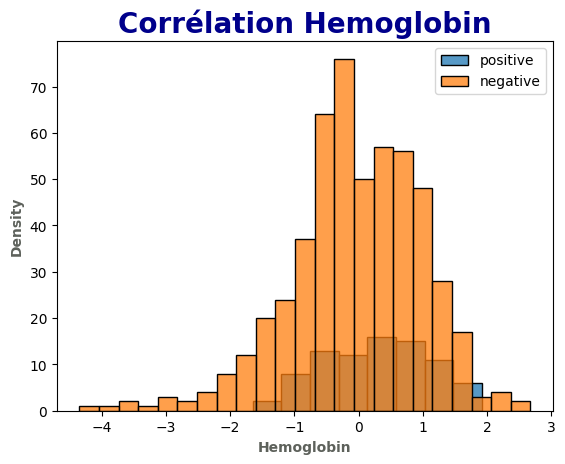

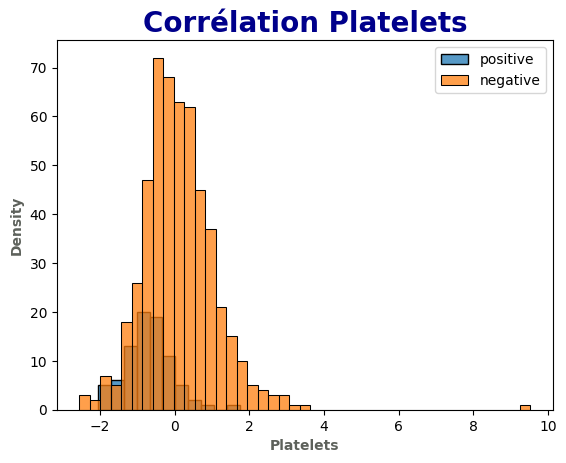

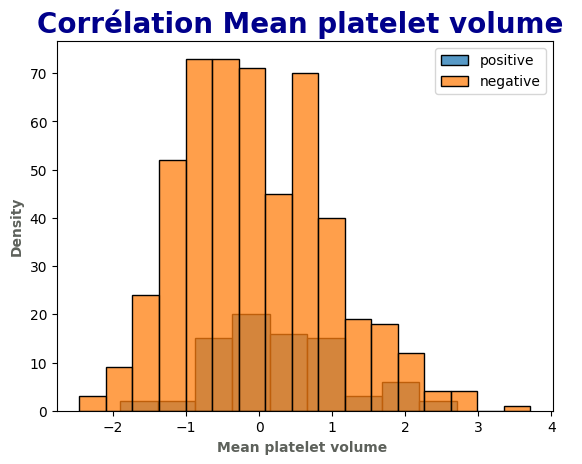

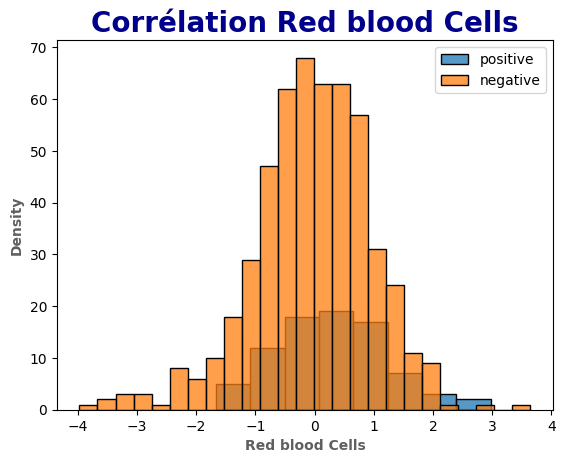

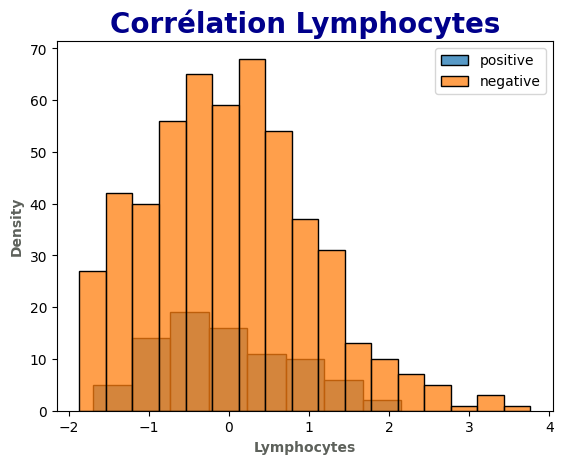

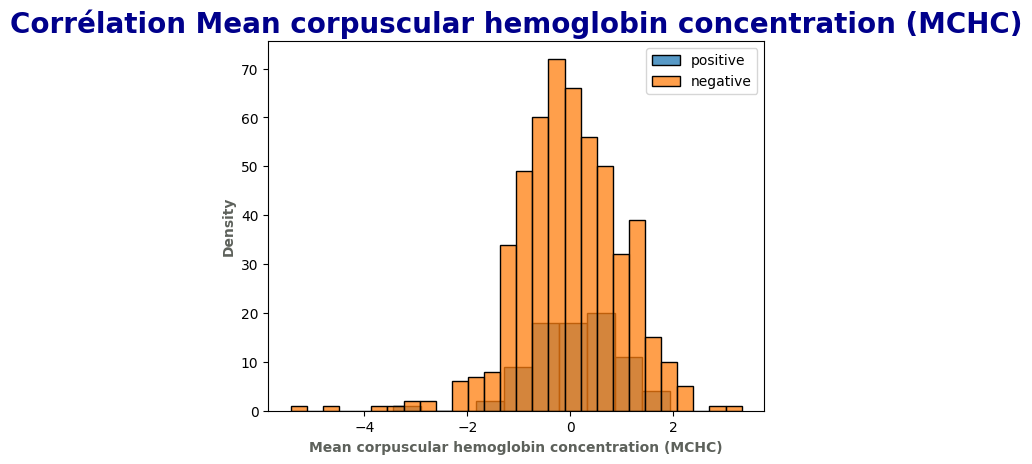

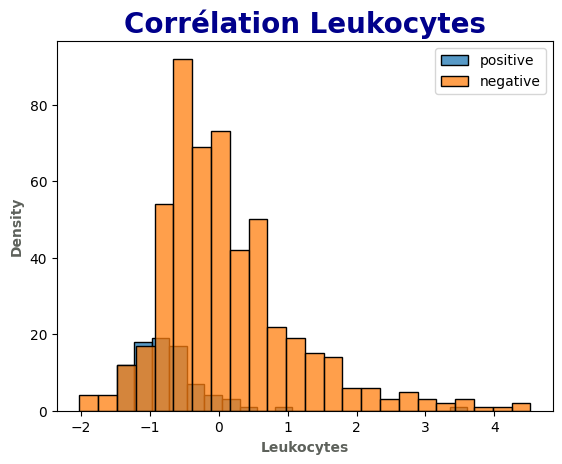

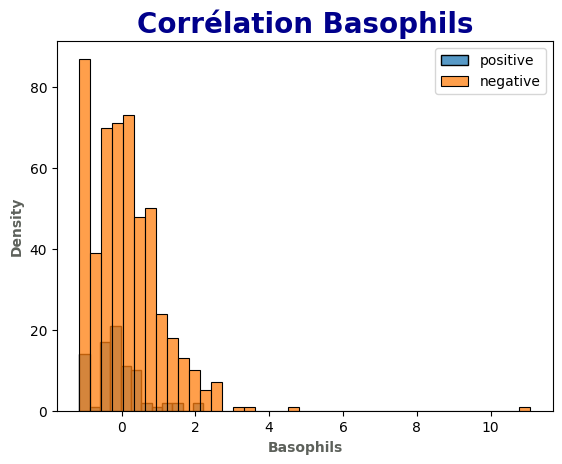

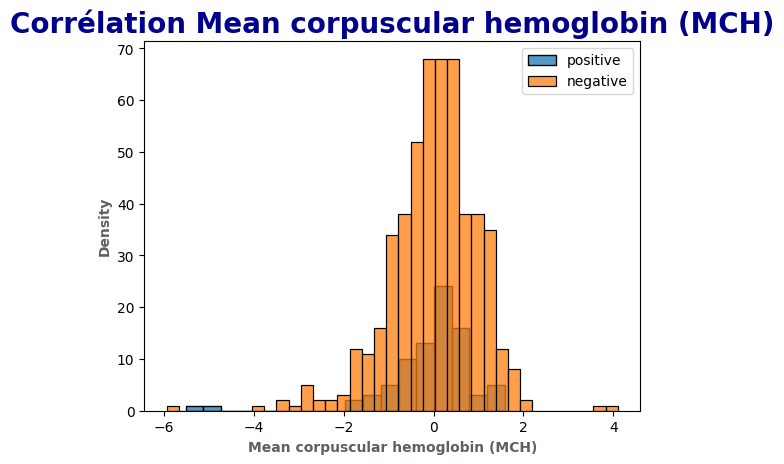

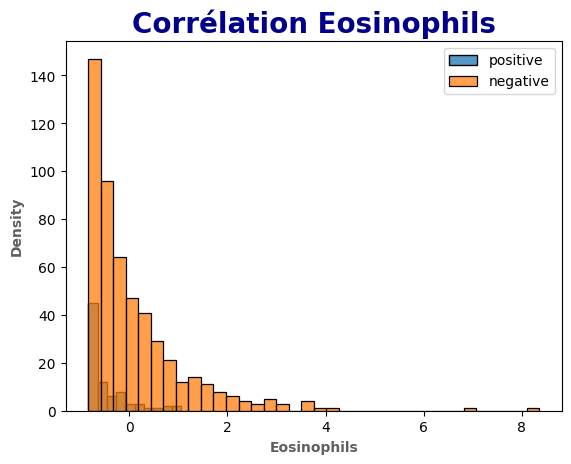

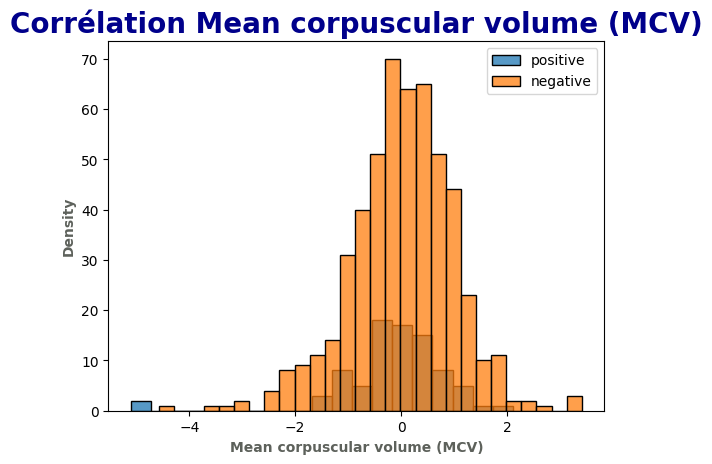

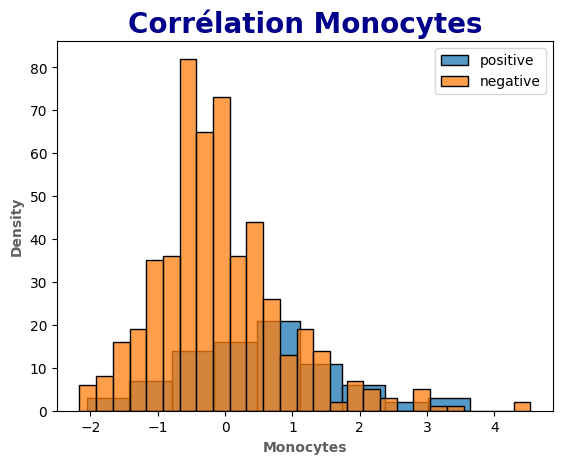

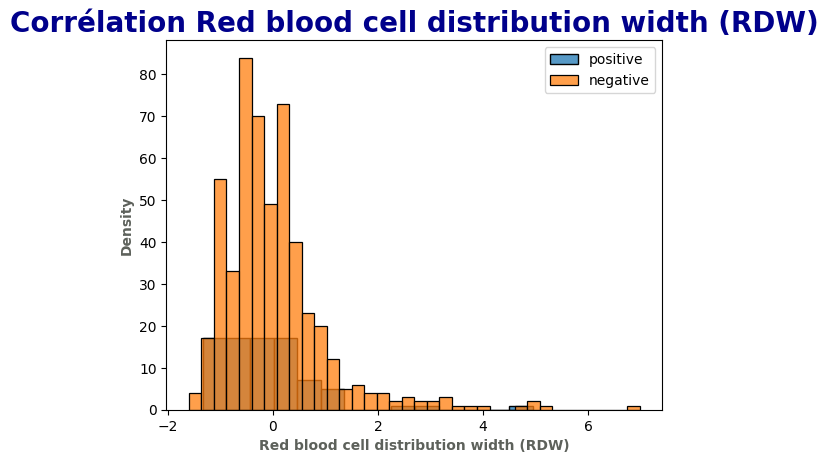

In [57]:
for col in blood_columns:
    plt.title(f"Corrélation {col}", size = 20, fontweight = 'bold',color='darkblue')
    sns.histplot(dataset_positive[col],label = 'positive')
    sns.histplot(dataset_negative[col],label = 'negative')
    plt.ylabel("Density", size = 10, c = '#5D615B', fontweight = 'bold') 
    plt.xlabel(col, size = 10, c = '#5D615B', fontweight = 'bold') 
    plt.legend()
    plt.show()

On remarque que, lors d'une positivité au Covid, les Platelets, Leukocytes et Monocytes semblent donner des résultats différents. On va tester cette possible relation.

### *Colonne Age*

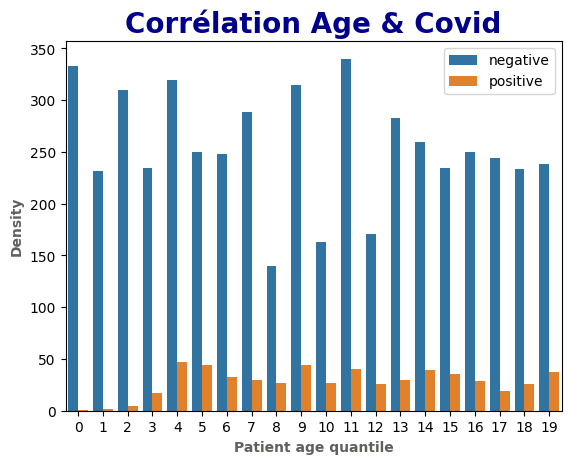

In [58]:
plt.title(f"Corrélation Age & Covid", size = 20, fontweight = 'bold',color='darkblue')
sns.countplot(x = "Patient age quantile", hue  = "SARS-Cov-2 exam result", data = dataset)
plt.ylabel("Density", size = 10, c = '#5D615B', fontweight = 'bold') 
plt.xlabel("Patient age quantile", size = 10, c = '#5D615B', fontweight = 'bold') 
plt.legend()
plt.show()

Il y a définitivement une corrélation, mais n'ayant pas l'interprétation des quantiles, il sera difficile d'en sortir une analyse plus poussée.

### *Colonnes de type "Virus"*

Regardons maintenant les relations entre la cible et les colonnes de type "virus".

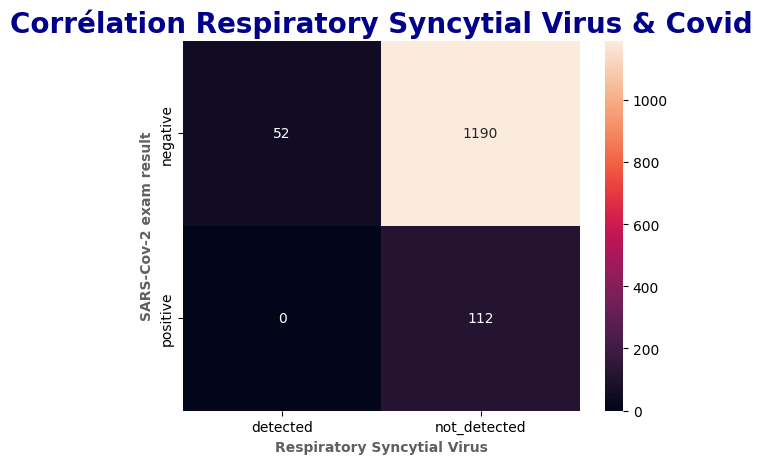

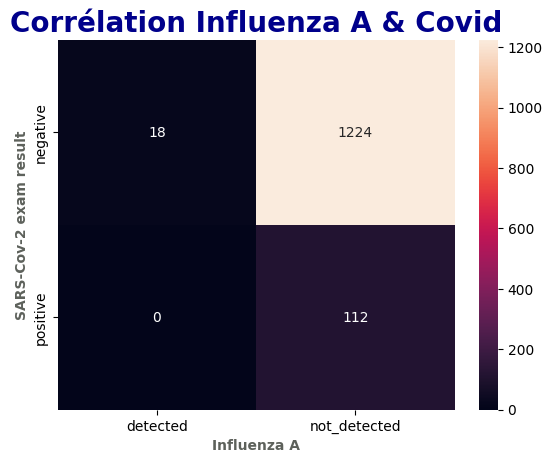

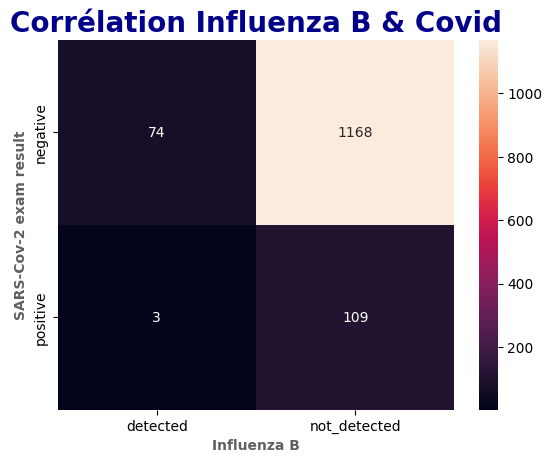

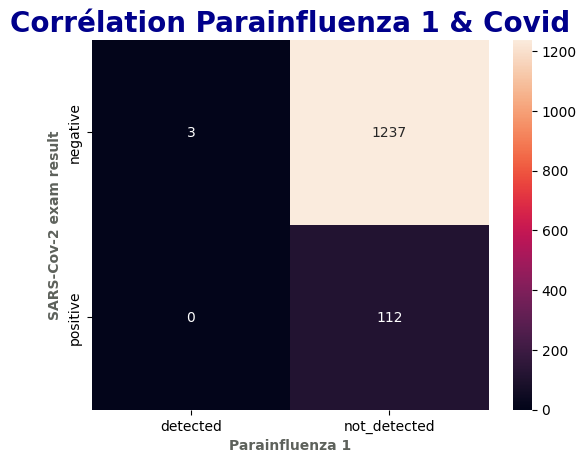

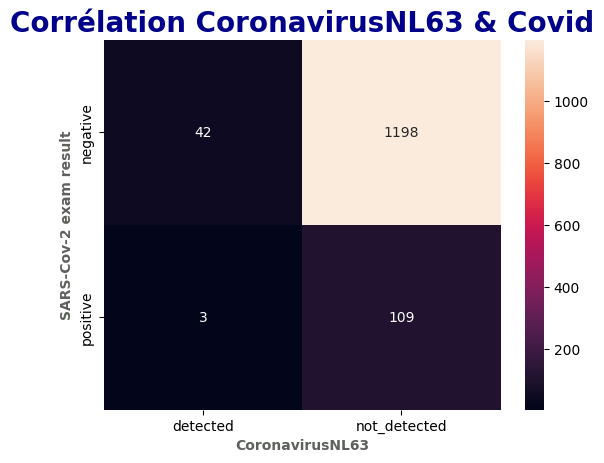

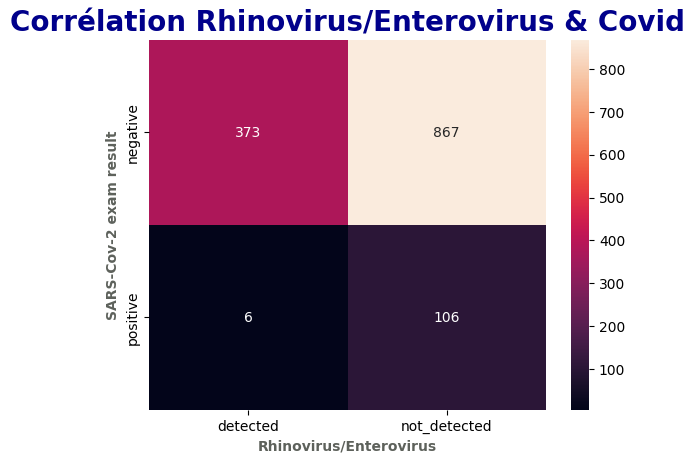

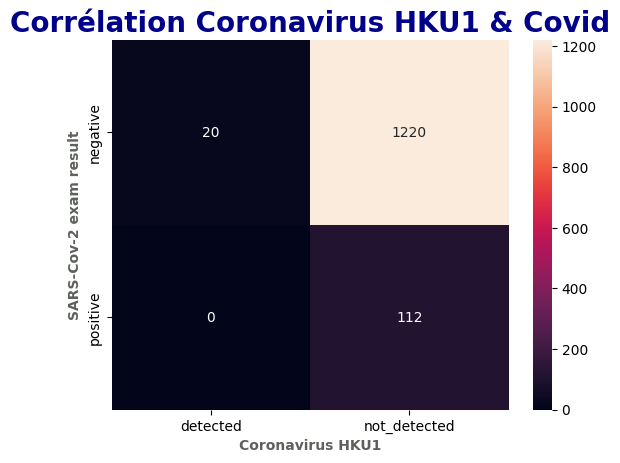

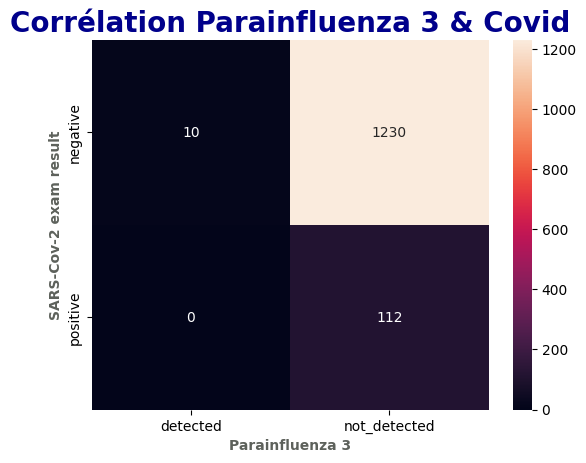

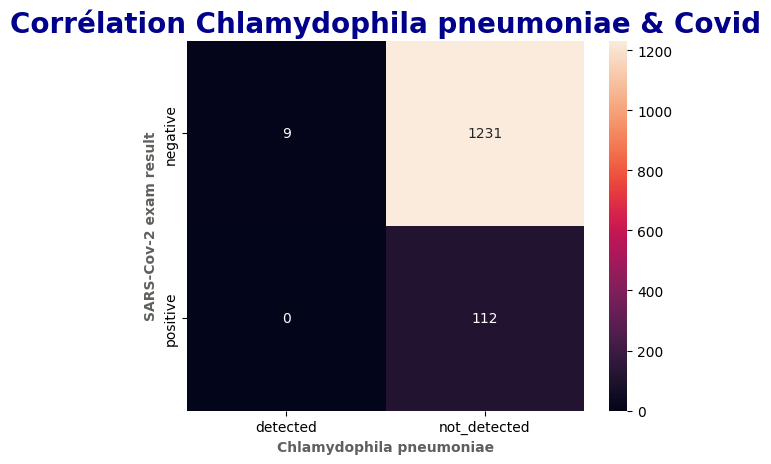

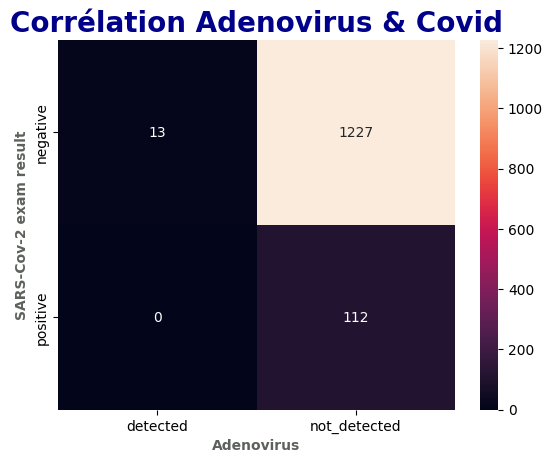

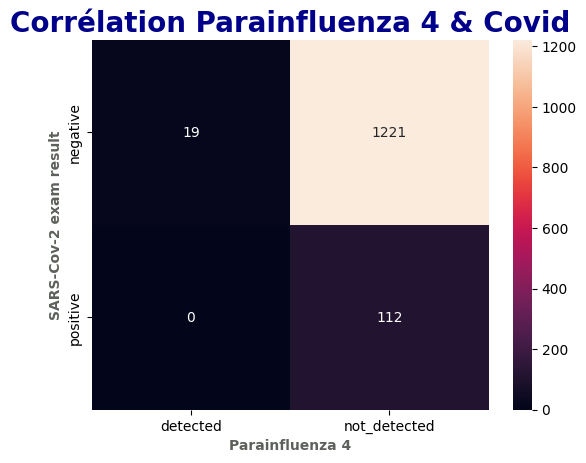

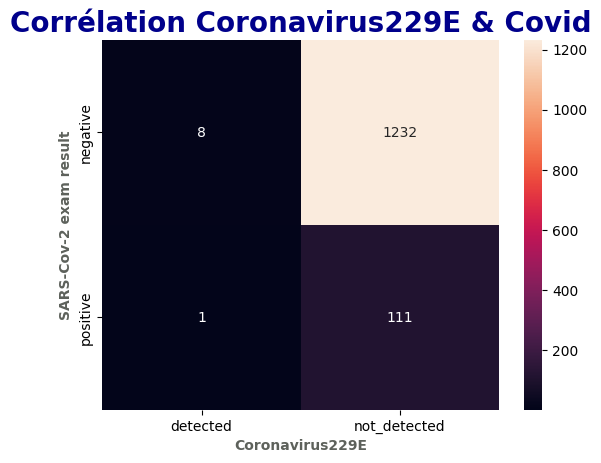

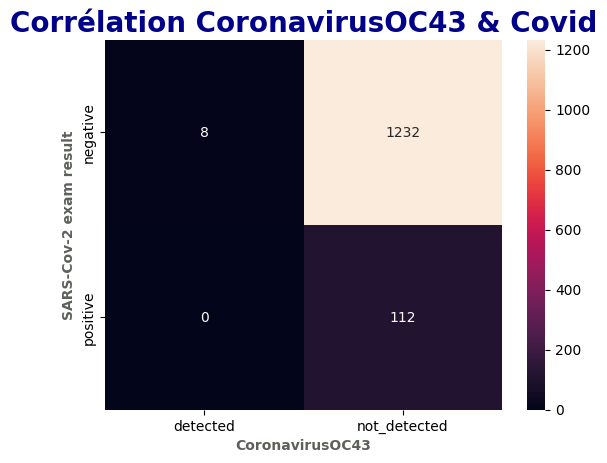

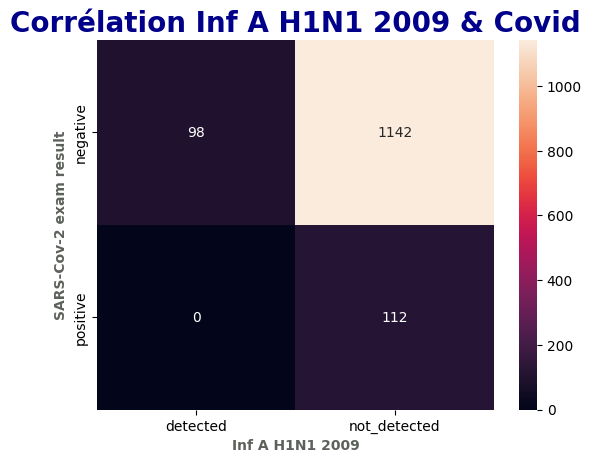

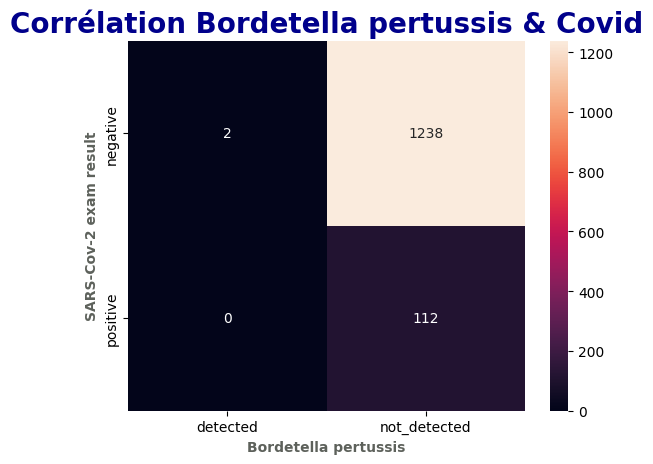

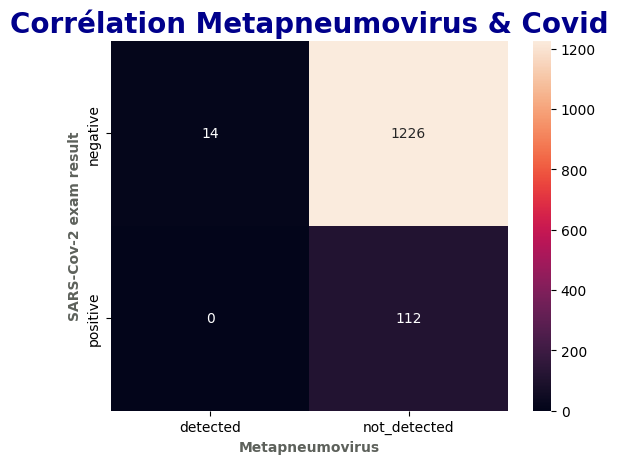

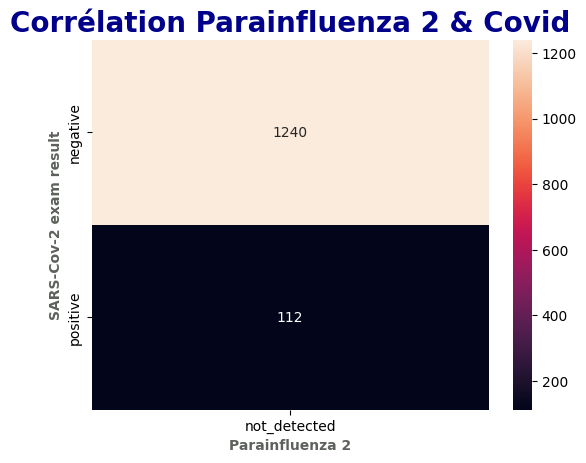

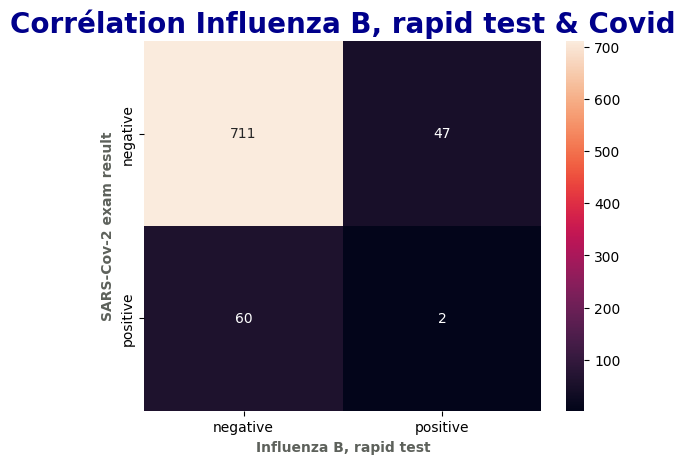

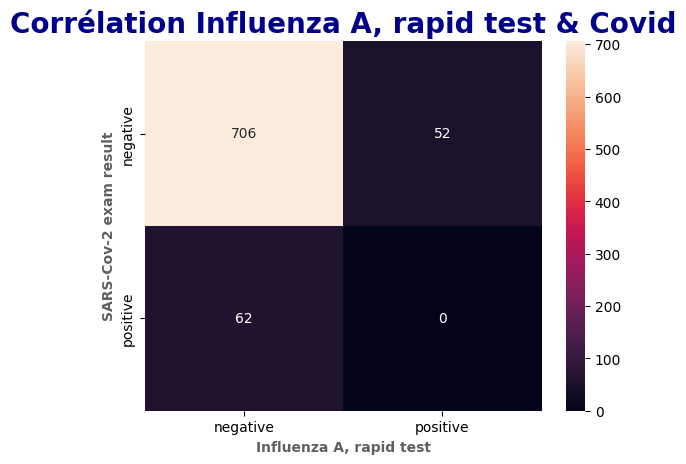

In [60]:
for col in viral_columns:
  plt.title(f"Corrélation {col} & Covid", size = 20, fontweight = 'bold',color='darkblue')
  sns.heatmap(pd.crosstab(dataset['SARS-Cov-2 exam result'], dataset[col]), annot = True, fmt = 'd')
  plt.ylabel("SARS-Cov-2 exam result", size = 10, c = '#5D615B', fontweight = 'bold') 
  plt.xlabel(col, size = 10, c = '#5D615B', fontweight = 'bold') 
  plt.show()
  

La "double infection" semble rare. On note toujorus que le Rhinovirus est très présent dans l'échantillon de résulats.

## **Relation Variables & Variables**

Analysons maintenant les corrélations entre les différentes variables.

### *Relation sur les colonnes de type "Sanguin"*

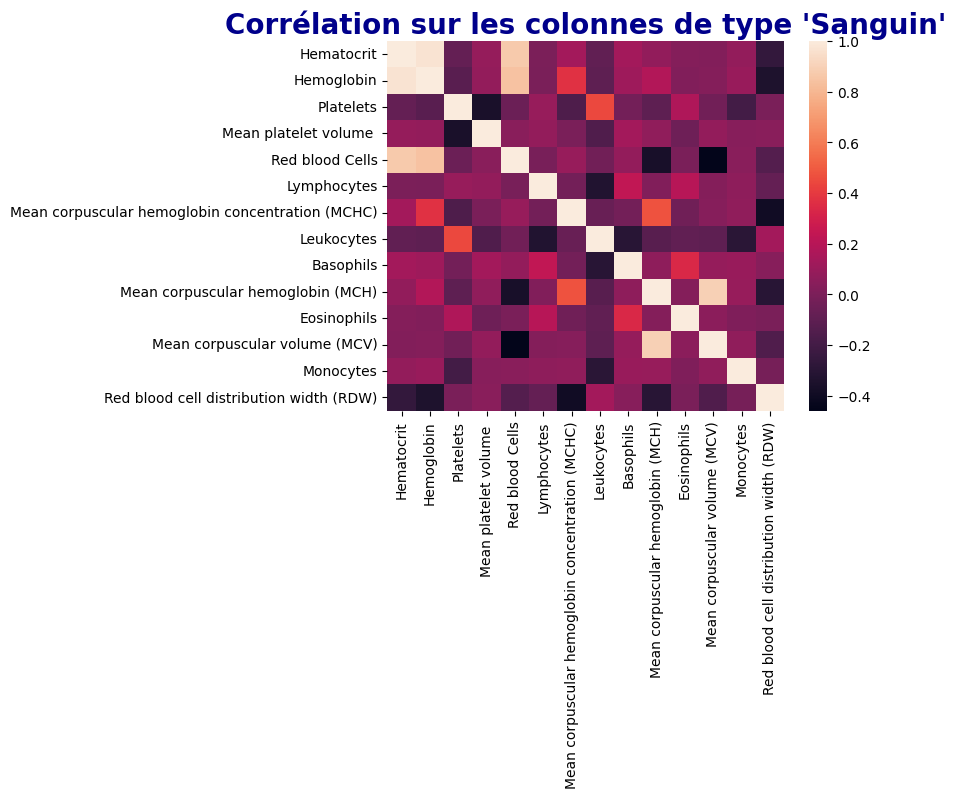

In [61]:
plt.title(f"Corrélation sur les colonnes de type 'Sanguin'", size = 20, fontweight = 'bold',color='darkblue') 
sns.heatmap(dataset[blood_columns].corr())
plt.show()

Quelques corrélations semblent se dessiner. On peut les trier pour un meilleur visuel :

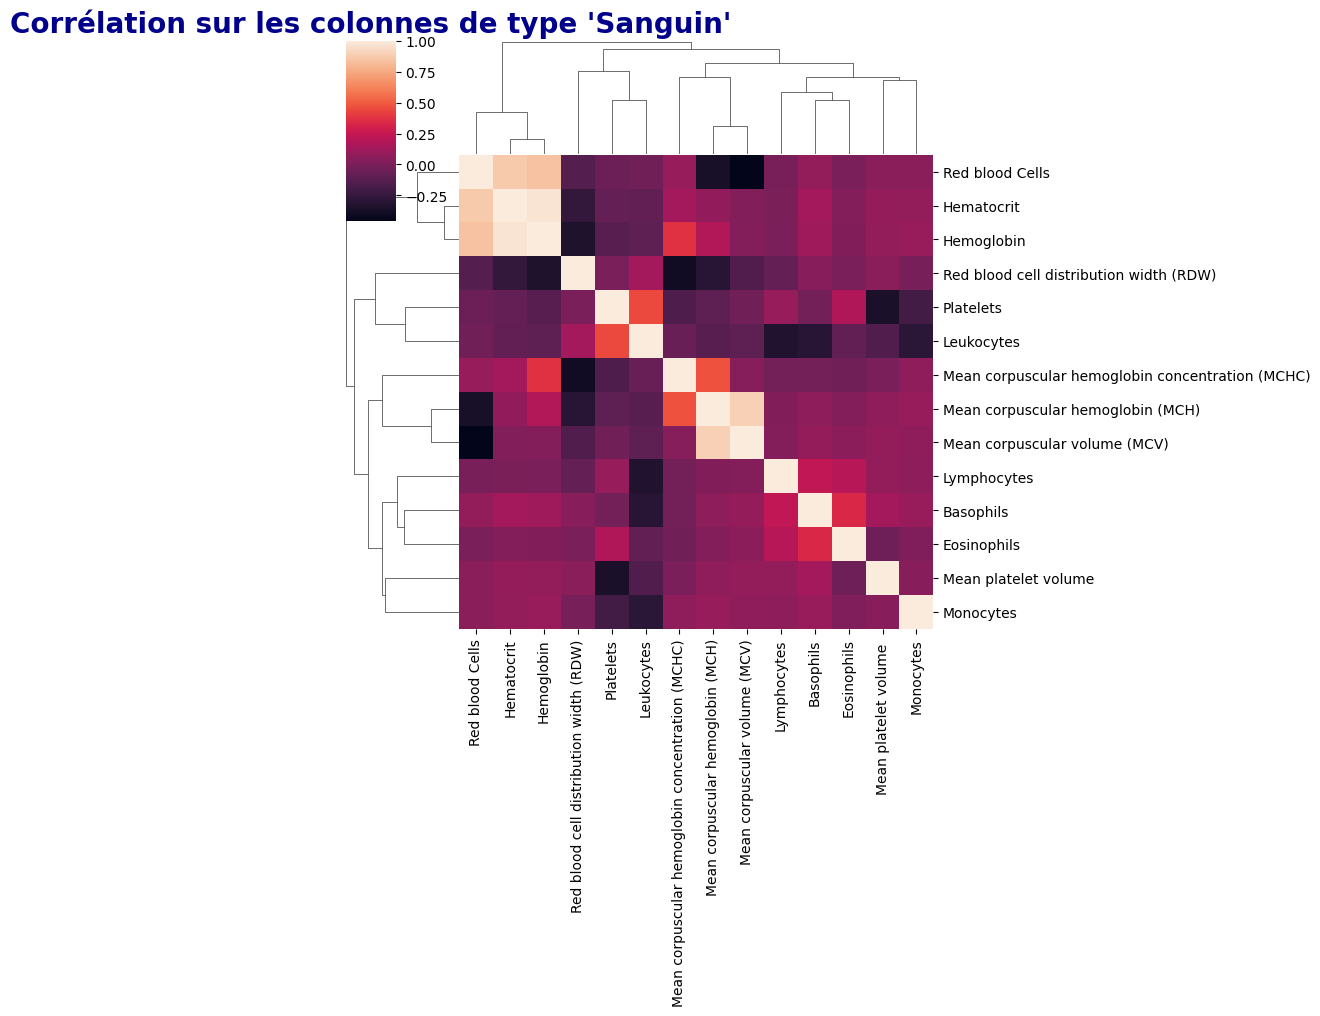

In [72]:
sns.clustermap(dataset[blood_columns].corr())
plt.title(f"Corrélation sur les colonnes de type 'Sanguin'", size = 20, fontweight = 'bold',color='darkblue') 
plt.show()

Certaines variables sont très corrélées.

### *Relation Age et colonnes de type "Sanguin"*

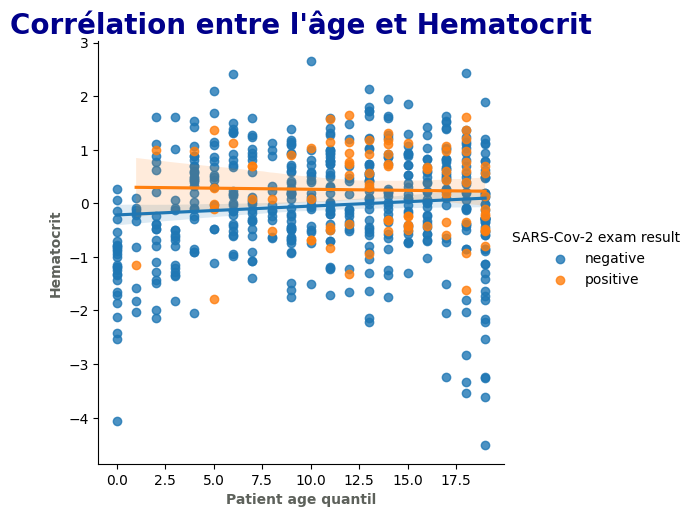

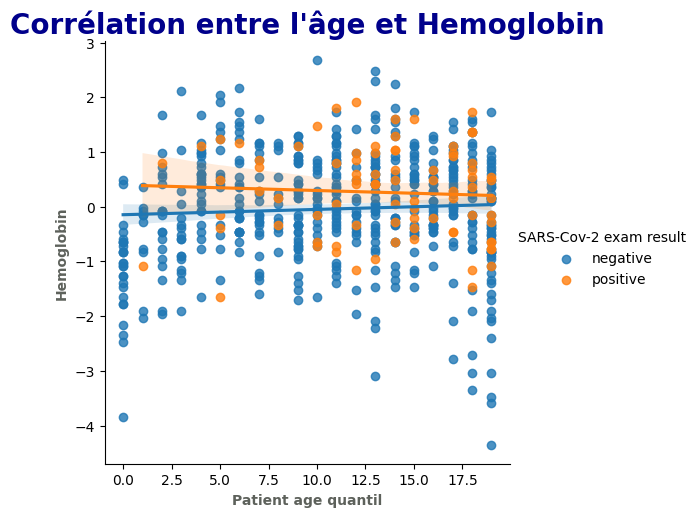

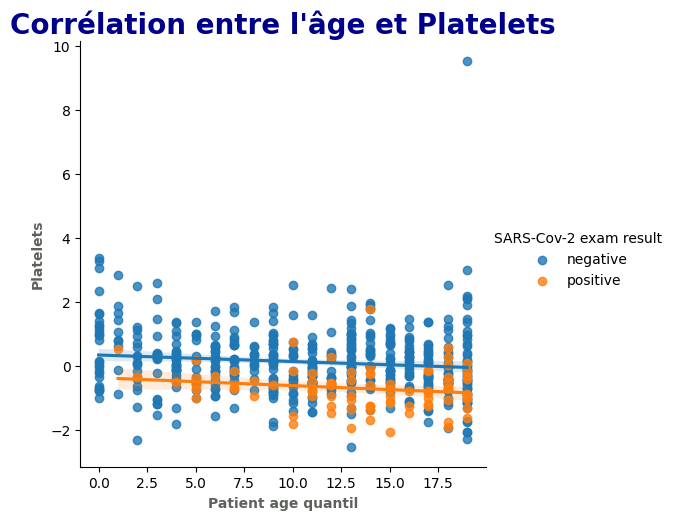

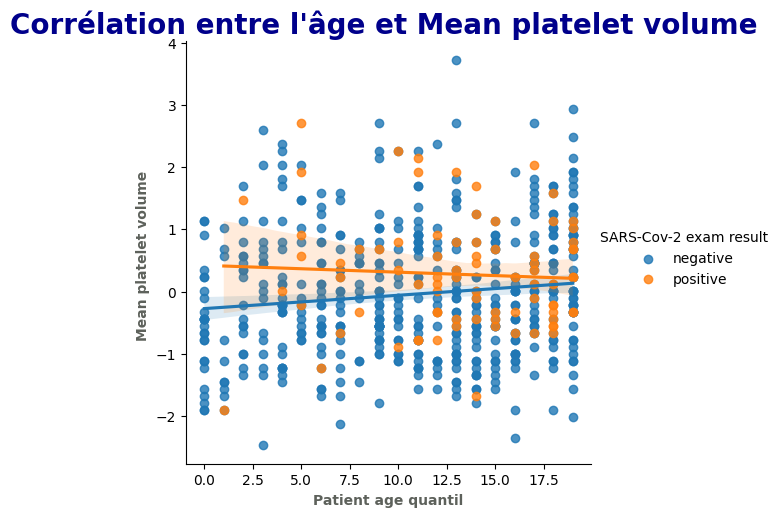

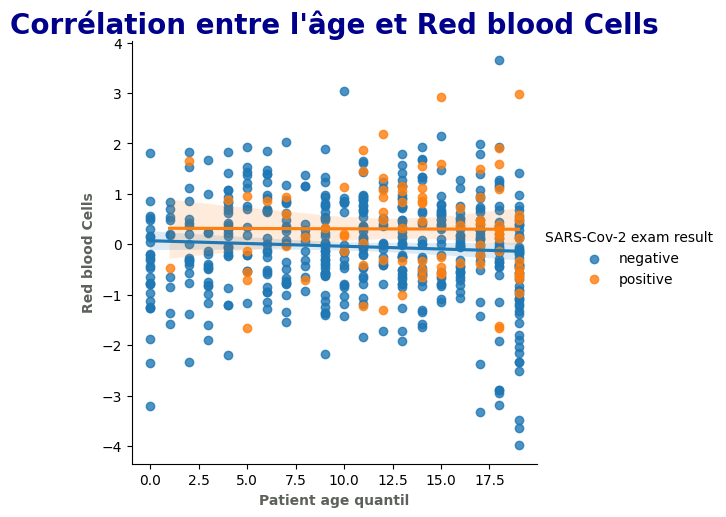

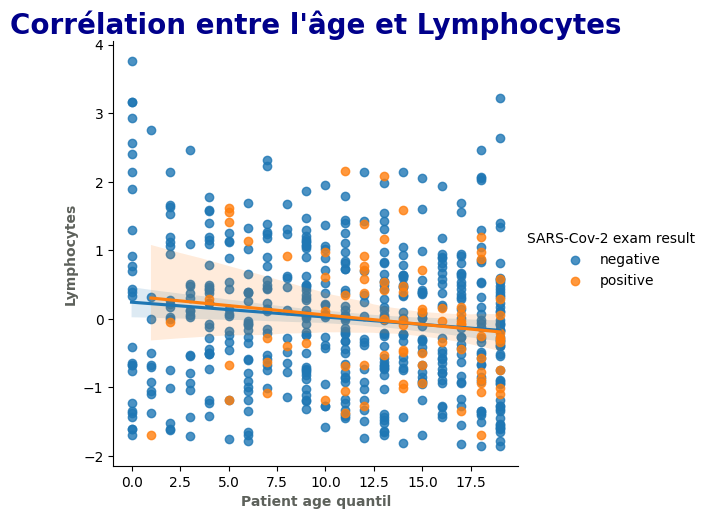

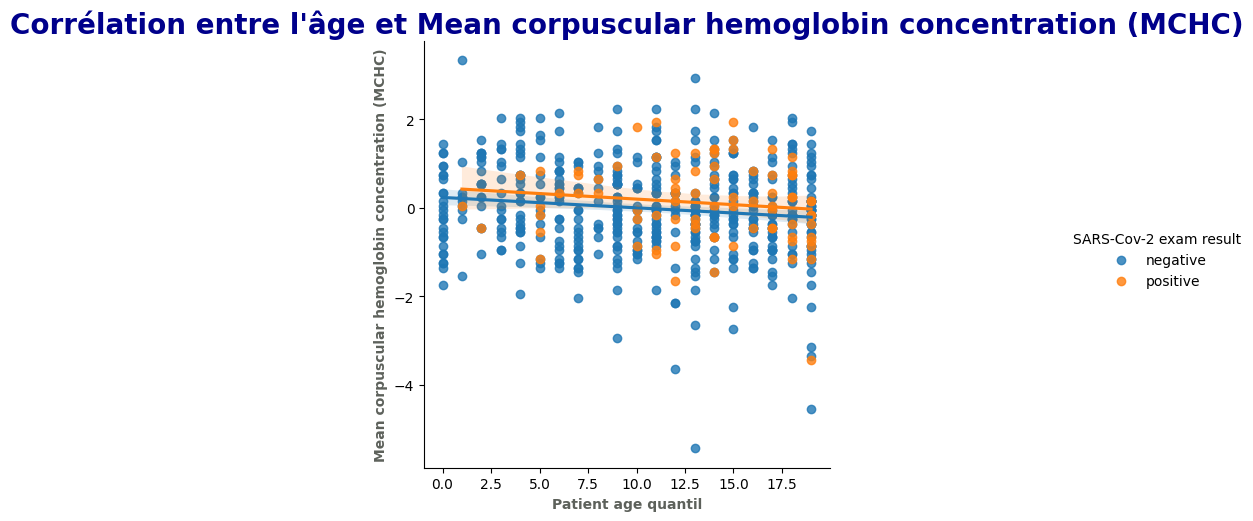

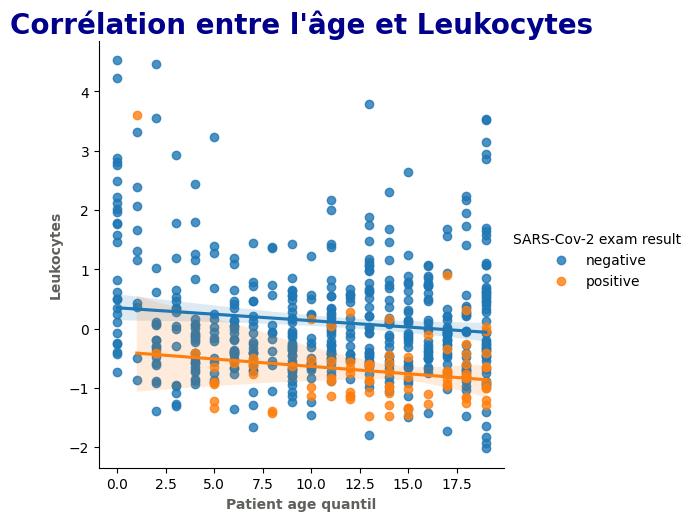

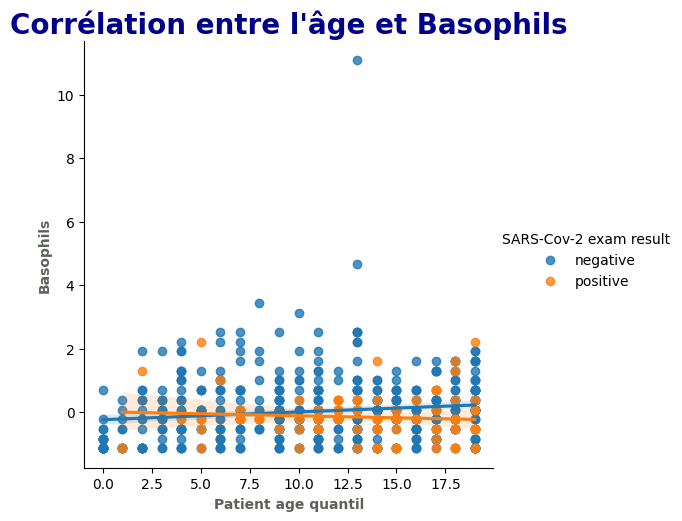

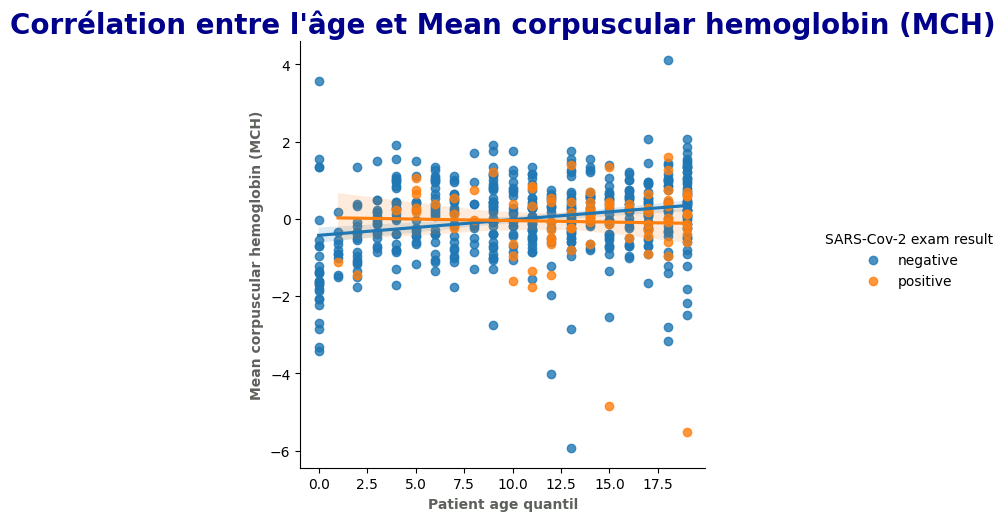

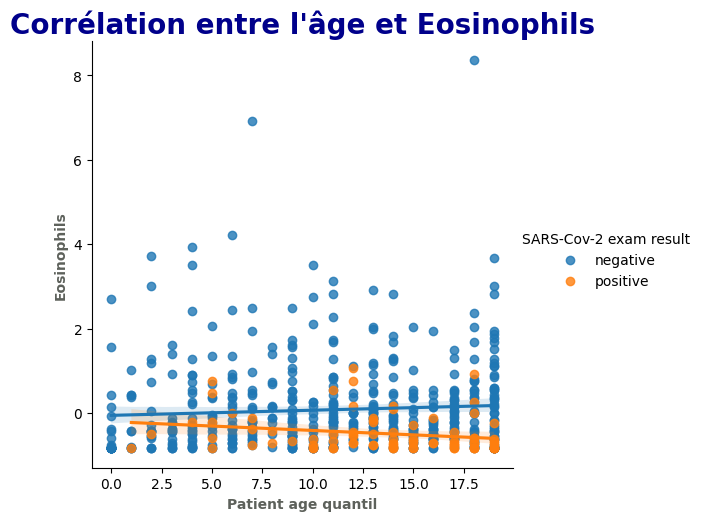

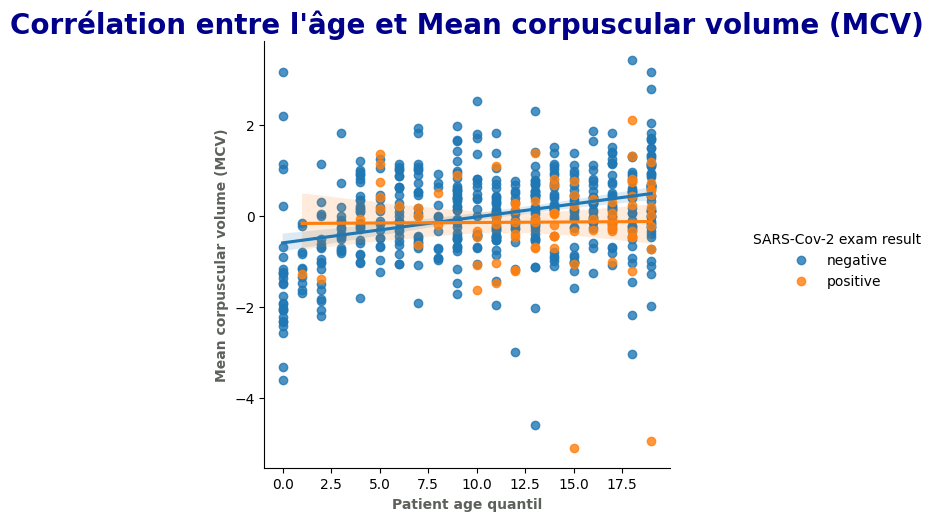

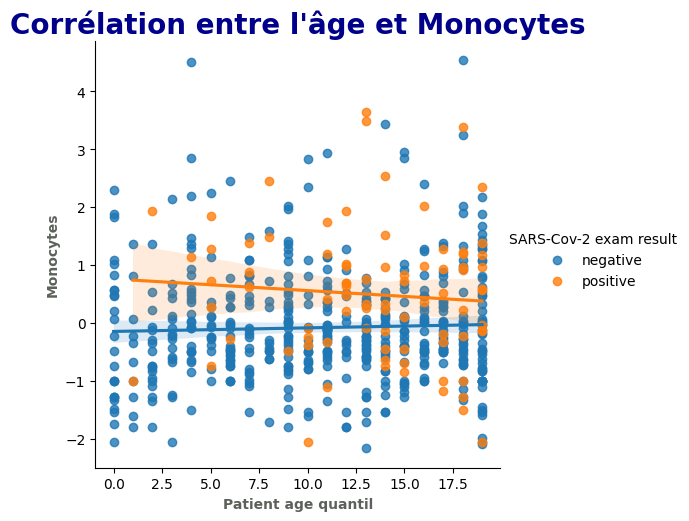

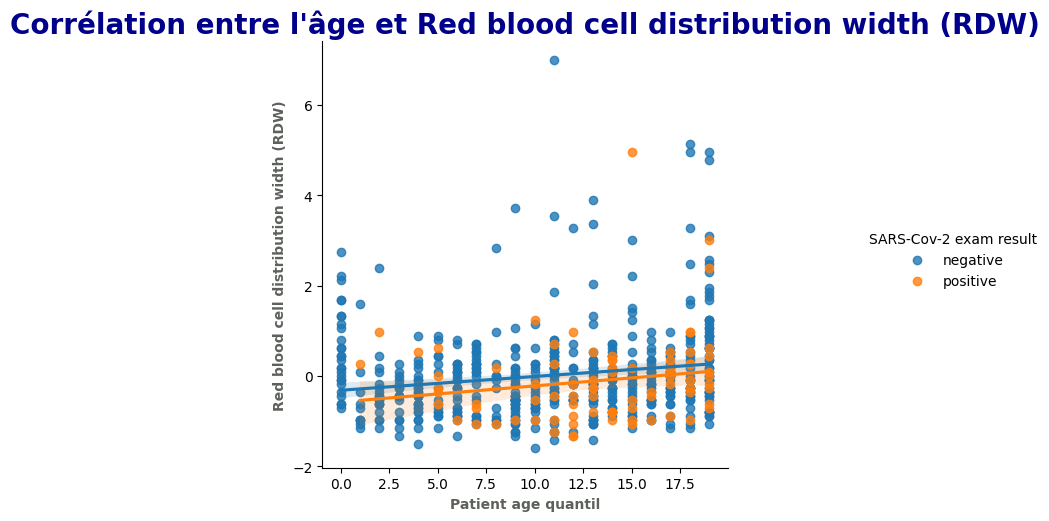

In [70]:
for col in blood_columns :
    sns.lmplot(x = "Patient age quantile",y=col, hue  = "SARS-Cov-2 exam result", data = dataset)
    plt.title(f"Corrélation entre l'âge et {col}", size = 20, fontweight = 'bold',color='darkblue') 
    plt.ylabel(col, size = 10, c = '#5D615B', fontweight = 'bold') ## personnalisation axe y
    plt.xlabel("Patient age quantil", size = 10, c = '#5D615B', fontweight = 'bold') ## personnalisation axe x
    plt.show()

On ne distingue pas de vraies tendances, mais on peut compléter par une analyse des coefficients de corrélation.

In [73]:
dataset.corr(numeric_only = True)["Patient age quantile"].sort_values()

Leukocytes                                              -0.166386
Platelets                                               -0.158683
Lymphocytes                                             -0.125935
Mean corpuscular hemoglobin concentration (MCHC)        -0.124671
Red blood Cells                                         -0.037510
Patient addmited to intensive care unit (1=yes, 0=no)   -0.035772
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.015736
Eosinophils                                              0.022085
Patient addmited to regular ward (1=yes, 0=no)           0.046166
Monocytes                                                0.050962
Hemoglobin                                               0.060320
Hematocrit                                               0.096808
Basophils                                                0.107525
Mean platelet volume                                     0.119449
Red blood cell distribution width (RDW)                  0.166429
Mean corpu

Pas de corrélation entre l'âge et les éléments du taux sanguin.

### *Relation sur les variables de type "Virus"*

Dans les différentes colonnes, nous avons noté deux virus, "Influenza A" et "Influenza B" et deux colonnes "Rapid Test" associés. Vérifions leur relation.

In [74]:
pd.crosstab(dataset['Influenza A'], dataset['Influenza A, rapid test'])

Influenza A, rapid test  negative  positive
Influenza A                                
detected                        2         4
not_detected                  245        15

In [75]:
pd.crosstab(dataset['Influenza B'], dataset['Influenza B, rapid test'])

Influenza B, rapid test  negative  positive
Influenza B                                
detected                       18        11
not_detected                  233         4

Les "Rapid Test" donnent de mauvais résultats.

### *Relation "Virus" / "Sanguin"*

In [ ]:
# Création de la variable "est_malade"
dataset['est_malade'] = np.sum(dataset[viral_columns[:-2]] =='detected', axis = 1) >= 1 #On enleve les rapid tests au calcul de notre colonne

In [78]:
dataset.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2           

Pour continuer nos relations, on va créer deux Datasets, "malade" et "non_malade".

In [79]:
dataset_malade = dataset[dataset['est_malade'] == True]
dataset_non_malade = dataset[dataset['est_malade'] == False]

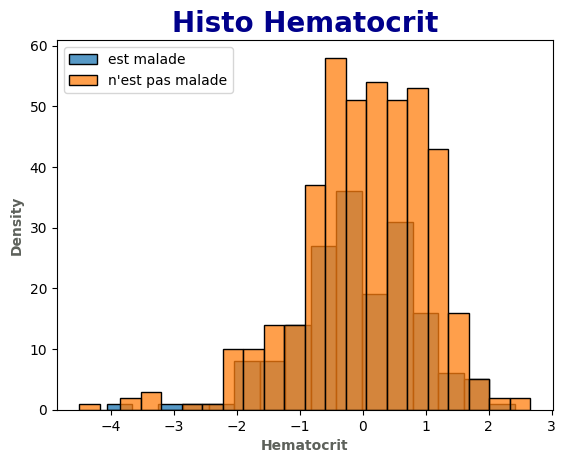

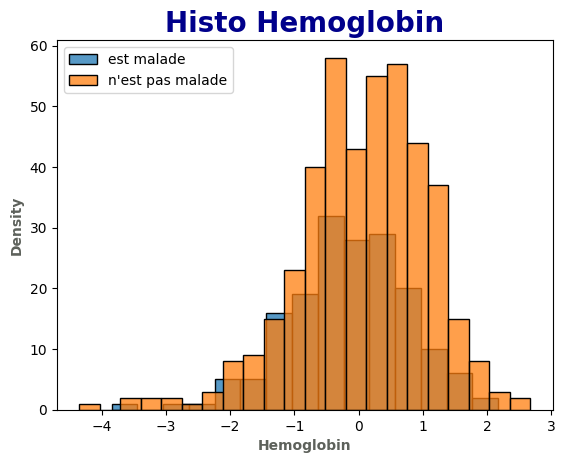

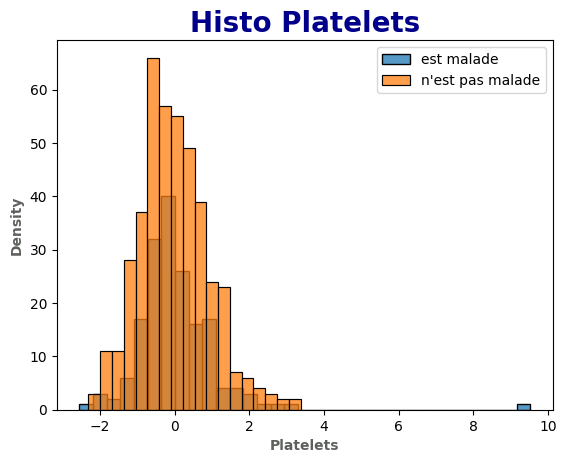

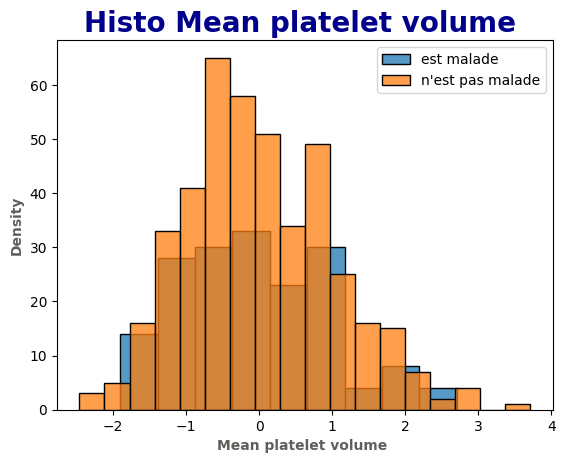

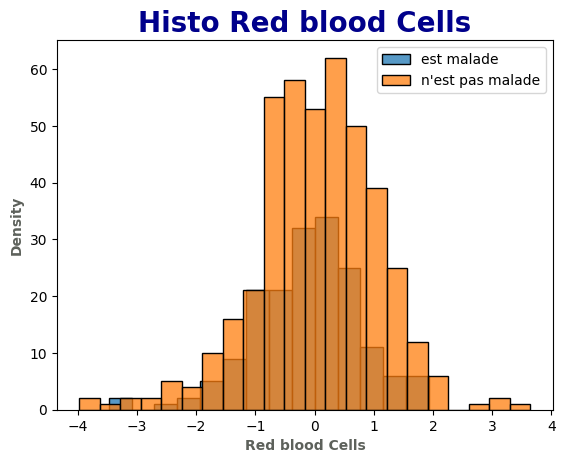

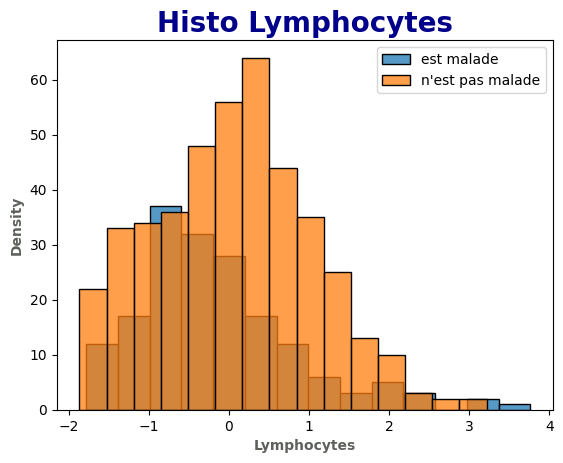

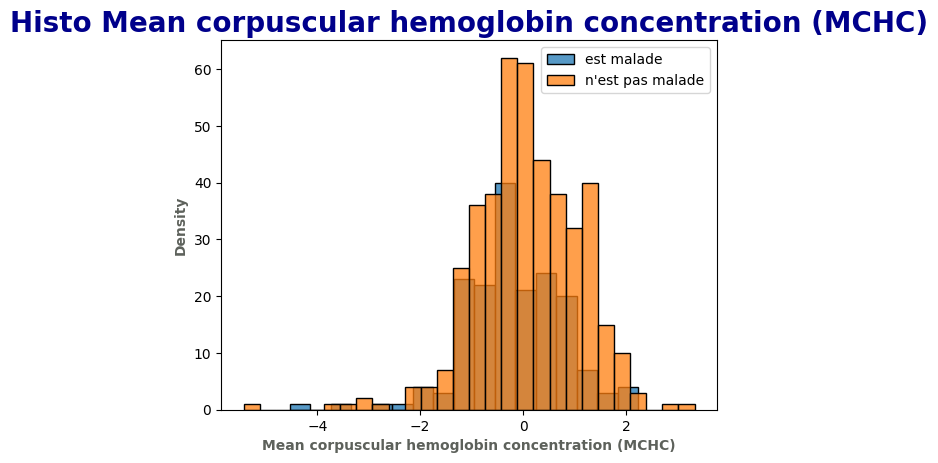

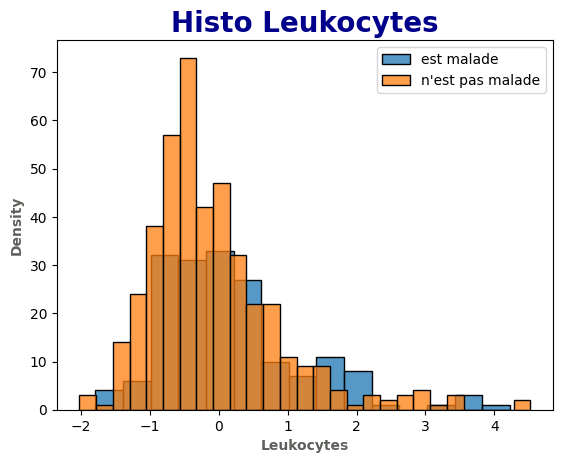

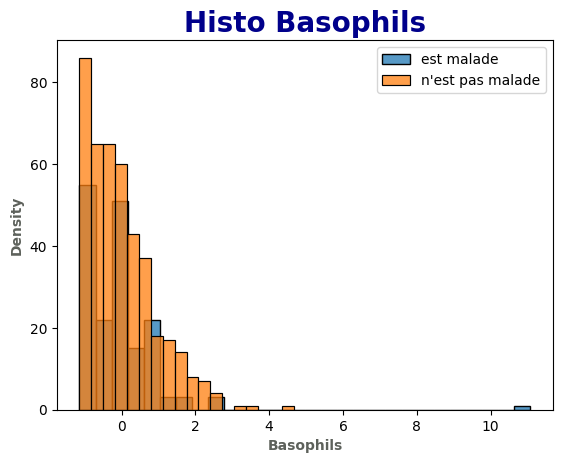

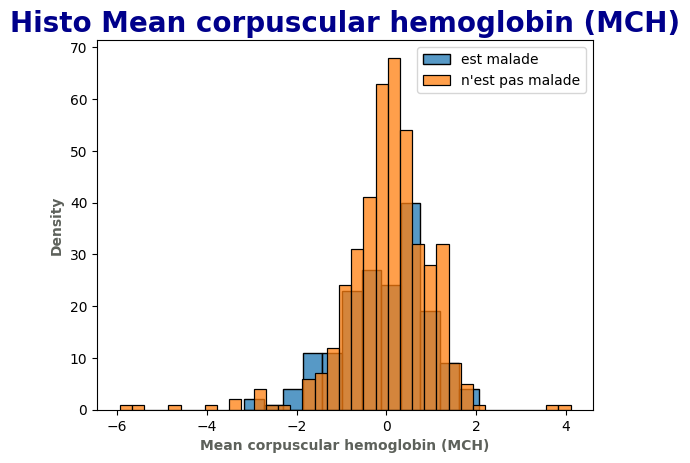

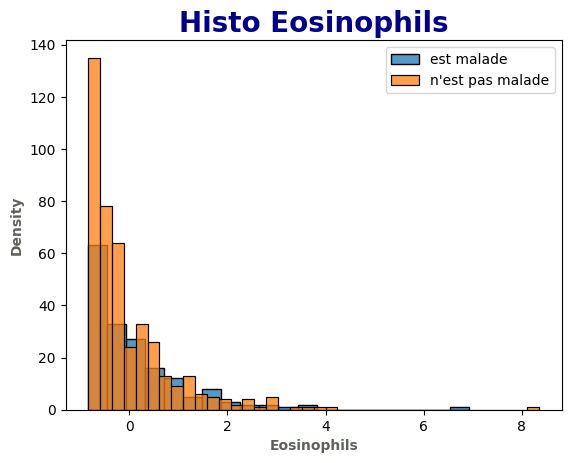

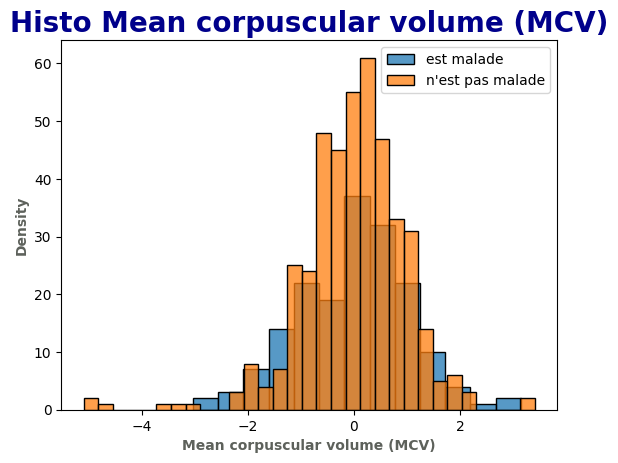

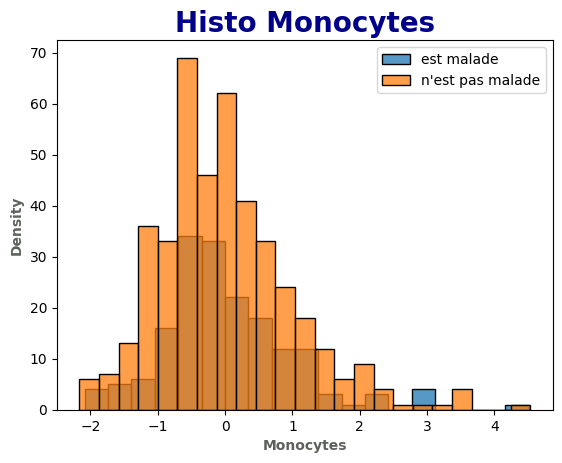

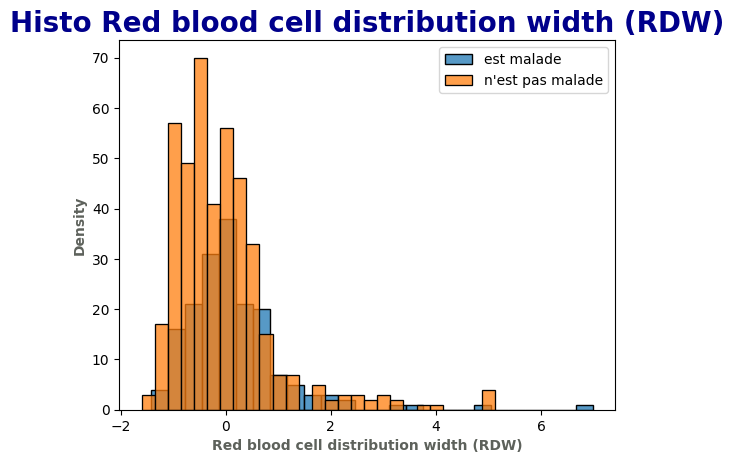

In [80]:
for col in blood_columns:
  plt.title(f"Histo {col}", size = 20, fontweight = 'bold',color='darkblue') 
  sns.histplot(dataset_malade[col], label='est malade')
  sns.histplot(dataset_non_malade[col], label="n'est pas malade")
  plt.ylabel("Density", size = 10, c = '#5D615B', fontweight = 'bold') ## personnalisation axe y
  plt.xlabel(col, size = 10, c = '#5D615B', fontweight = 'bold') ## personnalisation axe x
  plt.legend()
  plt.show()

On remarque encore quelques variations notamment sur les Lymphocites et les Monocytes.

On va créer une colonne "statut" pour les trois colonnes concernant l'hospitalisation afin de hiérarchiser l'état de santé du patient.

In [81]:
# Création de la fonction
def hospitalisation(df):
  if df['Patient addmited to regular ward (1=yes, 0=no)'] ==1:
    return 'surveillance'
  elif df['Patient addmited to semi-intensive unit (1=yes, 0=no)'] == 1:
    return 'soins semi-intensives'
  elif df['Patient addmited to intensive care unit (1=yes, 0=no)']==1:
    return 'soins intensifs'
  else:
    return 'inconnu'

In [82]:
# Application de la fonction
dataset['statut'] = dataset.apply(hospitalisation, axis = 1)

# Vérification
dataset.head(3)

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2                    NaN              NaN             NaN   

  Chlamydophila pneumoniae    Adenovirus Parainfluenza 4 Coronavirus229E  \
0                      NaN           NaN             NaN             NaN   
1             not_detected  not_detected    not_detected    not_detected   
2                      NaN           NaN             NaN             NaN   

  CoronavirusOC43 Inf A H1N1 2009 Bordetella pertussis Metapneumovirus  \
0             NaN             NaN                  NaN             NaN   
1    not_detected    not_detected         not_detected    not_detected   
2             NaN             NaN                  NaN             NaN   

  Parainfluenza 2 Influenza B, rapid test Influenza A, rapid test  est_malade  \
0             NaN                     NaN                     NaN       False   
1    not_detected                negative                negative        True   
2             NaN                     NaN                     NaN       False   

    statut  
0  inconnu  
1  inconnu  
2  inconnu

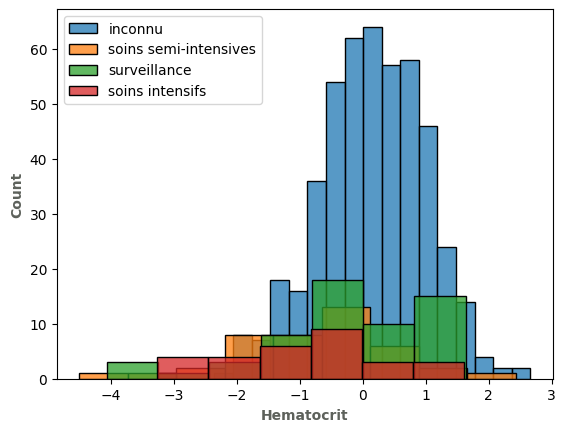

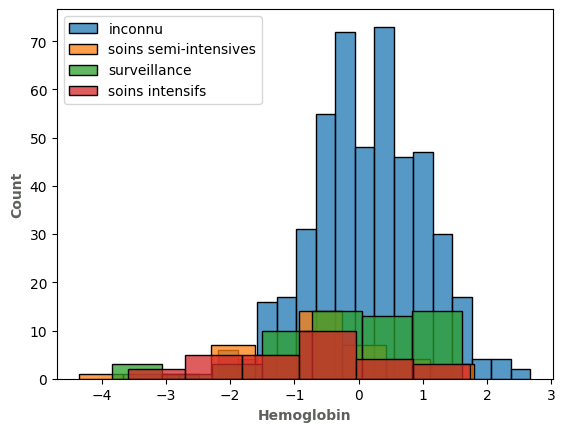

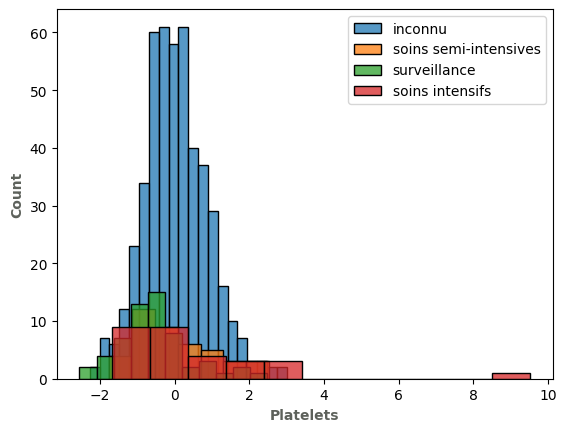

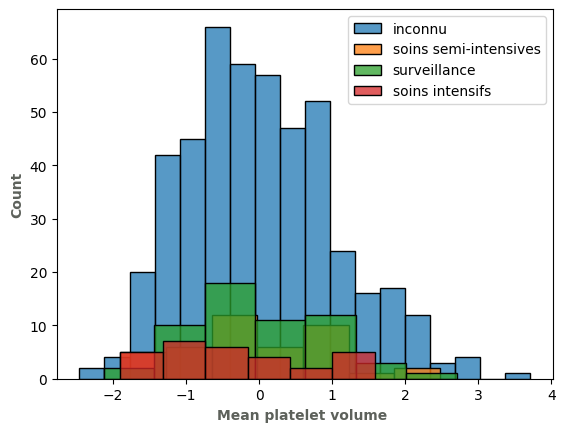

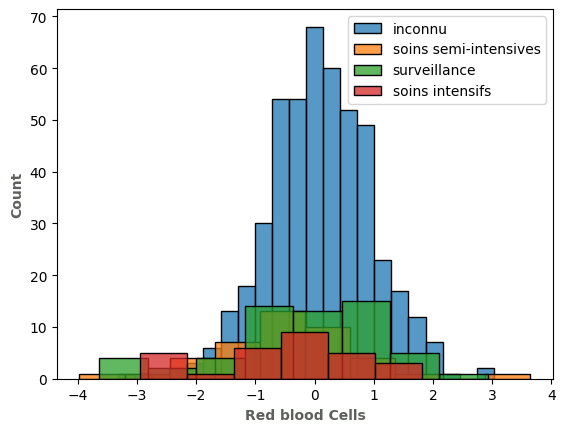

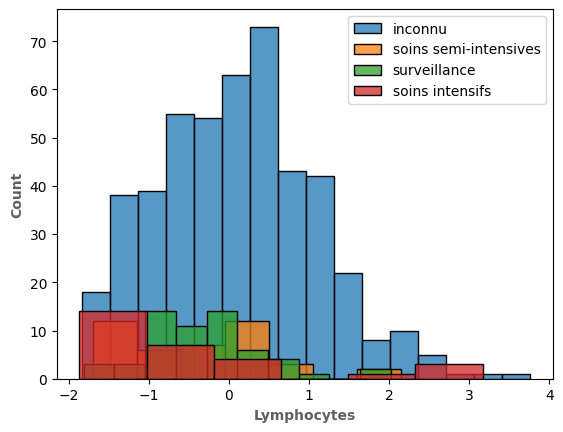

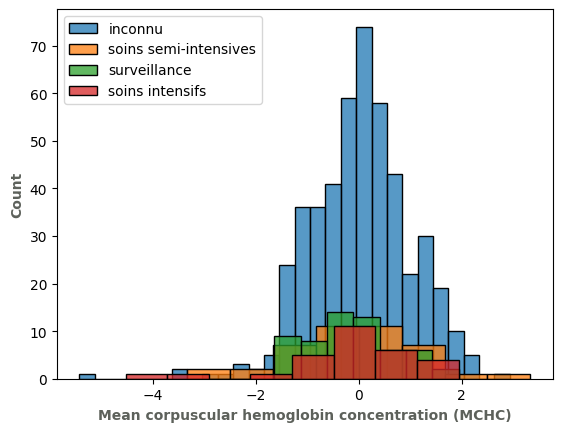

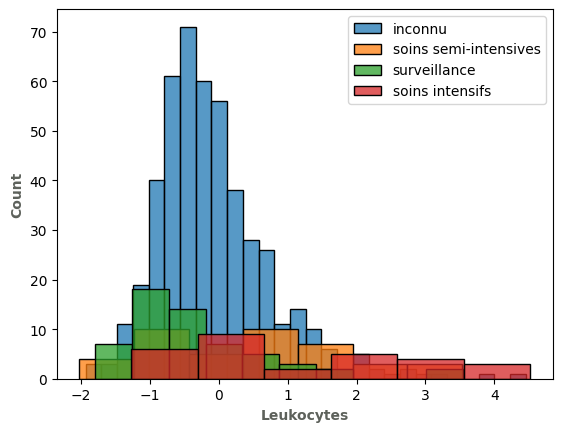

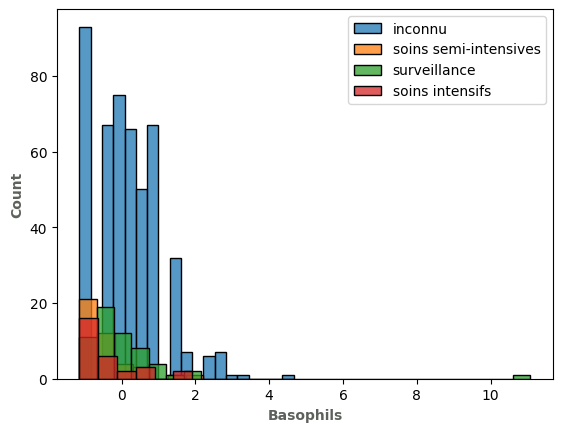

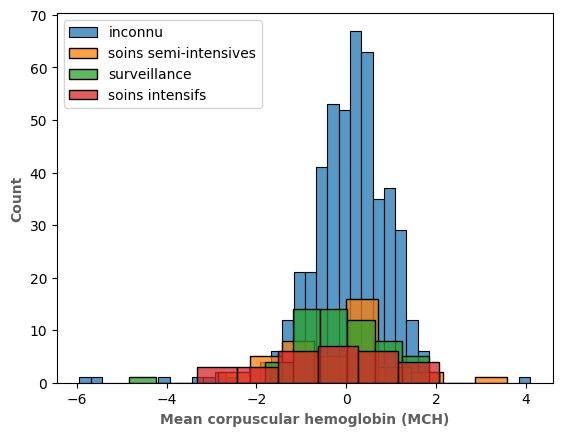

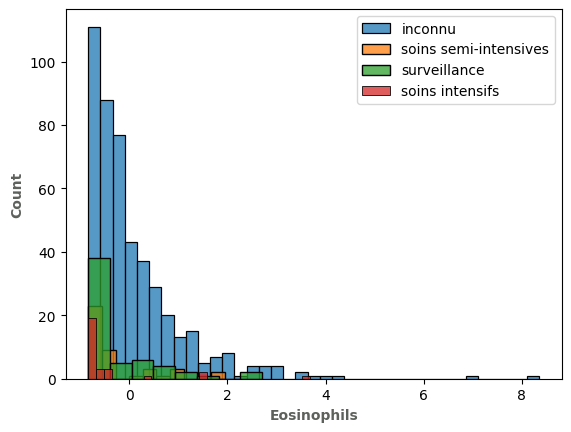

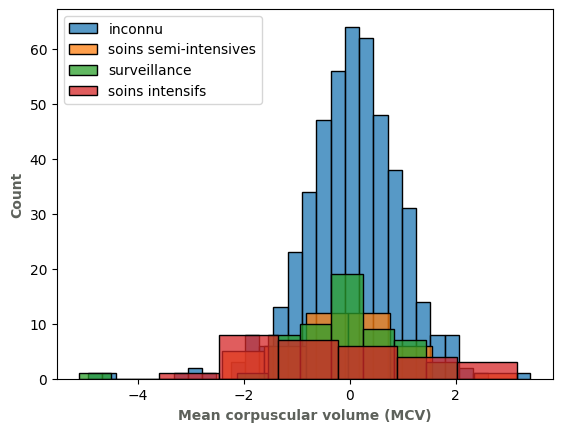

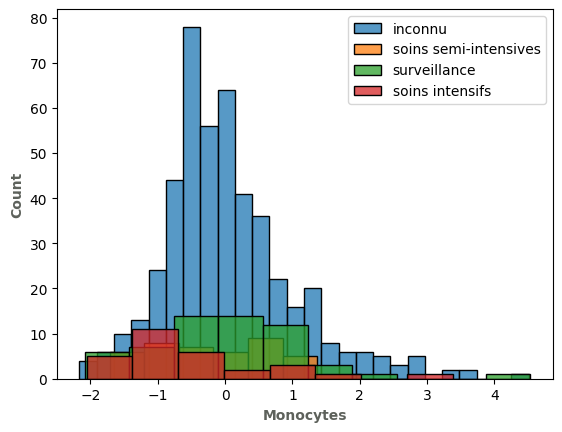

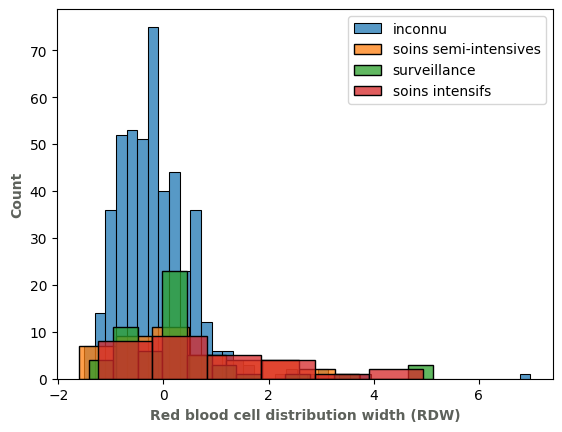

In [98]:
for col in blood_columns:
  for cat in dataset['statut'].unique():
    sns.histplot(dataset[dataset['statut'] == cat][col], label = cat)
    plt.ylabel("Count", size = 10, c = '#5D615B', fontweight = 'bold') ## personnalisation axe y
    plt.xlabel(col, size = 10, c = '#5D615B', fontweight = 'bold') ## personnalisation axe x
    plt.legend()
  plt.show()

Les mêmes colonnes (Leuphocytes, ...) rencontrent encore les mêmes "différences" avec les autres colonnes. 

Peut-on travailler avec les "sans NA" ?

In [99]:
dataset.dropna().count()

Patient age quantile                                     99
SARS-Cov-2 exam result                                   99
Patient addmited to regular ward (1=yes, 0=no)           99
Patient addmited to semi-intensive unit (1=yes, 0=no)    99
Patient addmited to intensive care unit (1=yes, 0=no)    99
Hematocrit                                               99
Hemoglobin                                               99
Platelets                                                99
Mean platelet volume                                     99
Red blood Cells                                          99
Lymphocytes                                              99
Mean corpuscular hemoglobin concentration (MCHC)         99
Leukocytes                                               99
Basophils                                                99
Mean corpuscular hemoglobin (MCH)                        99
Eosinophils                                              99
Mean corpuscular volume (MCV)           

Bon... Non il reste trop peu d'observations. Et par type de colonnes ?

In [100]:
dataset[blood_columns].count()

Hematocrit                                          603
Hemoglobin                                          603
Platelets                                           602
Mean platelet volume                                599
Red blood Cells                                     602
Lymphocytes                                         602
Mean corpuscular hemoglobin concentration (MCHC)    602
Leukocytes                                          602
Basophils                                           602
Mean corpuscular hemoglobin (MCH)                   602
Eosinophils                                         602
Mean corpuscular volume (MCV)                       602
Monocytes                                           601
Red blood cell distribution width (RDW)             602
dtype: int64

In [101]:
dataset[viral_columns].count()

Respiratory Syncytial Virus    1354
Influenza A                    1354
Influenza B                    1354
Parainfluenza 1                1352
CoronavirusNL63                1352
Rhinovirus/Enterovirus         1352
Coronavirus HKU1               1352
Parainfluenza 3                1352
Chlamydophila pneumoniae       1352
Adenovirus                     1352
Parainfluenza 4                1352
Coronavirus229E                1352
CoronavirusOC43                1352
Inf A H1N1 2009                1352
Bordetella pertussis           1352
Metapneumovirus                1352
Parainfluenza 2                1352
Influenza B, rapid test         820
Influenza A, rapid test         820
dtype: int64

On a déjà des éléments un peu plus intéressants. Séparons les deux éléments pour travailler.

In [103]:
dataset1 = dataset[viral_columns[:-2]]
dataset1['covid'] = dataset['SARS-Cov-2 exam result']
dataset1.dropna()['covid'].value_counts(normalize=True)*100

C:\Users\sauss\AppData\Local\Temp\ipykernel_38432\650283224.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset1['covid'] = dataset['SARS-Cov-2 exam result']


covid
negative    91.715976
positive     8.284024
Name: proportion, dtype: float64

92% de négatifs & 8% de positifs sur ce premier Dataset.

In [104]:
dataset2 = dataset[blood_columns]
dataset2['covid'] = dataset['SARS-Cov-2 exam result']
dataset2.dropna()['covid'].value_counts(normalize=True)*100

C:\Users\sauss\AppData\Local\Temp\ipykernel_38432\1449543406.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset2['covid'] = dataset['SARS-Cov-2 exam result']


covid
negative    86.454849
positive    13.545151
Name: proportion, dtype: float64

86% de négatifs & 13% de positifs sur le deuxième.

Maintenant que tout est exploré et préparé, il faut que l'on valide nos hypothèses.

# **Student Test**

On a observé que quelques colonnes sortaient des résultats différents sur la positivité ou non au virus Covid 19 (Leucocytes, Monocytes, Platelets..).
Pour valider l'hypothèse, on applique le test de Student avec une hypothèse "0" : Les taux de ces colonnes sont égaux entre eux que le patient soit atteint ou non du Covid.
Et on teste pour rejeter ou non l'hypothèse (avec un seuil alpha à 2%). Si ce seuil est inférieur, on rejette l'hypothèse donc on valide que ces taux ont un impact.

In [118]:
# Il faut que nos tests soient bien balancés ce qui n'est pas le cas (90% de négatifs vs 10% de positifs) donc on échantillonne pour travailler
balance_ned = dataset_negative.sample(dataset_positive.shape[0]) 

In [119]:
# On crée notre fonction
def t_test(col):
  alpha = 0.02
  stat,p = ttest_ind(dataset_negative.sample(dataset_positive.shape[0])[col].dropna(), dataset_positive[col].dropna())
  if p < alpha:
    return 'h0 rejetée'
  else:
    return 0

In [120]:
# On imprime nos résultats
for col in blood_columns :
    print(f'{col :_<50} {t_test(col)}')

Hematocrit________________________________________ 0
Hemoglobin________________________________________ 0
Platelets_________________________________________ h0 rejetée
Mean platelet volume _____________________________ 0
Red blood Cells___________________________________ 0
Lymphocytes_______________________________________ 0
Mean corpuscular hemoglobin concentration (MCHC)__ 0
Leukocytes________________________________________ h0 rejetée
Basophils_________________________________________ 0
Mean corpuscular hemoglobin (MCH)_________________ 0
Eosinophils_______________________________________ h0 rejetée
Mean corpuscular volume (MCV)_____________________ 0
Monocytes_________________________________________ h0 rejetée
Red blood cell distribution width (RDW)___________ 0


On a bien des taux différents sur certains taux, puisque l'hypothèse est rejetée.

# **PreProcessing**

On va recréer un dataset propre avec les colonnes qui nous intéressent.

In [121]:
data = dataset.copy()

In [122]:
viral_columns = list(viral_columns)
blood_columns = list(blood_columns)
key_columns = ['Patient age quantile','SARS-Cov-2 exam result']

In [123]:
data = data[key_columns + blood_columns + viral_columns]
data.head(3)

Patient age quantile SARS-Cov-2 exam result  Hematocrit  Hemoglobin  \
0                    13               negative         NaN         NaN   
1                    17               negative    0.236515    -0.02234   
2                     8               negative         NaN         NaN   

   Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0        NaN                    NaN              NaN          NaN   
1  -0.517413               0.010677         0.102004     0.318366   
2        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2                    NaN              NaN             NaN   

  Chlamydophila pneumoniae    Adenovirus Parainfluenza 4 Coronavirus229E  \
0                      NaN           NaN             NaN             NaN   
1             not_detected  not_detected    not_detected    not_detected   
2                      NaN           NaN             NaN             NaN   

  CoronavirusOC43 Inf A H1N1 2009 Bordetella pertussis Metapneumovirus  \
0             NaN             NaN                  NaN             NaN   
1    not_detected    not_detected         not_detected    not_detected   
2             NaN             NaN                  NaN             NaN   

  Parainfluenza 2 Influenza B, rapid test Influenza A, rapid test  
0             NaN                     NaN                     NaN  
1    not_detected                negative                negative  
2             NaN                     NaN                     NaN

Nous allons tenter de construire un modèle de prédiction.<br>
Créons un jeu d'entrainement et un jeu de test pour pouvoir construire notre modèle.

In [125]:
trainset, testset = train_test_split(data, test_size = 0.2,random_state = 0)

In [126]:
trainset['SARS-Cov-2 exam result'].value_counts()

SARS-Cov-2 exam result
negative    4068
positive     447
Name: count, dtype: int64

In [127]:
testset['SARS-Cov-2 exam result'].value_counts()

SARS-Cov-2 exam result
negative    1018
positive     111
Name: count, dtype: int64

10% de positifs dans les deux cas, nos sets sont bien paramétrés.

Les résultats étant de type objet, on va les encoder pour pouvoir travailler.<br>
"1" sera un cas positif (ou detecté) & "0" négatif (ou non détecté).

In [128]:
# Fonction d'encodage
def encodage(data):
  code = {'positive' :1,'negative' :0,'detected':1,'not_detected':0}
  for col in data.select_dtypes('object'):
    data[col] = data[col].map(code)
  return data

In [130]:
# Fonction de suppression des valeurs manquantes
def imputation(data):
    return data.dropna(axis =0)

In [131]:
# Preprocessing 
def preprocessing(data):
  data = encodage(data)
  data = imputation(data)

  X = data.drop('SARS-Cov-2 exam result', axis=1)
  y = data['SARS-Cov-2 exam result']

  print(y.value_counts())

  return X,y

In [132]:
# Application du prepocessing sur notre jeu d'entraînement
X_train, y_train = preprocessing(trainset)

SARS-Cov-2 exam result
0    73
1    10
Name: count, dtype: int64


In [133]:
# Application du prepocessing sur notre jeu de test
X_test, y_test = preprocessing(testset)

SARS-Cov-2 exam result
0    13
1     3
Name: count, dtype: int64


# **Modelisation - DecisionTree**

In [135]:
# Création du modèle
model = DecisionTreeClassifier(random_state = 0)

In [136]:
def evaluation(model):
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)

  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))

In [137]:
evaluation(model)

[[11  2]
 [ 1  2]]
              precision    recall  f1-score   support

           0       0.92      0.85      0.88        13
           1       0.50      0.67      0.57         3

    accuracy                           0.81        16
   macro avg       0.71      0.76      0.73        16
weighted avg       0.84      0.81      0.82        16



Le modèle a du mal à identifier les résultats positifs.<br>
On peut regarder comment se comporte les jeux d'entraînement et de test avec learning curve.

In [ ]:
def evaluation(model):
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)

  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))

  N, train_score, val_score = learning_curve(model, X_train, y_train, cv = 4, scoring = 'f1', train_sizes = np.linspace(0.1, 1, 10))
  plt.figure(figsize = (12,8))
  plt.plot(N, train_score.mean(axis = 1), label ='train score')
  plt.plot(N, val_score.mean(axis = 1), label ='val score')
  plt.title(f"Learning Curve", size = 20, fontweight = 'bold',color='darkblue')
  plt.legend()
  plt.show()

[[11  2]
 [ 1  2]]
              precision    recall  f1-score   support

           0       0.92      0.85      0.88        13
           1       0.50      0.67      0.57         3

    accuracy                           0.81        16
   macro avg       0.71      0.76      0.73        16
weighted avg       0.84      0.81      0.82        16



c:\Users\sauss\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sauss\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\sauss\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sauss\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 380, in _score
    y_pred = method_caller(
        estimator,
    ...<2 lines>...
        pos_label=pos_lab

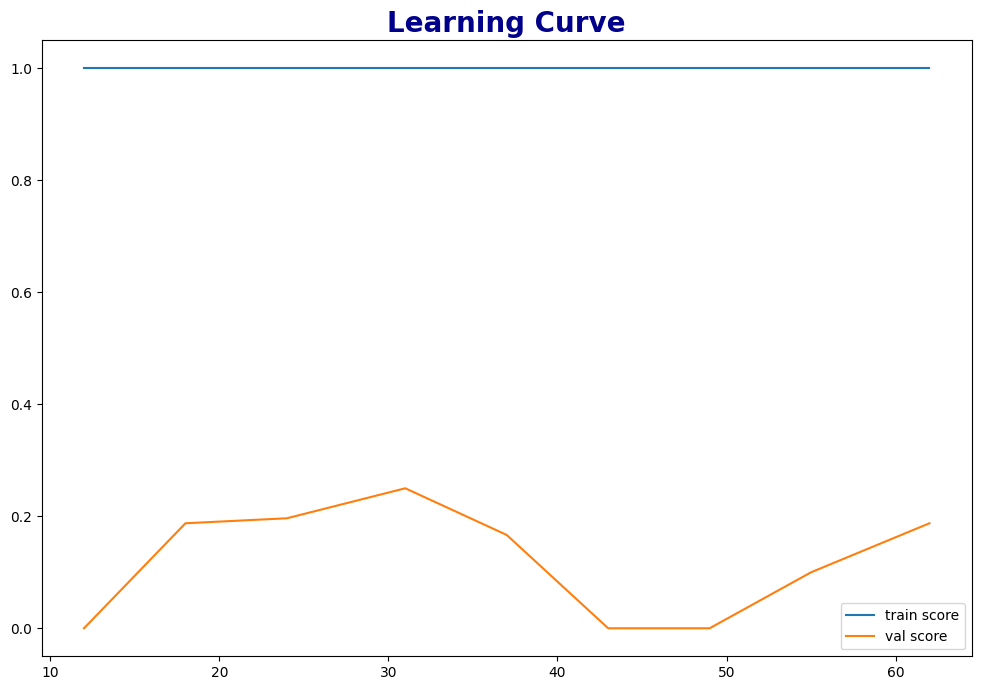

In [141]:
evaluation(model)

On remarque un overfitting sévère sur notre modèle puisque les données d'entraînement sont à 1 et le modèle a du mal à gérer le jeu de test.

On va garder les valeurs manquantes, mais les remplacer par une valeur aberrante pour les distinguer et diminuer l'effet du surapprentissage.

SARS-Cov-2 exam result
0    4068
1     447
Name: count, dtype: int64
SARS-Cov-2 exam result
0    1018
1     111
Name: count, dtype: int64
[[1007   11]
 [ 104    7]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1018
           1       0.39      0.06      0.11       111

    accuracy                           0.90      1129
   macro avg       0.65      0.53      0.53      1129
weighted avg       0.86      0.90      0.86      1129



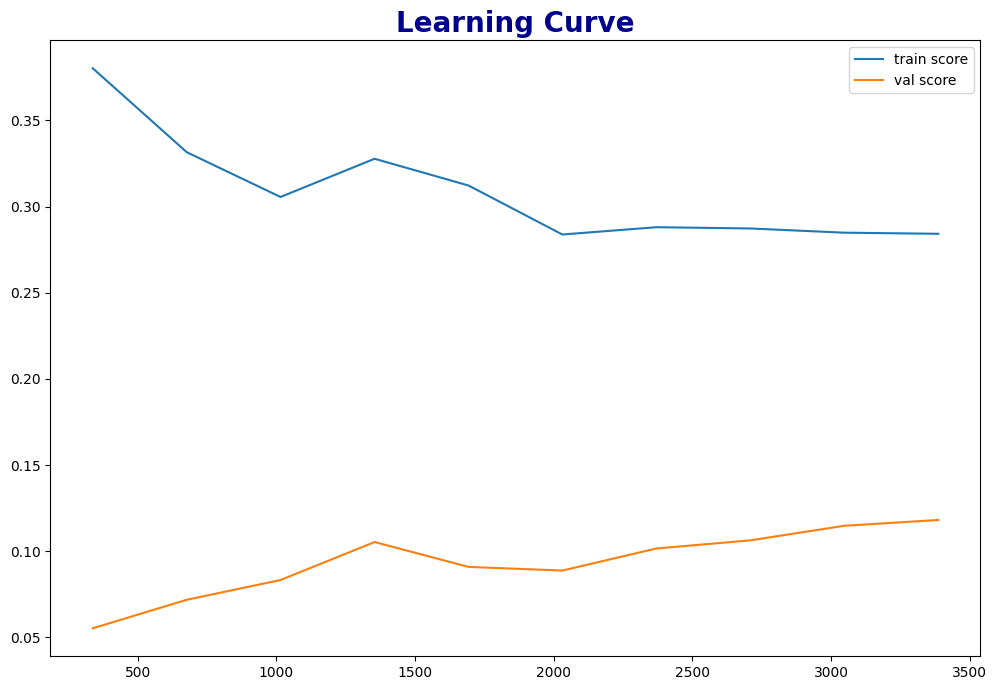

In [144]:
def imputation(data):
    return data.fillna(-999,axis =0)
def preprocessing(data):
  data = encodage(data)
  data = imputation(data)

  X = data.drop('SARS-Cov-2 exam result', axis=1)
  y = data['SARS-Cov-2 exam result']

  print(y.value_counts())

  return X,y

X_train, y_train = preprocessing(trainset)
X_test, y_test = preprocessing(testset)
def evaluation(model):
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)

  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))

  N, train_score, val_score = learning_curve(model, X_train, y_train, cv = 4, scoring = 'f1',train_sizes = np.linspace(0.1, 1, 10))
  plt.figure(figsize = (12,8))
  plt.plot(N, train_score.mean(axis = 1), label ='train score')
  plt.plot(N, val_score.mean(axis = 1), label ='val score')
  plt.title(f"Learning Curve", size = 20, fontweight = 'bold',color='darkblue')
  plt.legend()
  plt.show()
evaluation(model)

On a toujours une mauvaise prédiction de positivité et les courbes ne sont pas franchement terribles...

On peut tenter d'autres méthodes et inclure une colonne qui tient compte de certaines valeurs manquantes :

SARS-Cov-2 exam result
0    4068
1     447
Name: count, dtype: int64
SARS-Cov-2 exam result
0    1018
1     111
Name: count, dtype: int64
[[1007   11]
 [ 106    5]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.95      1018
           1       0.31      0.05      0.08       111

    accuracy                           0.90      1129
   macro avg       0.61      0.52      0.51      1129
weighted avg       0.85      0.90      0.86      1129



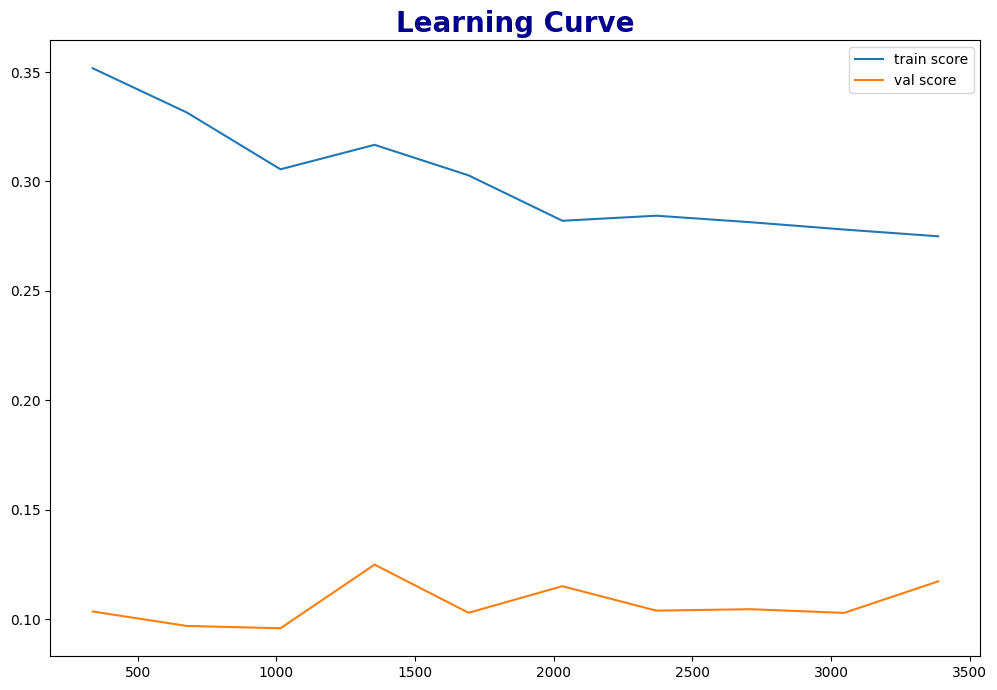

In [146]:
def imputation(data):
    data['is na'] = data['Parainfluenza 3'].isna() | data['Leukocytes'].isna()
    data.fillna(-999,axis =0)
    return data

def preprocessing(data):
  data = encodage(data)
  data = imputation(data)

  X = data.drop('SARS-Cov-2 exam result', axis=1)
  y = data['SARS-Cov-2 exam result']

  print(y.value_counts())

  return X,y

X_train, y_train = preprocessing(trainset)
X_test, y_test = preprocessing(testset)
def evaluation(model):
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)

  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))

  N, train_score, val_score = learning_curve(model, X_train, y_train, cv = 4, scoring = 'f1',train_sizes = np.linspace(0.1, 1, 10))
  plt.figure(figsize = (12,8))
  plt.plot(N, train_score.mean(axis = 1), label ='train score')
  plt.plot(N, val_score.mean(axis = 1), label ='val score')
  plt.title(f"Learning Curve", size = 20, fontweight = 'bold',color='darkblue')
  plt.legend()
  plt.show()
  
evaluation(model)

Toujours très limite....

Repartons sur notre premier modèle.

SARS-Cov-2 exam result
0    73
1    10
Name: count, dtype: int64
SARS-Cov-2 exam result
0    13
1     3
Name: count, dtype: int64
[[13  0]
 [ 2  1]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        13
           1       1.00      0.33      0.50         3

    accuracy                           0.88        16
   macro avg       0.93      0.67      0.71        16
weighted avg       0.89      0.88      0.85        16



c:\Users\sauss\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sauss\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\sauss\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sauss\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 380, in _score
    y_pred = method_caller(
        estimator,
    ...<2 lines>...
        pos_label=pos_lab

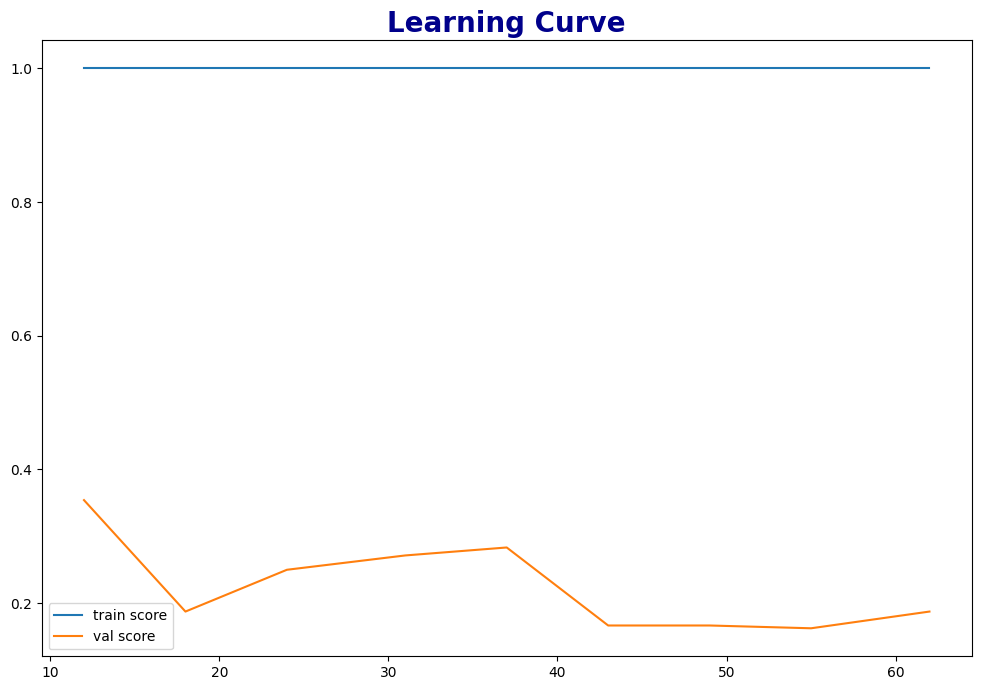

In [147]:
def imputation(data):
    data = data.dropna(axis=0)
    return data

def preprocessing(data):
  data = encodage(data)
  data = imputation(data)

  X = data.drop('SARS-Cov-2 exam result', axis=1)
  y = data['SARS-Cov-2 exam result']

  print(y.value_counts())

  return X,y

X_train, y_train = preprocessing(trainset)
X_test, y_test = preprocessing(testset)
def evaluation(model):
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)

  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))

  N, train_score, val_score = learning_curve(model, X_train, y_train, cv = 4, scoring = 'f1',train_sizes = np.linspace(0.1, 1, 10))
  plt.figure(figsize = (12,8))
  plt.plot(N, train_score.mean(axis = 1), label ='train score')
  plt.plot(N, val_score.mean(axis = 1), label ='val score')
  plt.title(f"Learning Curve", size = 20, fontweight = 'bold',color='darkblue')
  plt.legend()
  plt.show()
  
evaluation(model)

On peut regarder les coefficients d'importance des variables.

In [148]:
model.feature_importances_

array([0.        , 0.11350246, 0.        , 0.15159817, 0.        ,
       0.12994129, 0.        , 0.15247143, 0.1817465 , 0.        ,
       0.        , 0.        , 0.        , 0.27074013, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

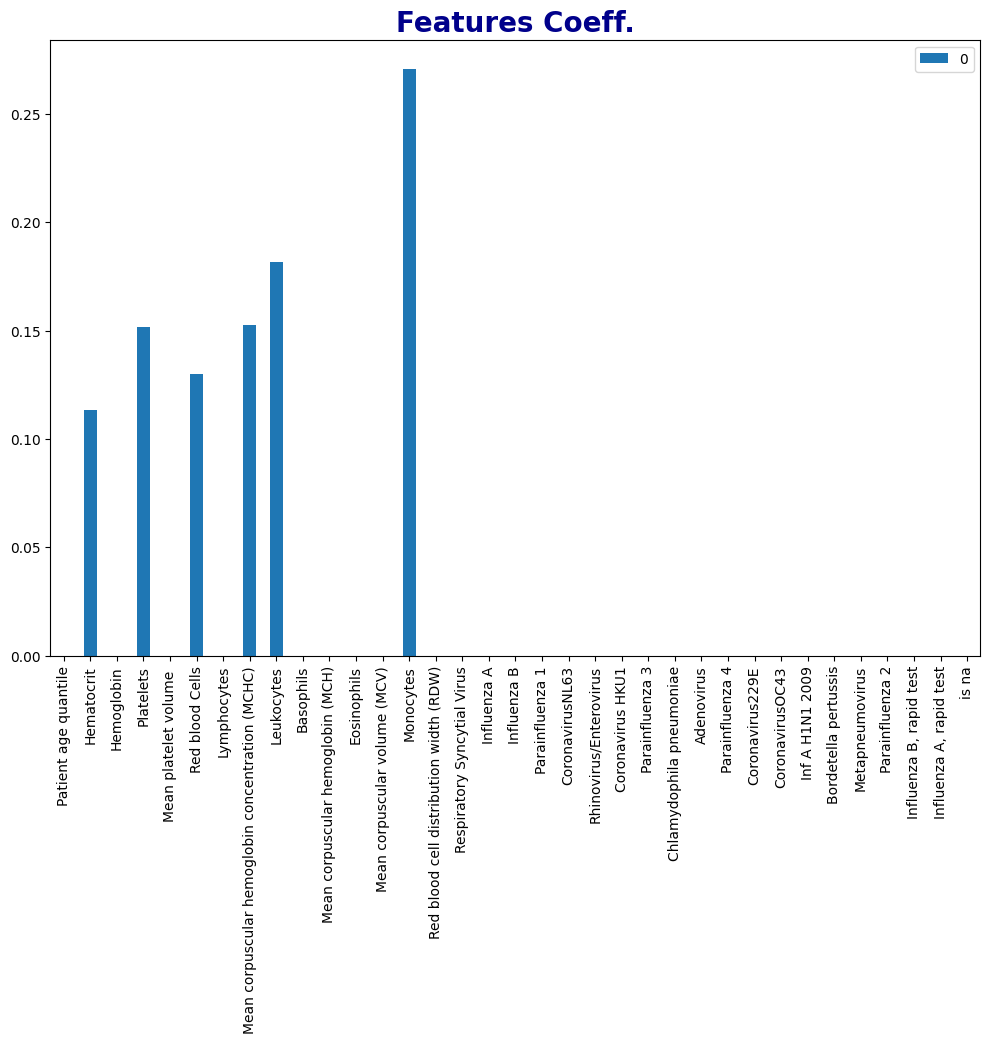

In [ ]:
pd.DataFrame(model.feature_importances_, index = X_train.columns).plot.bar(figsize=(12,8))
plt.title(f"Features Coeff.", size = 20, fontweight = 'bold',color='darkblue')
plt.show()

On va définir un seuil pour prendre les variables qui ont de l'importance (avec thereshold = 0.01 par exemple) et supprimer les colonnes de type "Virus".

In [151]:
new_data = data[key_columns + blood_columns]
trainset, testset = train_test_split(new_data, test_size = 0.2,random_state = 0)

In [152]:
trainset['SARS-Cov-2 exam result'].value_counts()

SARS-Cov-2 exam result
negative    4068
positive     447
Name: count, dtype: int64

In [153]:
testset['SARS-Cov-2 exam result'].value_counts()

SARS-Cov-2 exam result
negative    1018
positive     111
Name: count, dtype: int64

SARS-Cov-2 exam result
0    422
1     65
Name: count, dtype: int64
SARS-Cov-2 exam result
0    95
1    16
Name: count, dtype: int64
[[87  8]
 [10  6]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        95
           1       0.43      0.38      0.40        16

    accuracy                           0.84       111
   macro avg       0.66      0.65      0.65       111
weighted avg       0.83      0.84      0.83       111



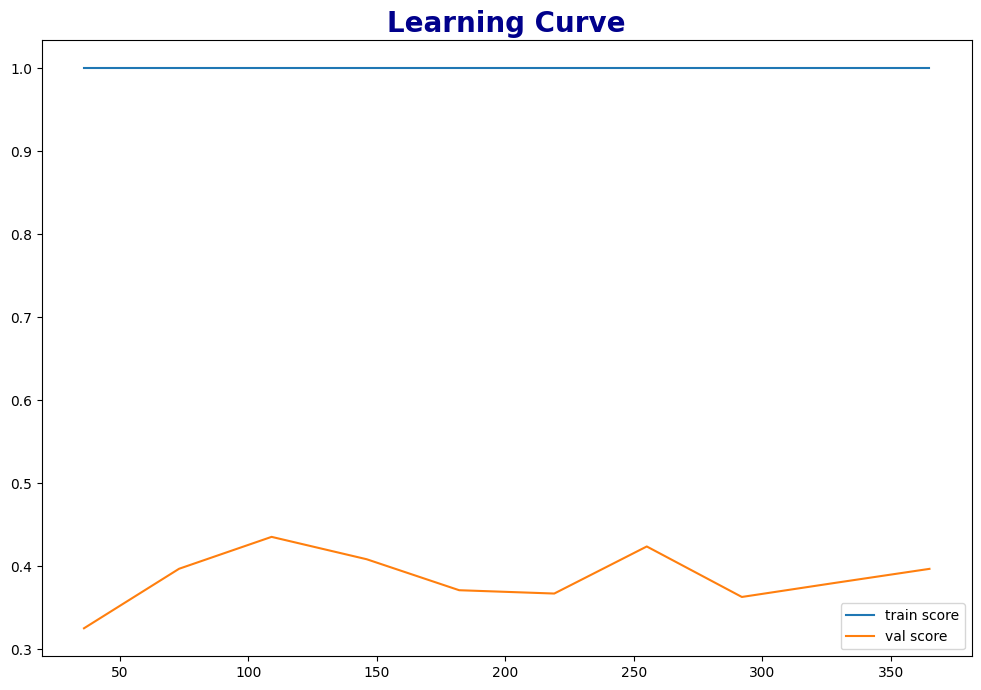

In [155]:
def imputation(data):
    data = data.dropna(axis=0)
    return data

def preprocessing(data):
  data = encodage(data)
  data = imputation(data)

  X = data.drop('SARS-Cov-2 exam result', axis=1)
  y = data['SARS-Cov-2 exam result']

  print(y.value_counts())

  return X,y

X_train, y_train = preprocessing(trainset)
X_test, y_test = preprocessing(testset)

def evaluation(model):
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)

  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))

  N, train_score, val_score = learning_curve(model, X_train, y_train, cv = 4, scoring = 'f1',train_sizes = np.linspace(0.1, 1, 10))
  plt.figure(figsize = (12,8))
  plt.plot(N, train_score.mean(axis = 1), label ='train score')
  plt.plot(N, val_score.mean(axis = 1), label ='val score')
  plt.title(f"Learning Curve", size = 20, fontweight = 'bold',color='darkblue')
  plt.legend()
  plt.show()


evaluation(model)

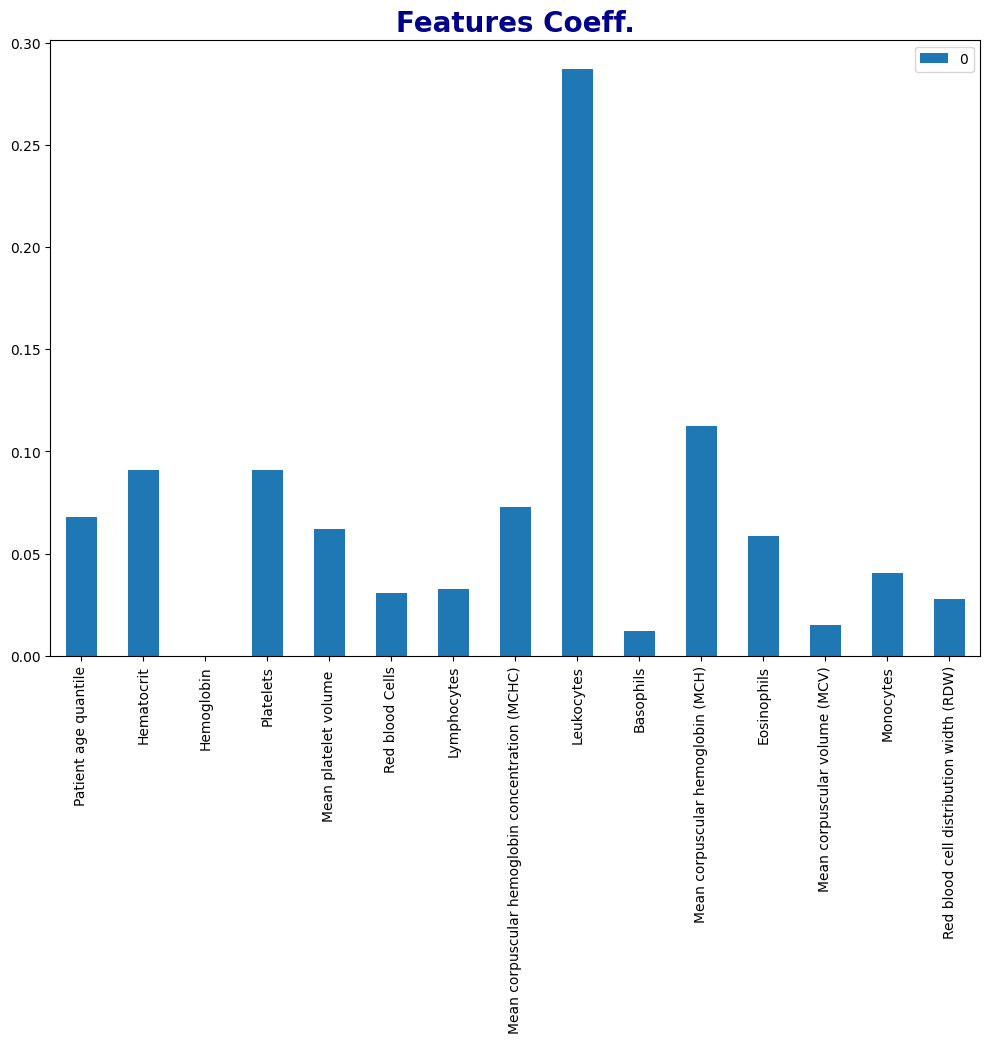

In [156]:
pd.DataFrame(model.feature_importances_, index = X_train.columns).plot.bar(figsize=(12,8))
plt.title(f"Features Coeff.", size = 20, fontweight = 'bold',color='darkblue')
plt.show()

On va tenter le changement de modèle.

# **Modelisation - RandomForest**

In [158]:
# Création du modèle
model = RandomForestClassifier(random_state = 0)

In [159]:
trainset, testset = train_test_split(data, test_size = 0.2,random_state = 0)

[[94  1]
 [14  2]]
              precision    recall  f1-score   support

           0       0.87      0.99      0.93        95
           1       0.67      0.12      0.21        16

    accuracy                           0.86       111
   macro avg       0.77      0.56      0.57       111
weighted avg       0.84      0.86      0.82       111



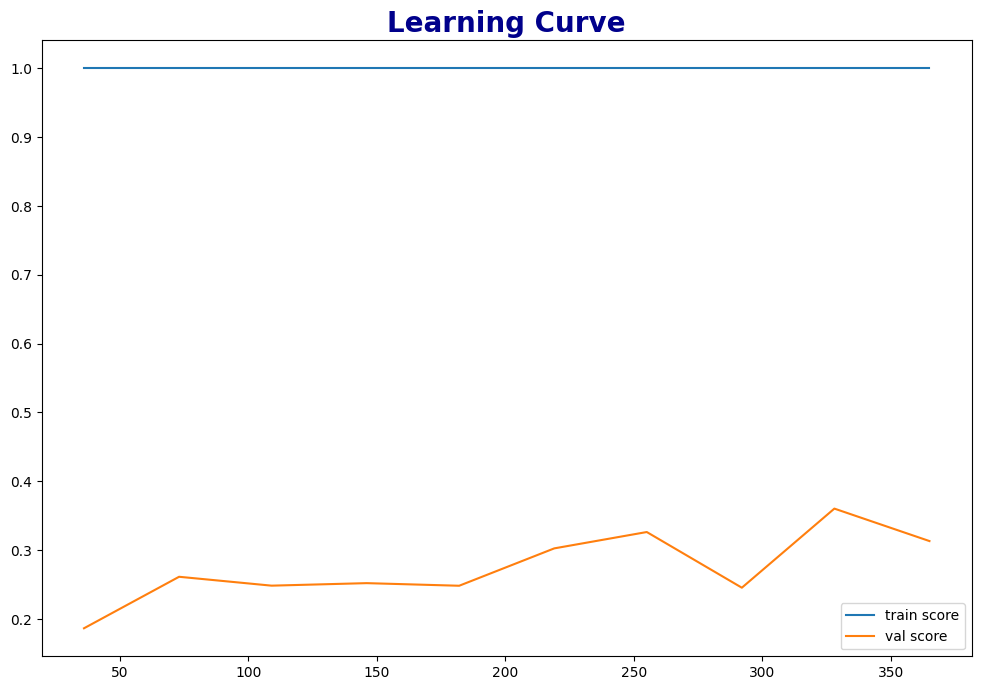

In [161]:
evaluation(model)

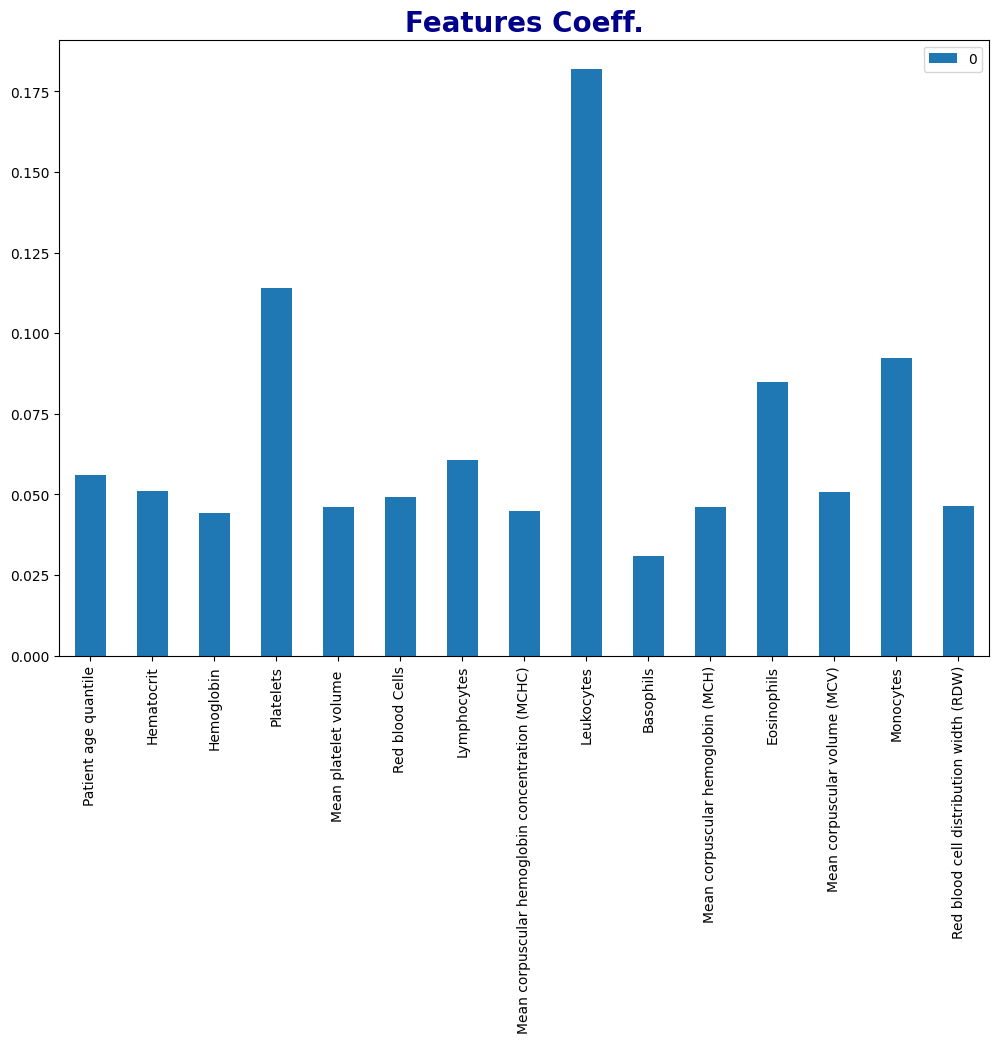

In [ ]:
pd.DataFrame(model.feature_importances_, index = X_train.columns).plot.bar(figsize=(12,8))
plt.title(f"Features Coeff.", size = 20, fontweight = 'bold',color='darkblue')
plt.show()

Non.....

On va aller chercher l'optimisation avec f_classif.

In [165]:
model = make_pipeline(SelectKBest(f_classif, k=10),RandomForestClassifier(random_state=0))

[[93  2]
 [12  4]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93        95
           1       0.67      0.25      0.36        16

    accuracy                           0.87       111
   macro avg       0.78      0.61      0.65       111
weighted avg       0.85      0.87      0.85       111



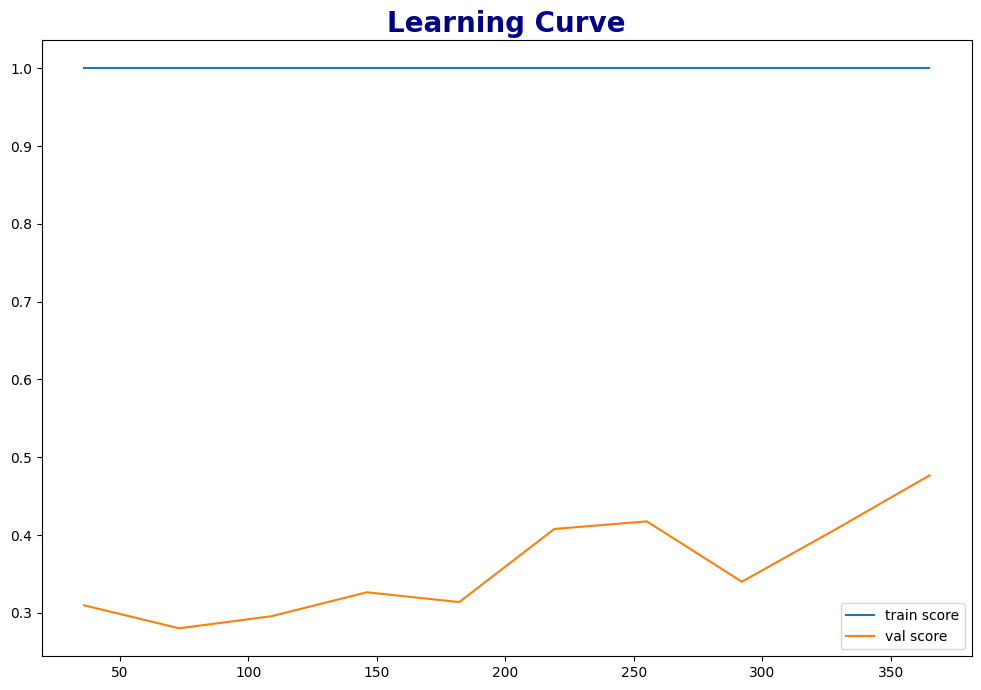

In [166]:
evaluation(model)

On commence à voir quelque chose de plus positif !
On peut changer k.

[[90  5]
 [11  5]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        95
           1       0.50      0.31      0.38        16

    accuracy                           0.86       111
   macro avg       0.70      0.63      0.65       111
weighted avg       0.83      0.86      0.84       111



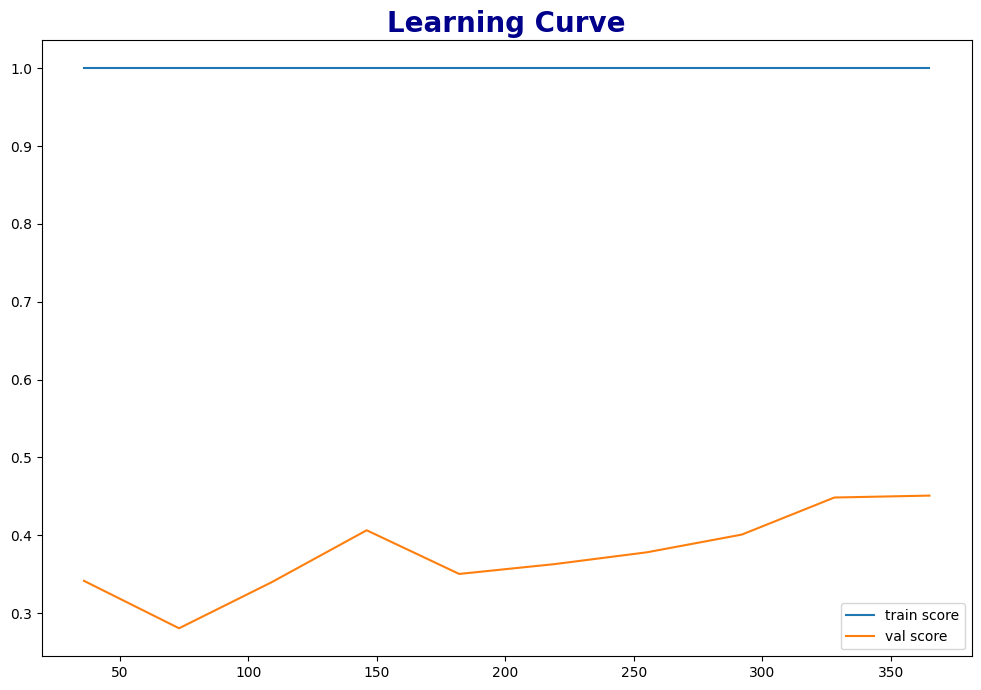

In [168]:
model = make_pipeline(SelectKBest(f_classif, k=5),RandomForestClassifier(random_state=0)) 
evaluation(model)

[[88  7]
 [13  3]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        95
           1       0.30      0.19      0.23        16

    accuracy                           0.82       111
   macro avg       0.59      0.56      0.56       111
weighted avg       0.79      0.82      0.80       111



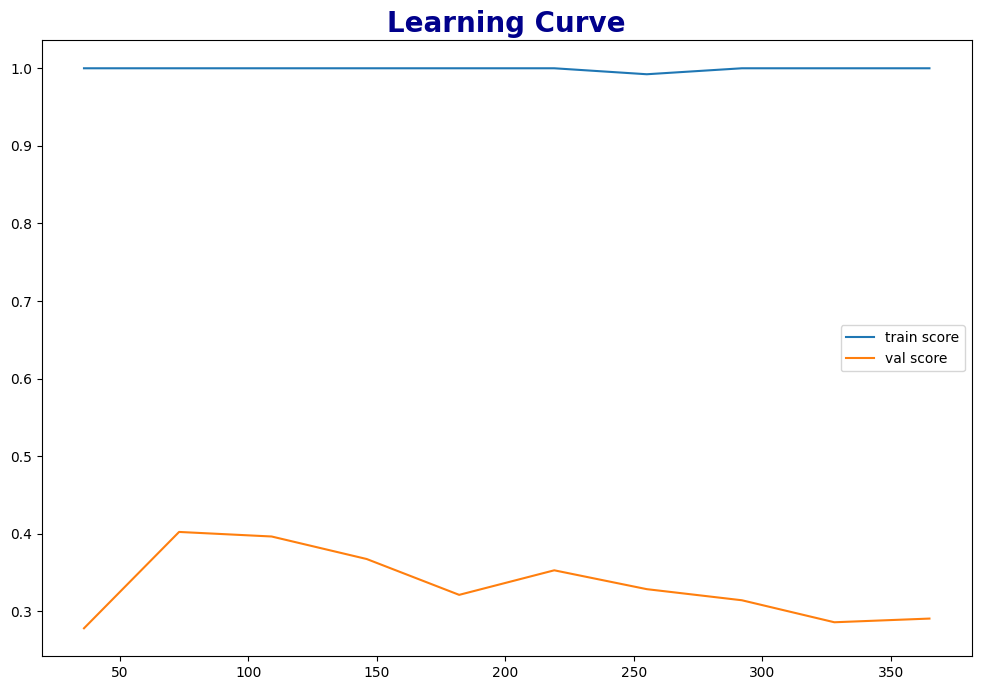

In [170]:
model = make_pipeline(SelectKBest(f_classif, k=2),RandomForestClassifier(random_state=0)) 
evaluation(model)

[[88  7]
 [13  3]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        95
           1       0.30      0.19      0.23        16

    accuracy                           0.82       111
   macro avg       0.59      0.56      0.56       111
weighted avg       0.79      0.82      0.80       111



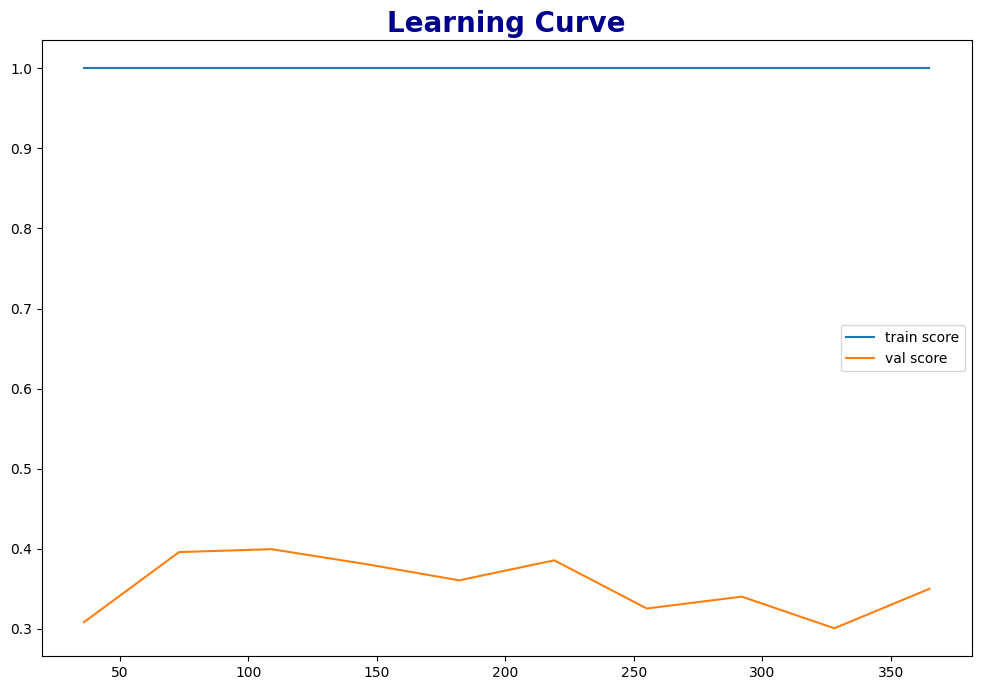

In [171]:
model = make_pipeline(SelectKBest(f_classif, k=3),RandomForestClassifier(random_state=0)) 
evaluation(model)

[[90  5]
 [12  4]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91        95
           1       0.44      0.25      0.32        16

    accuracy                           0.85       111
   macro avg       0.66      0.60      0.62       111
weighted avg       0.82      0.85      0.83       111



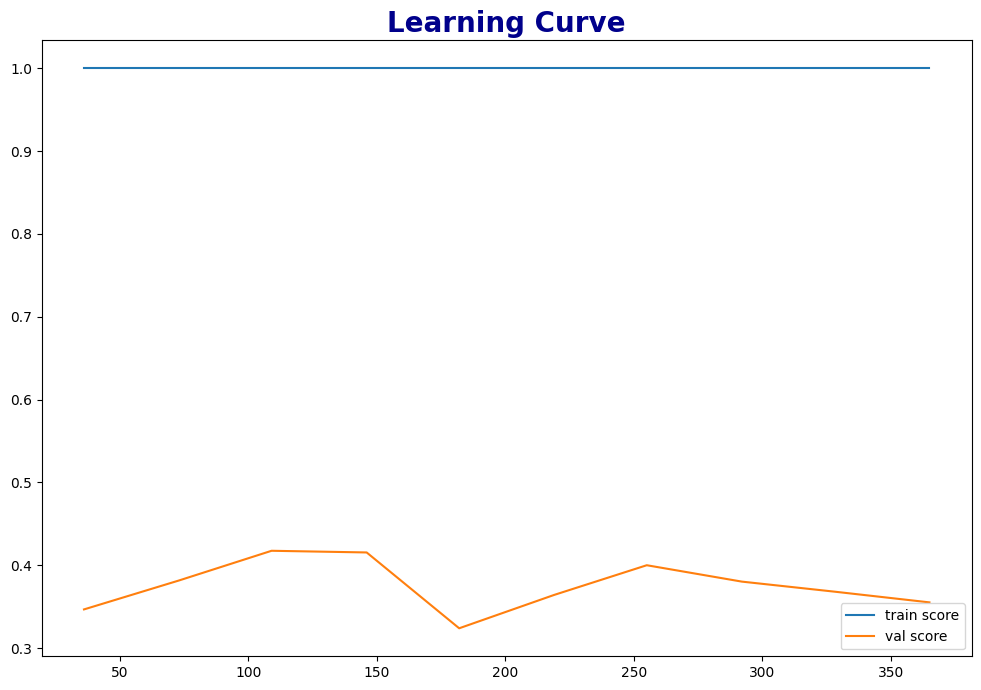

In [172]:
model = make_pipeline(SelectKBest(f_classif, k=4),RandomForestClassifier(random_state=0)) 
evaluation(model)

# **Optimisation**

Difficile parfois d'atteindre un bon modèle. On va tenter d'automatiser les comparaisons.

In [174]:
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(f_classif, k=10))

In [175]:
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())

In [176]:
dict_of_models = {'RandomForest': RandomForest,
                  'AdaBoost' : AdaBoost,
                  'SVM': SVM,
                  'KNN': KNN
                 }

RandomForest
[[89  6]
 [10  6]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92        95
           1       0.50      0.38      0.43        16

    accuracy                           0.86       111
   macro avg       0.70      0.66      0.67       111
weighted avg       0.84      0.86      0.85       111



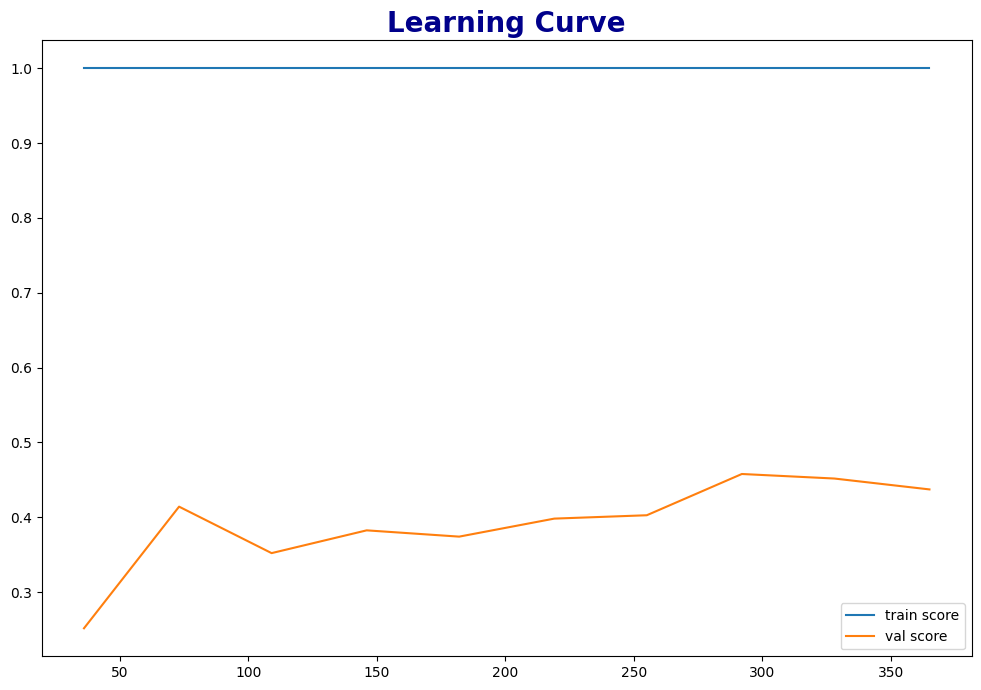

AdaBoost
[[91  4]
 [10  6]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        95
           1       0.60      0.38      0.46        16

    accuracy                           0.87       111
   macro avg       0.75      0.67      0.70       111
weighted avg       0.86      0.87      0.86       111



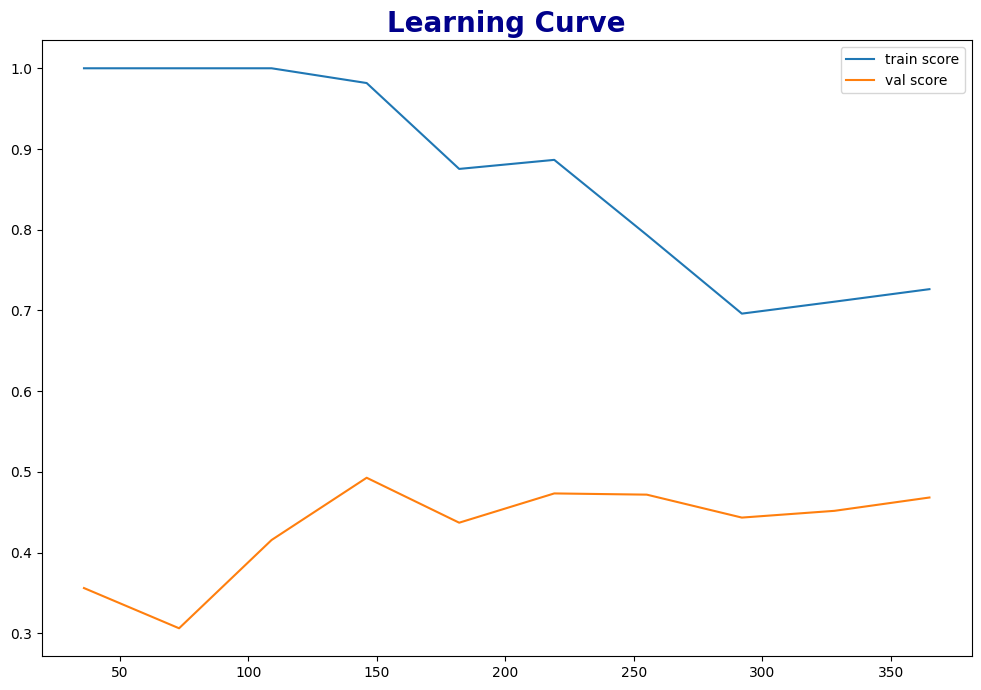

SVM
[[92  3]
 [11  5]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        95
           1       0.62      0.31      0.42        16

    accuracy                           0.87       111
   macro avg       0.76      0.64      0.67       111
weighted avg       0.85      0.87      0.86       111



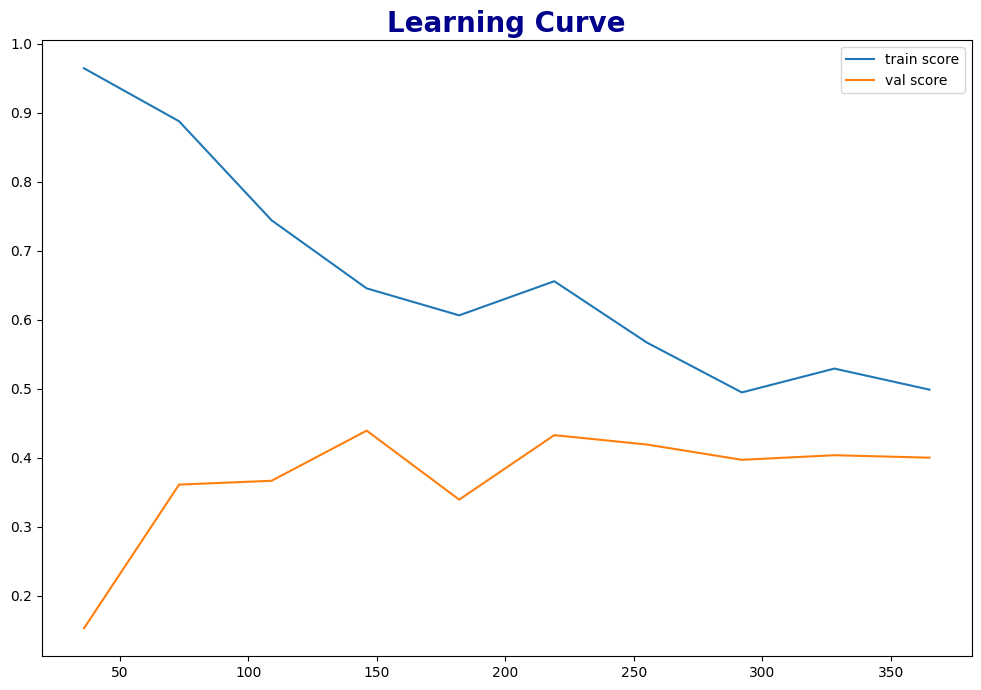

KNN
[[90  5]
 [11  5]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        95
           1       0.50      0.31      0.38        16

    accuracy                           0.86       111
   macro avg       0.70      0.63      0.65       111
weighted avg       0.83      0.86      0.84       111



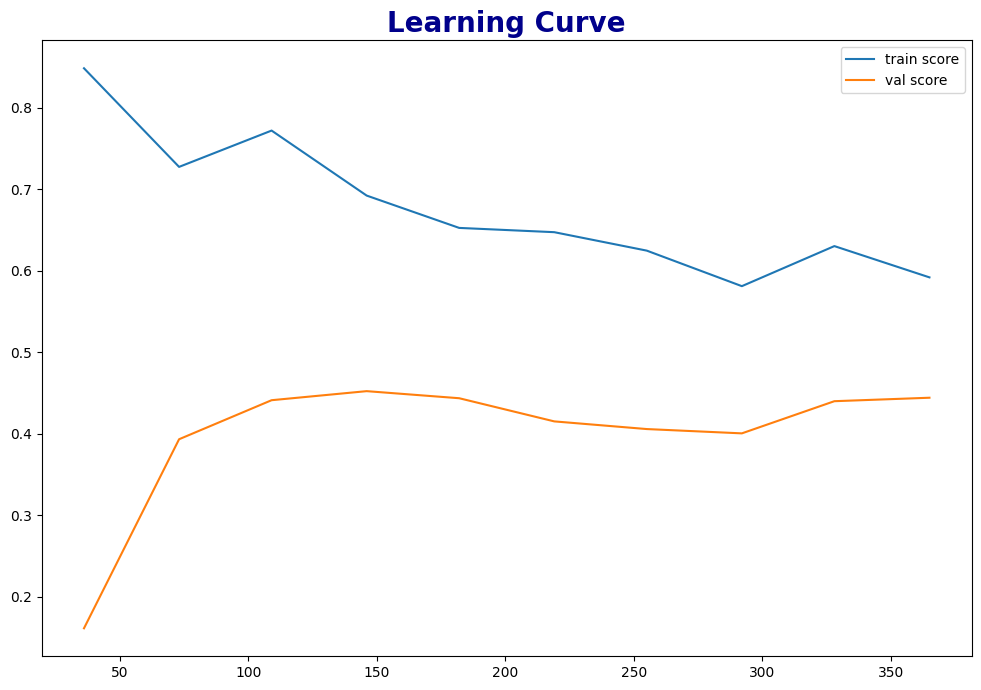

In [177]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

Le SVM semble sortir de bons scores. On va encore détailler avec des hyperparamètres.

In [178]:
SVM

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(include_bias=False)),
                                 ('selectkbest', SelectKBest())])),
                ('standardscaler', StandardScaler()),
                ('svc', SVC(random_state=0))])

In [179]:
hyper_params = {'svc__gamma':[1e-3, 1e-4, 0.0005],
                'svc__C':[1, 10, 100, 1000, 3000], 
               'pipeline__polynomialfeatures__degree':[2, 3],
               'pipeline__selectkbest__k': range(45, 60)}

In [182]:
grid = RandomizedSearchCV(SVM, hyper_params, scoring='recall', cv=4,
                          n_iter=40)

grid.fit(X_train, y_train)
print(grid.best_params_)

y_pred = grid.predict(X_test)
print("_______________________________________________________________________________________________________________________________________")
print("Classification Report")
print(classification_report(y_test, y_pred))

{'svc__gamma': 0.0005, 'svc__C': 3000, 'pipeline__selectkbest__k': 48, 'pipeline__polynomialfeatures__degree': 3}
_______________________________________________________________________________________________________________________________________
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.93      0.92        95
           1       0.53      0.50      0.52        16

    accuracy                           0.86       111
   macro avg       0.72      0.71      0.72       111
weighted avg       0.86      0.86      0.86       111



[[88  7]
 [ 8  8]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.92        95
           1       0.53      0.50      0.52        16

    accuracy                           0.86       111
   macro avg       0.72      0.71      0.72       111
weighted avg       0.86      0.86      0.86       111



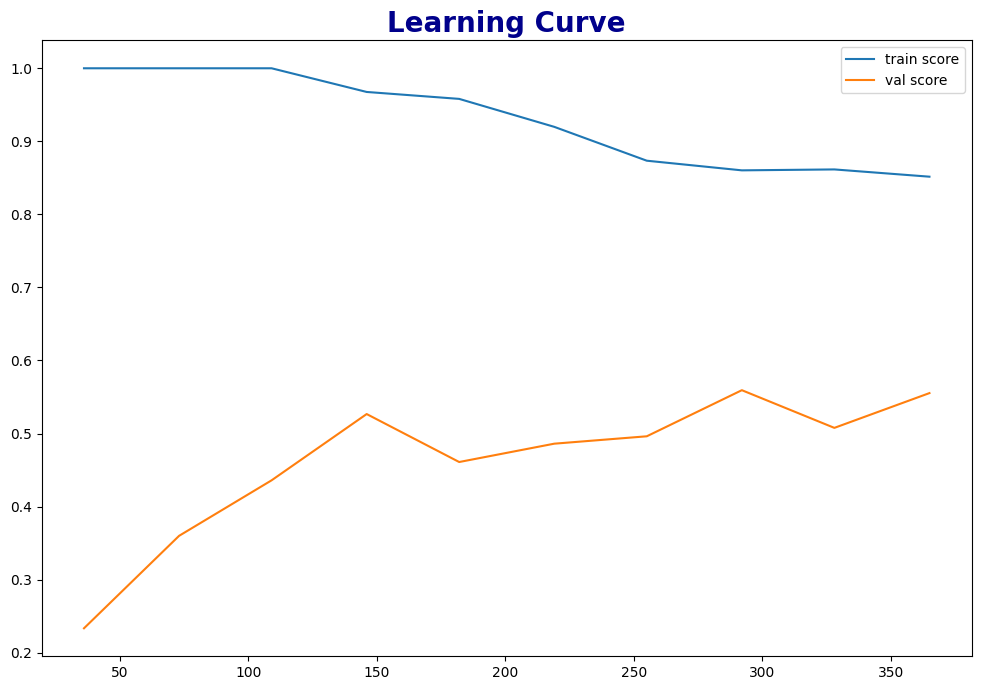

In [183]:
evaluation(grid.best_estimator_)

# **Que choisir ?**

Etape cruciale, il faut valider un modèle. Nous pouvons analyser les courbes de précision et rappel pour finaliser notre étude.

In [185]:
precision, recall, threshold = precision_recall_curve(y_test, grid.best_estimator_.decision_function(X_test))

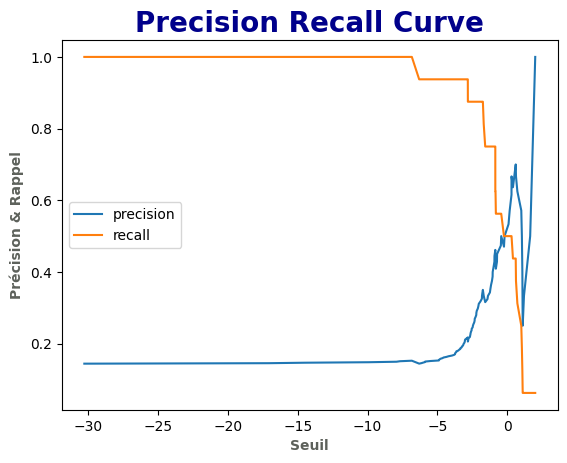

In [190]:
plt.plot(threshold, precision[:-1], label='precision')
plt.plot(threshold, recall[:-1], label='recall')
plt.title(f"Precision Recall Curve", size = 20, fontweight = 'bold',color='darkblue')
plt.legend()
plt.ylabel("Précision & Rappel", size = 10, c = '#5D615B', fontweight = 'bold') 
plt.xlabel("Seuil", size = 10, c = '#5D615B', fontweight = 'bold')     
plt.show()

**Analyse du graphique :**

On observe que la précision augmente globalement avec le seuil.<br>
C'est assez logique, plus le seuil est élevé, plus le modèle est confiant lorsqu'il prédit la classe positive, et donc moins il fait d'erreurs.

Le rappel, lui, diminue globalement avec le seuil. Logique également, plus le seuil est élevé, moins le modèle prédit de positifs, et donc il risque de manquer des exemples réellement positifs.

Il y a clairement un compromis à faire entre précision et rappel. Il est impossible d'avoir une précision et un rappel parfaits en même temps. 
Il faut choisir un seuil qui offre un bon équilibre entre les deux, en fonction des besoins.

Nous sommes sur un sujet de santé, et il est important de minimiser les faux négatifs plutôt que les faux positifs (afin de nous assurer de ne pas rater un cas qui pourrait s'avérer sévère).
On va donc faire notre choix sur un seuil tenant compte d'un rappel important.